In [27]:
R.version

               _                           
platform       x86_64-conda-linux-gnu      
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          1.3                         
year           2022                        
month          03                          
day            10                          
svn rev        81868                       
language       R                           
version.string R version 4.1.3 (2022-03-10)
nickname       One Push-Up                 

In [ ]:
#needs to be done for the system; the conda/mamba command of course for the used environment
#sudo apt-get install libproj-dev libgdal-dev libcurl4-gnutls-dev libgit2-dev
#mamba install -c conda-forge r-gert r-proj4
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install("ggmsa")

#backup installation
##install.packages("devtools")
##if (!requireNamespace("devtools", quietly=TRUE))
##    install.packages("devtools")
##devtools::install_github("YuLab-SMU/ggmsa")

In [9]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

#BiocManager::install("treeio", force = TRUE)
#BiocManager::install("ggtree", force = TRUE)
#BiocManager::install("ggtreeExtra", force = TRUE)
#BiocManager::install("Biostrings", force = TRUE)
#BiocManager::install("XVector", force = TRUE)
###BiocManager::install("ggmsa")

####install.packages("tidyverse")
#install.packages("purrr")
#install.packages("tidyr")
#install.packages("ggplot2")
#install.packages("ggstance")
#install.packages("seqmagick")
#install.packages("shiny")
#install.packages("DT")
#install.packages("cowplot")
#install.packages("ggplotify")
#install.packages("shinydashboard")
#install.packages("shinydashboardPlus") # > 2.0
#install.packages("fontawesome")
#install.packages("UpSetR")
#install.packages("ggvenn")
#install.packages("plotly")
#install.packages("shinyjs")
##install.packages("svglite")
#install.packages("ggmsa")
#install.packages("ggstar")
#install.packages("ggnewscale")
###install.packages("shinyWidgets")
#install.packages("Polychrome")
###install.packages("gridSVG")
##install.packages("svgPanZoom")
###install.packages("rbokeh")
###install.packages("ggiraph")
###install.packages("VennDiagram")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [20]:



#install.packages("shiny")

#if (!require("devtools"))
#  install.packages("devtools")
#devtools::install_github("shiny")

#remove("shiny")
#remove.packages("dplyr")
#remove.packages("ggtree")
#remove.packages("tidytree")


#packageurl <- "https://cran.r-project.org/src/contrib/Archive/dplyr/dplyr_1.0.5.tar.gz"
#install.packages(packageurl, repos=NULL, type="source")


#install.packages("tidytree")

#install.packages("shiny")

#install.packages("remotes")
#  remotes::install_github("YuLab-SMU/ggtree")
#  remotes::install_github("YuLab-SMU/tidytree")

#install.packages("devtools")
#require(devtools)
#install_version("dplyr", version = "1.0.5", repos = "http://cran.us.r-project.org")


if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install("ggtree", type="source", force = TRUE)


#remotes::install_github("YuLab-SMU/ggtreeExtra")




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.12 (BiocManager 1.30.15), R 4.0.3 (2020-10-10)

Installing package(s) 'ggtree'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'dplyr'



In [2]:
library(shiny)
library(dplyr)
library(ggtree)
R.version

               _                           
platform       x86_64-conda-linux-gnu      
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          1.3                         
year           2022                        
month          03                          
day            10                          
svn rev        81868                       
language       R                           
version.string R version 4.1.3 (2022-03-10)
nickname       One Push-Up                 

In [4]:
#library(shinyWidgets)
library(tidyr)
library(purrr)
library(treeio)
library(ggtree)
library(ggtreeExtra)
library(ggstar)
library(ggnewscale)
#library(tidyverse)
library(ggplot2)
library(ggstance)
library(Biostrings)
library(ggmsa)
library(seqmagick)
library(XVector)
library(gtable)
library(grid)
library(shiny)
library(DT)
library(cowplot)
library(ggplotify)
library(shinydashboard)
library(shinydashboardPlus)
library(fontawesome)
library(UpSetR)
library(ggvenn)
#library(plotly)
library(shinyjs)
#library(ggmsa)
library(Polychrome)
#library(svgPanZoom)
#library(svglite)
#library(gridSVG)
###library(echarts4r)
###library(ggiraph)
###library(rbokeh)
###library(VennDiagram)
###

Export a tsv of all packages:

In [5]:
#install.packages("readr")
library(readr)

packages_working <- as.data.frame(installed.packages())

write_tsv(x = packages_working, 
          file = "/home/tyll/Desktop/PhD/A2TEA/a2tea-webapp/packages_working_version.tsv"
         ) 

## Ok so let's build a dashboard web app which displays some trees
## overview: 4 parts - preprocessing, ui, server, app calling

### preprocessing

In [6]:
## define my two classes - defining the A2TEA HYPOTHESES object ;D
# class for the expanded_OG - containing all different types of data we have on it
setClass("expanded_OG", slots=list(genes="spec_tbl_df",
                                   blast_table="tbl_df",
                                   num_genes_HOG="numeric",
                                   num_genes_extend="numeric",
                                   num_genes_complete="numeric",
                                   genes_HOG="tbl_df",
                                   genes_extend_hits="tbl_df",
                                   fasta_files="list", 
                                   msa="AAMultipleAlignment", 
                                   tree="phylo"))

# class for the hypotheses
setClass("hypothesis", slots=list(description="character", 
                                  number="character",
                                  expanded_in ="character", 
                                  compared_to="character", 
                                  expanded_OGs="list",
                                  species_tree="phylo"))

# class for extended BLAST hits info
setClass("extended_BLAST_hits", 
         slots=list(blast_table="tbl_df",
                    num_genes_HOG="numeric",
                    num_genes_extend="numeric",
                    num_genes_complete="numeric",
                    genes_HOG="tbl_df",
                    genes_extend_hits="tbl_df")
         )

#load the A2TEA input
#load("/home/tyll/Desktop/PhD/A2TEA/shiny/example_trees/A2TEA_finished.RData")

## ui

In [49]:
header <- shinydashboardPlus::dashboardHeader(
  title = "A2TEA",
  tags$li(
      class = "dropdown",
# the following CSS keeps the header nice looking and on one line
# the CSS at the beginning of the sidebar definitons is also required for this
# sizes of individual elements and distances are important however the most important paramter for this to work is "height"
# this is set to 60px in all elements and ensures nice design 
## I'll probably have to adapt this a bit if/when I have a nice logo for A2TEA
## e.g. a hex design - https://github.com/GuangchuangYu/hexSticker
            tags$style(".main-header {max-height: 60px;}"),
            tags$style(".main-header .logo {height: 60px;font-size:26px;font-weight:bold;padding:10px;}"),
            tags$style(".sidebar-toggle {height: 60px; padding-top: 12px !important;font-size: 26px;}"),
            tags$style(".navbar {min-height:60px !important}"),
            tags$style(".form-control {padding: 16px 10px;}")),
      # add a github button in the header - to the repo or my profile
      tags$li(a(onclick = "onclick = window.open('https://github.com/tgstoecker')",
                                    href = NULL,
                                    icon("github"),
                                    title = "GitHub",
                                    style = "cursor: pointer; font-size: 32px; height: 60px;"),
                                    class = "dropdown"),
          # add a twitter button in the header - to my account
      tags$li(a(onclick = "onclick = window.open('https://twitter.com/tgstoecker')",
                                    href = NULL,
                                    icon("twitter"),
                                    title = "Twitter",
                                    style = "cursor: pointer; font-size: 32px; height: 60px;"),
                                    class = "dropdown")

)


sidebar <- dashboardSidebar(
  # call useShinyjs() in order to use it!
  useShinyjs(),
#  actionButton(inputId = "toggle", "Hide/show plot"),
  # as explained in the header creation - necessary CSS to guarantee complete vertical alignment
  tags$style(".left-side, .main-sidebar {padding-top: 60px}"),
  # this code hides the upload and select panels when the the sidebar is toggled off
  # it keeps the sidebar tabs though ;D
  # this is achieved by specifically referencing (and thus hiding) ".form-group"
  # https://www.w3schools.com/css/css_display_visibility.asp
  tags$style(".sidebar-collapse .form-group {display:none;}"),
  tags$style(".sidebar-collapse .logo {display:none;}"),
  # Add input of A2TE.RData object
  fileInput(inputId = "A2TEA",
                label = "Upload A2TEA.RData file:",
                multiple = FALSE,
                accept = ".RData"),
  # Add selectors for Hypothesis & HOG
  uiOutput('select_Hypothesis'),
#  uiOutput('select_HOG'),
  sidebarMenu(
    menuItem("General", tabName = "general", icon = icon("th")),
    menuItem("TEA analysis", icon = icon("th"), tabName = "tea"), #badgeLabel = "new", badgeColor = "green")
    menuItem("Differential expression", icon = icon("th"), tabName = "deg"),
    menuItem("Gene set enrichment", icon = icon("th"), tabName = "gsea"),
    menuItem("About", icon = icon("th"), tabName = "about")
  )

)

body <- dashboardBody(
  # call useShinyjs() in order to use it!
  useShinyjs(),
    
# very nice alternative purple "{color: #870e92}"
  
  # tag "tea"
  tags$style(".dataTable {color: #428bca}"),
  tags$style(".selectize-input {color: #428bca}"),
  tags$style(".selectize-dropdown {color: #428bca}"),
  # tag "about"
  tags$style(".box-footer {color: #428bca}"),
     
    
  tabItems(
    # first tab: general information; species plot, upsetR/venn diagramme
    tabItem(tabName = "general",
            h2("General information on the experiment"),
            # row1
            fluidRow(
              # Column 1
              column(width = 7, 
                     infoBox(
                       width = NULL,
                       title = "Inferred general stats",
                       subtitle = "Lorem ipsum blablabla",
                       fill = TRUE,
                       color = "yellow"
                     )
                  ),
              # Column 2
              column(width = 5,
                # in order to use shinyjs on box elements - wrap them in div() expressions
                # give the divs their own ids! in order to use shinyjs on the box
                shinyjs::hidden(
                  div(id = "id_speciesPlot_outer",
                  box(
                    style = "overflow-y: auto; overflow-x: auto",
                    id = "id_speciesPlot",
                    background ="yellow",
                    gradient = TRUE,
                    sidebar = boxSidebar(
                      width = 25,
                      startOpen = FALSE,    
                      id = "mycardsidebar",
                      numericInput(inputId = "species_tree_height", "height", value = 400),
                      sliderInput(inputId = "species_tree_hexpand", 
                                   "horizontal axis expansion", 
                                   min = 0.1, 
                                   max = 4.0, 
                                   value = 0.7),
                    ),
                    width = NULL,
                    title = "Phylogenetic Tree - Orthofinder/STAG/STRIDE",
                    plotOutput('speciesPlot')
                  )
                  )
                )
              )
            ),
            
            # row 2
            fluidRow(
              # Column 1
              column(width = 3,
                     shinyjs::hidden(
                       div(id = "id_vennPlot_outer",
                         box(
                           background ="yellow",
                           gradient = TRUE,
                           width = NULL,
                           title = "VennDiagram - Orthologous Groups",
                           plotOutput('vennPlot')
                         )
                       )
                     )  
                    ),
              # Column 2
              column(width = 4,
                shinyjs::hidden(
                  div(id = "id_upsetRPlot_outer",
                    box(
                      background ="yellow",
                      gradient = TRUE,
                      width = NULL,
                      title = "UpsetR Plot - Orthologous Groups",
                      plotOutput('upsetRPlot')
                    )
                  )
                )
              ),
              # Column 3
              column(width = 5)
            )
           ),
      
    # second tab: Trait-specific evolutionary adaptation analysis
    tabItem(tabName = "tea",
            h2("Trait-specific evolutionary adaption analysis"),
            
            # first row
            fluidRow(
              column(width = 12),
              column(width = 12,
                shinyjs::hidden(
                  div(id = "hypothesis_HOG_level_table_outer",
                    box(style = "height: 600px; overflow-y: auto; overflow-x: auto", 
                      background ="yellow",
                      gradient = TRUE,
                      width = NULL,
                      title = "HOG table",
                      DTOutput("hypothesis_HOG_level_table")
                    )
                  )
                )
              )
            ),
            shinyjs::hidden(
              div(id = "id_tea_vis_tool_outer",
              box(width = 12, gradient = TRUE, background = "yellow", title = "TEA visualization tool",
                fluidRow(
              # row 2 - column 1 (only 1)
                column(
                width = 4,
#                shinyjs::hidden(
#                  div(id = "id_treePlot_boxPad_outer",
                    boxPad(
                       #selectizeInput('select_HOG_server', choices = NULL, label = "dddd"),
                       uiOutput('select_HOG'),
                       selectInput(
                        inputId = "tree_layout",
                        label = "Tree layout",
                        # removed choices 'dendrogram', 'inward_circular', 'equal_angle', 'daylight', 'ape'
                        # either not supported for the layers I want to display or not useful for TEA analysis
                        choices = c('rectangular', 'slanted', 'ellipse', 'roundrect', 'circular', 'fan', 'radial')
                      ),
                      # turn off/on branch_length option
                      selectInput(
                        inputId = "branch_length",
                        label = "Branch length",
                        choices = c('branch.length', 'none')
                      ),
                      selectInput(
                        inputId = "tree_plot_legend_pos", 
                        "Legend position", 
                        choices = c("left", "top", "right", "bottom", "none")
                      ),
                      # define size of tree lines
                      sliderInput(
                       min = 0.1, 
                       max = 2.5, 
                       value = 1.0,
                       inputId = "tree_size",
                       label = "Tree Lines - Size"
                      ),
                      sliderInput(inputId = "tree_height", 
                                  "Plot height (px)", 
                                  value = 1000, 
                                  min = 500, 
                                  max = 5000,
                                  step = 100
                                 ),
######                sliderInput(inputId = "tree_width", "width", min = 100, max = 500, value = 250),
                      sliderInput(
                        inputId = "ortho_tree_hexpand", 
                        "Horizontal Axis Expansion", 
                        min = 0.1, 
                        max = 5.0, 
                        value = 1.0,
                        step = 0.1
                      ),
                      uiOutput("add_blast_hit_control"), 
                      checkboxInput(inputId = "log2FC_layer",
                                                   label = "Add log2FC layer", 
                                                   value = FALSE
                                                  ),
                      checkboxInput(inputId = "tea_log2FC_add_sign_stars_choice",
                                    label = "Mark significantly DEGs", 
                                    value = FALSE
                                   ),
                      #uiOutput("tea_log2FC_add_sign_stars"),
                      uiOutput("tea_log2FC_n_break_options"),
                      uiOutput("tea_log2FC_offset_options"),
                      uiOutput("tea_log2FC_pwidth_options"),
                      uiOutput("tea_log2FC_axis_text_options"),
                      uiOutput("tea_log2FC_vjust_options"),
                      uiOutput("tea_log2FC_linetype_options"),
                      checkboxInput(inputId = "msa_layer",
                                                   label = "Add MSA layer", 
                                                   value = FALSE),
                      uiOutput("tea_msa_offset_options"),                  
                      uiOutput("tea_msa_pwidth_options"),
                  )
                #)
              ),
              column(width = 8, 
                shinyjs::hidden(
                  div(id = "id_treePlot_outer",
                  # https://stackoverflow.com/questions/49129194/r-shiny-dynamic-box-height
                  # height: XX, where XX can be any CSS unit (I personally prefer viewpoint ratios, e.g. height: 33vh will make a box as high as one third of a screen, regardless of screen resolution), sets the height of your box;
                  # overflow-y: auto adds a vertical scrollbar if required.
                  # With this approach, when a user resizes the screen all boxes maintain their equal heights.
#                    box(style = "height: 1000px; overflow-y: auto; overflow-x: auto",
                    box(style = "height: 800px; overflow-y: auto; overflow-x: auto",
                      background ="yellow",
                      gradient = TRUE,
                      width = NULL,
                      title = "Tree Plot - Orthologous Group",
                      plotOutput('treePlot' 
                                 #dblclick = "ortho_tree_dblclick",
                                 #brush = brushOpts(
                                 #  id = "ortho_tree_brush",
                                 #  resetOnNew = TRUE
                                 #)
                                )
                               
                    )                  
                )
              )
             )
            )
            ))),
            # row 3
            fluidRow(
              # row 3 - column 1
              column(width = 12,
                shinyjs::hidden(
                  div(id = "id_treePlot_table_outer",
                  # https://stackoverflow.com/questions/49129194/r-shiny-dynamic-box-height
                  # height: XX, where XX can be any CSS unit (I personally prefer viewpoint ratios, e.g. height: 33vh will make a box as high as one third of a screen, regardless of screen resolution), sets the height of your box;
                  # overflow-y: auto adds a vertical scrollbar if required.
                  # With this approach, when a user resizes the screen all boxes maintain their equal heights.
                    box(style = "height: 600px; overflow-y: auto; overflow-x: auto", 
                      background ="yellow",
                      gradient = TRUE,
                      width = NULL,
                      title = "HOG + extended BLAST hits",
                      DTOutput("ortho_tree_table")
                      )
                  )
                )
              )
            ),
              # row 4 - column 1
            shinyjs::hidden(
              div(id = "msa_vis_tool_outer",
              box(width = 12, gradient = TRUE, background = "yellow", title = "MSA",
            fluidRow(
              column(width = 8,
                shinyjs::hidden(
                  div(id = "id_msa_solo_plot_outer",
                  # https://stackoverflow.com/questions/49129194/r-shiny-dynamic-box-height
                  # height: XX, where XX can be any CSS unit (I personally prefer viewpoint ratios, e.g. height: 33vh will make a box as high as one third of a screen, regardless of screen resolution), sets the height of your box;
                  # overflow-y: auto adds a vertical scrollbar if required.
                  # With this approach, when a user resizes the screen all boxes maintain their equal heights.
                    box(style = "height: 600px; overflow-y: auto; overflow-x: auto", 
                      background ="yellow",
                      gradient = TRUE,
                      width = NULL,
                      title = "MSA plot",
#                      sidebar = shinydashboardPlus::boxSidebar(
#                      closable = TRUE,
#                      collapsible = FALSE,
#                      width = 75,
#                      startOpen = FALSE,    
#                      id = "msa_sidebar",
#                      numericInput(inputId = "msa_plot_height", "height", value = 600),
#                      numericInput(inputId = "msa_plot_width", "width", value = 2000),
#                      sliderInput(inputId = "msa_range_pos", label = "Range of MSA:", value = c(1, 50), min = 1, max = 2000),
#                    ),
                      plotOutput("msa_solo_plot")
                      )
                  )
                )
              ),
              column(width = 4,
                shinyjs::hidden(
                  div(id = "id_msa_solo_plot_options",
                    boxPad(
                      closable = TRUE,
                      collapsible = FALSE,
                      width = 75,
                      startOpen = FALSE,    
                      id = "msa_sidebar",
                      numericInput(inputId = "msa_plot_height", "height", value = 600),
                      numericInput(inputId = "msa_plot_width", "width", value = 2000),
                      sliderInput(inputId = "msa_range_pos", label = "Range of MSA:", value = c(1, 50), min = 1, max = 2000),                    
                    )
            )
            )
            )
            )
            )
            )
            )
        ),
    tabItem(tabName = "deg",
            h2("Differential expression analysis"),
           ),
    tabItem(tabName = "gsea",
            h2("Gene-set enrichment analysis")
           ),
    tabItem(tabName = "about",
            h2("About"),
            fluidRow(
              column(width = 12,
                userBox(width = 12,
                    closable = FALSE,
                    collapsible = TRUE,
                    gradient = TRUE,
                    background = "yellow",
                    title = userDescription(
                      title = "Tyll Stöcker",
                      subtitle = "Lead Developer - A2TEA project",
                      type = 2,
                      image = "https://avatars.githubusercontent.com/u/53227400?v=4"
                    ),
                    "Some text here!",
                    footer = "The footer here!"
                )
              )
            )
          )
  )
)

ui <- shinydashboardPlus::dashboardPage(
        skin = "yellow",
        header = header,
        # sidebar should close completely
        sidebar = sidebar,
        body = body
      )

This Font Awesome icon ('gears') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

The `name` provided ('bar-chart') is deprecated in Font Awesome 5:
* please consider using 'chart-bar' or 'fas fa-chart-bar' instead
* use the `verify_fa = FALSE` to deactivate these messages



### The server

In [ ]:
server <- function(input, output) {
  
  # change maximum file upload size = default 100Mb
  options(shiny.maxRequestSize=200*1024^2)

  ## event reactive expression for loading the data once uploaded by the user
  # hypotheses.tsv (simple df with)
  hypotheses_tsv <- eventReactive(input$A2TEA, {
    t = new.env()
    load(input$A2TEA$datapath, envir = t)
    get("hypotheses", envir=t)
  })
  # core A2TEA object
  HYPOTHESES.a2tea <- eventReactive(input$A2TEA, {
    t = new.env()
    load(input$A2TEA$datapath, envir = t)
    get("HYPOTHESES.a2tea", envir=t)
  })
  # Gene level diff. exp. table
  HOG_DE.a2tea <- eventReactive(input$A2TEA, {
    t = new.env()
    load(input$A2TEA$datapath, envir = t)
    get("HOG_DE.a2tea", envir=t)
  })
  # List of HOGs
  HOG_level_list <- eventReactive(input$A2TEA, {
    t = new.env()
    load(input$A2TEA$datapath, envir = t)
    get("HOG_level_list", envir=t)
  })
    

  ## observe upload of data and only then show boxes in which the plots are displayed
  observeEvent(input$A2TEA, {
    shinyjs::showElement("id_speciesPlot_outer", anim = TRUE, animType = "slide", time = 1)
    shinyjs::showElement("id_vennPlot_outer", anim = TRUE, animType = "slide", time = 1)
    shinyjs::showElement("id_upsetRPlot_outer", anim = TRUE, animType = "slide", time = 1)
    # TEA analysis tab
    shinyjs::showElement("hypothesis_HOG_level_table_outer", anim = TRUE, animType = "slide", time = 1)
    shinyjs::showElement("id_treePlot_table_outer", anim = TRUE, animType = "slide", time = 1)
    shinyjs::showElement("id_tea_vis_tool_outer", anim = TRUE, animType  = "slide", time = 1)
    shinyjs::showElement("id_treePlot_outer", anim = TRUE, animType = "slide", time = 1)
    shinyjs::showElement("msa_vis_tool_outer", anim = TRUE, animType = "slide", time = 1)
    shinyjs::showElement("id_msa_solo_plot_outer", anim = TRUE, animType = "slide", time = 1)
    shinyjs::showElement("id_msa_solo_plot_options", anim = TRUE, animType = "slide", time = 1)
  })
    
  ## rendering of UI elements for the sidebar
  # choice of hypothesis to be displayed
    output$select_Hypothesis = renderUI({
      selectInput(inputId = 'select_Hypothesis_server', 
                  label = 'Select Hypothesis:', 
                  choices = hypotheses_tsv()$name
                 )
    })
  
  # a dropdown list of the expanded HOGs of the current hypothesis
  # -> observe choice of HOG; e.g. for building trees
  # first create reactive list of all exp. HOGs 
  hypothesisExpOGs <- reactive({
    # require the input$select_Hypothesis_server to be present, since otherwise for a brief second an error is thrown
    req(input$select_Hypothesis_server)
    vars <- all.vars(
      parse(
        text = names(HYPOTHESES.a2tea()[[hypotheses_tsv()$hypothesis[hypotheses_tsv()$name==input$select_Hypothesis_server]]]@expanded_OGs)
      )
    )    
    vars <- as.list(vars)
    return(vars)    
  })
    

    
  output$select_HOG = renderUI({     
    selectInput('select_HOG_server', 'Select HOG', hypothesisExpOGs())
#  updateSelectizeInput(
#    session, "select_HOG_server", choices = paste("Item", 1:10000), server = TRUE, 
#    options = list(maxOptions = 10000)
#  )
})


    

########################
# General (start) page
########################

  # creating the species tree plot
  # make renderUI element reactive
  # access to element based on name in first element selectInput('')
  output$speciesPlot <- renderPlot(
    height = function() input$species_tree_height,
    {
    req(input$select_Hypothesis_server)
    # assigning hyptothesis specific species tree  
    p <- HYPOTHESES.a2tea()[[hypotheses_tsv()$hypothesis[hypotheses_tsv()$name==input$select_Hypothesis_server]]]@species_tree
    ggtree::ggtree(p) +
      ggtree::geom_tiplab() +
      ggtree::hexpand(input$species_tree_hexpand, direction = 1) +
      ggtree::hexpand(input$species_tree_hexpand, direction = -1) +
      theme(plot.margin=margin(6, 120, 6, 6))
  })

  ## Creating upsetR and venn plots
  # based on hypothesis/ when it is changed, create specific list with incl. genotypes/species
  genotypeList <- eventReactive(input$select_Hypothesis_server, {
      
    workset <- HOG_level_list()[[hypotheses_tsv()$hypothesis[hypotheses_tsv()$name==input$select_Hypothesis_server]]] %>% 
                 select(HOG, ends_with("_total")) 

    # remove '_total' from column names
    #str_remove(colnames(workset), "_total")
    workset <- workset %>% setNames(names(workset) %>% stringr::str_replace("_total",""))
        
    # a vector with all species names for currently selected hypothesis
    species_vec <- names(workset %>% select(-HOG))

    # using map_at from purrr
    # we perform the operation for all columns in species_vec
    # filter/only keep HOG "rows" per species if species possesses at least 1 gene inside the HOG
    # with purrr::list_modify("HOG" = NULL) the untouched pure HOG column (now a list) is removed
    genotypeList <- workset %>% purrr::map_at(species_vec, 
                          ~filter(workset, .!= 0) %>% 
                            select(HOG) %>% 
                            as_vector() %>%
                            unname()
                         ) %>% purrr::list_modify("HOG" = NULL)
            
    # return genotypeList
    genotypeList
  })

  # create Venn diagram
  output$vennPlot <- renderPlot({
    ggvenn(genotypeList(), 
           stroke_linetype = 2, 
           text_size = 5, 
           set_name_color = "navy",
           stroke_color = "yellow3",
           stroke_size = 0.8, 
           set_name_size = 6, 
           show_percentage = TRUE, 
           fill_color = c("yellow", "purple", "papayawhip", "red4")
          )
  })
    
  # create upsetR plot 
  output$upsetRPlot <- renderPlot({
    req(input$select_Hypothesis_server)
    upset(fromList(genotypeList()), 
          order.by = "freq",
          empty.intersections = "on",
          point.size = 3.5, 
          line.size = 2, 
          mainbar.y.label = "HOG Intersections", 
          text.scale = c(2, 1.3, 1, 1, 2, 2),
          main.bar.color = "navy",
          matrix.color = "navy",
          sets.bar.color = "navy"
         )
    })
        
    
      
########################
# Tea analysis 
########################
    
  # read-in hypothesis specific HOG_level_list
  hypothesis_HOG_level_list <- eventReactive(input$select_Hypothesis_server, {
    HOG_level_list()[[hypotheses_tsv()$hypothesis[hypotheses_tsv()$name==input$select_Hypothesis_server]]]  
  })
    
  # read in tree choice reactively
  # using eventReactive() and requiring the input$select_HOG_server to change leads to this specifically being the trigger
  # with only the basic reactive() all upstream events influence this and this leads to warning messages;
  # specifically the class of the tree object isn't found immediately
  # since select_HOG_server is dependent on the reactive select_Hypothesis_server we circumvent this here
  # changing HOG no problem, changing Hypothesis sets HOG to index 1 and is then evaluated -> no warnings and a clean App
  tree_choice <- eventReactive(input$select_HOG_server, {
    HYPOTHESES.a2tea()[[hypotheses_tsv()$hypothesis[hypotheses_tsv()$name==input$select_Hypothesis_server]]]@expanded_OGs[[input$select_HOG_server]]@tree
  })
   
  # the number of maximum extended blast hits possible for this HOG
  num_max_extended_blast_hits <- eventReactive(input$select_HOG_server, {
    nmebh <- HYPOTHESES.a2tea()[[hypotheses_tsv()$hypothesis[hypotheses_tsv()$name==input$select_Hypothesis_server]]]@expanded_OGs[[input$select_HOG_server]]@num_genes_extend
    nmebh
  })
    
  # the complete list of genes (extended blast hits + main expanded HOG) - as_vector(tibble)
  all_genes_HOG <- eventReactive(input$select_HOG_server, {
    agH <- HYPOTHESES.a2tea()[[hypotheses_tsv()$hypothesis[hypotheses_tsv()$name==input$select_Hypothesis_server]]]@expanded_OGs[[input$select_HOG_server]]@genes
    as_vector(agH)  
  })
    
  # the complete list of extended blast hits for this HOG - as_vector(tibble)
  extended_blast_hits_genes <- eventReactive(input$select_HOG_server, {
    ebhg <- HYPOTHESES.a2tea()[[hypotheses_tsv()$hypothesis[hypotheses_tsv()$name==input$select_Hypothesis_server]]]@expanded_OGs[[input$select_HOG_server]]@genes_extend_hits
    as_vector(ebhg)  
  })
      
  # the complete list of extended blast hits for this HOG - as_vector(tibble)
  blast_hits_table <- eventReactive(input$select_HOG_server, {
    HYPOTHESES.a2tea()[[hypotheses_tsv()$hypothesis[hypotheses_tsv()$name==input$select_Hypothesis_server]]]@expanded_OGs[[input$select_HOG_server]]@blast_table  
  })
    
  # the complete MSA for this HOG (incl. extended BLAST hits) - as_vector(tibble)
  msa <- eventReactive(input$select_HOG_server, {
    HYPOTHESES.a2tea()[[hypotheses_tsv()$hypothesis[hypotheses_tsv()$name==input$select_Hypothesis_server]]]@expanded_OGs[[input$select_HOG_server]]@msa  
  })
    
    
  #### rendering HOG list with interesting values tea, cafe, expansion, etc.
  # advanced filtering is enabled
  output$hypothesis_HOG_level_table <- renderDT({
    datatable(
      hypothesis_HOG_level_list(),
      filter = list(position = 'top', clear = FALSE)
    )
  })
    
    
  ### renderUI elements
  output$add_blast_hit_control <- renderUI({
    req(input$select_Hypothesis_server)
    req(input$select_HOG_server)
    
    sliderInput(inputId = "add_blast_hits",
                label = "Additional Blast Hits", 
                value = 0, 
                min = 0,
                step = 1,
                max = num_max_extended_blast_hits()
               )        
  })

    
    #render options for log2FC layer conditionally

#    output$tea_log2FC_add_sign_stars <- renderUI({
#      req(input$select_Hypothesis_server)
#      req(input$select_HOG_server)
#      req(input$log2FC_layer == TRUE)
#    
#      checkboxInput(inputId = "tea_log2FC_add_sign_stars_choice",
#                    label = "Mark significantly DEGs", 
#                    value = FALSE
#                    )
#    })    
#    
    output$tea_log2FC_n_break_options <- renderUI({
      req(input$select_Hypothesis_server)
      req(input$select_HOG_server)
      req(input$log2FC_layer == TRUE)
    
      sliderInput(inputId = "tea_log2FC_n_break_choice",
                  label = "Breaks in Axis", 
                  value = 3, 
                  min = 0,
                  step = 1,
                  max = 15
                )
    })
                       
    output$tea_log2FC_offset_options <- renderUI({
      req(input$select_Hypothesis_server)
      req(input$select_HOG_server)
      req(input$log2FC_layer == TRUE)
    
      sliderInput(inputId = "tea_log2FC_offset_choice",
                  label = "Offset", 
                  value = 0.8, 
                  min = 0,
                  step = 0.05,
                  max = 5
                )
    })
    

    output$tea_log2FC_pwidth_options <- renderUI({
      req(input$select_Hypothesis_server)
      req(input$select_HOG_server)
      req(input$log2FC_layer == TRUE)
    
      sliderInput(inputId = "tea_log2FC_pwidth_choice",
                  label = "Width of external layer", 
                  value = 0.2,
                  min = 0.1,
                  step = 0.1,
                  max = 5
                )
    })

    output$tea_log2FC_axis_text_options <- renderUI({
      req(input$select_Hypothesis_server)
      req(input$select_HOG_server)
      req(input$log2FC_layer == TRUE)
    
      sliderInput(inputId = "tea_log2FC_axis_text_choice",
                  label = "Size of Axis Text", 
                  value = 4,
                  min = 1,
                  step = 1,
                  max = 8
                )
    })
 
    output$tea_log2FC_vjust_options <- renderUI({
      req(input$select_Hypothesis_server)
      req(input$select_HOG_server)
      req(input$log2FC_layer == TRUE)
    
      sliderInput(inputId = "tea_log2FC_vjust_choice",
                  label = "Axis Text dist. adjust", 
                  value = 1,
                  min = 0.1,
                  step = 0.1,
                  max = 5
                )
    })    

    output$tea_log2FC_linetype_options <- renderUI({
      req(input$select_Hypothesis_server)
      req(input$select_HOG_server)
      req(input$log2FC_layer == TRUE)
    
      sliderInput(inputId = "tea_log2FC_linetype_choice",
                  label = "Linetype", 
                  value = 1,
                  min = 0,
                  step = 1,
                  max = 6
                )
    })
    
    
    #render options for MSA layer conditionally
    output$tea_msa_offset_options <- renderUI({
      req(input$select_Hypothesis_server)
      req(input$select_HOG_server)
      req(input$msa_layer == TRUE)
    
      sliderInput(inputId = "tea_msa_offset_choice",
                    label = "MSA layer offset", 
                    value = 0.8, 
                    min = 0,
                    step = 0.05,
                    max = 5
                    )
    }) 
    
    output$tea_msa_pwidth_options <- renderUI({
      req(input$select_Hypothesis_server)
      req(input$select_HOG_server)
      req(input$msa_layer == TRUE)
    
      sliderInput(inputId = "tea_msa_pwidth_choice",
                    label = "MSA layer width", 
                    value = 0.2,
                    min = 0.1,
                    step = 0.1,
                    max = 5
                    )
    })
  
#ranges <- reactiveValues(x = NULL, y = NULL)

  ### The Tree/expansion + annotation plot ###
  output$treePlot <- renderPlot(
#    width = function() input$tree_width,
#    make_tree <- reactive(
    height = function() input$tree_height,
                                {
    ##    width = "auto",
    req(input$select_Hypothesis_server)
    req(input$select_HOG_server)
                                    
    tree <- tree_choice() 
    info <- HOG_DE.a2tea()                           
                                    
    ## Addition of n further BLAST hits - based on user choice
    # pattern in index - we define everything NOT to ADD [hits to add + 1 : "maximum possible to add")]
    # "hits to add" is user choice (starts at 0); we add a 1 since here the selection to drop starts
    # "maximum possible to add" is simply @num_genes_extend of the particular HOG; 
    # -> needs to be rendered server side 
    # -> because the number of possible genes to extend with varies by HOG and choice during pipeline run 
    # ->-> (max to possibly extend by!)
    tree <- drop.tip(object = tree, 
                       tip = extended_blast_hits_genes()[input$add_blast_hits+1:num_max_extended_blast_hits()]
                      )
                                    
    # rlang package has the function is_empty()
    # with it we can test for "character(0)"
    el <- list()

    for (i in 1:length(tree$tip.label)) {
        if (is_empty(info$HOG[info$gene == tree$tip.label[i]]) == FALSE) {
           first <- info$HOG[info$gene == tree$tip.label[i]]
           el <- c(el, list(filler = tree$tip.label[i]))
           names(el)[i] <- first
        }
        else {
            el <- c(el, list(singleton = tree$tip.label[i]))      
        }
    }

    # reduce the list to unique tags
    el_split <- sapply(unique(names(el)), function(x) unname(unlist(el[names(el)==x])), simplify=FALSE)
    
    # length() of el_split gives us the number of distinct HOGs for the current tree
    # we can use this for an ifelse check and subsequent choice of coloring
    # 8 or less HOGs then we use the OkabeIto scale with black
    # https://www.chronicle.com/blogs/profhacker/color-blind-accessible-figures
    #palette_OkabeIto_black <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", 
    #                            "#0072B2", "#D55E00", "#CC79A7", "#000000")
    # more than 8 - then additional colors are used;
    # generated by P36 = Polychrome::createPalette(36, c("#E69F00", "#56B4E9", "#009E73"))
    # after a couple of tries these are the colors (first 8 are OkabeIto scale):
    cols <- c(
          '#E69F00','#56B4E9','#009E73','#F0E442','#0072B2','#D55E00','#CC79A7','#000000',
          '#D8EE00','#A70D2E','#EEE2BB','#DF9AFD','#163BAF','#E6DEFD','#715600','#164F5D',
          '#91F58A','#F30DFE','#00FAFA','#FF9F99','#FC7516','#FD0D8D','#FE83CD','#840086',
          '#688B26','#225AFC','#8178B0','#0DFDC3','#B4EDDD','#CDBD4B','#88867C','#2A9AFE',
          '#9D0060','#86382A','#FCBAD3','#E556DA'
    )
    # more than 36?
    # the we extend with colorRampPalette
    # colorRampPalette(cols)(number of HOGs higher than 36)
    if (length(el_split) > 36) {
      cols <- colorRampPalette(cols)(length(el_split))
    }
    
    # get list of genes based on current tree in order of main HOG and then best blast hits
    HOG_vec <- info %>%
    # actually I don't want all genes here but rather those that remain after dropping unwanted tips
    # filter(gene %in% all_genes_HOG()) %>%
      filter(gene %in% tree$tip.label) %>%
      arrange(match(gene, all_genes_HOG())) %>%
      distinct(HOG) %>% pull()
    
    # naming the colors in the cols vector based on the current set of genes 
    names(cols) <- levels(factor(HOG_vec, levels = HOG_vec))
    
                       
                       
    ## THE TREE
    # 1) basic tree + layout, branch.length, size of branches
    # 2) getting rid of unwanted 0s in the HOG -tree association
    # 3) finishing tree:coloring, scales, legend, margins
                
    # basic tree
    p_OTU <- ggtree(tr = tree,
                    layout = input$tree_layout,
                    branch.length = input$branch_length,
                    size = input$tree_size,
                    inherit.aes = TRUE)
                       
                       
    # the HOGs can't be assigned in some cases which leads to the introduction of "0"s
    # we need to get rid of them somehow, as this leads to 1 additional HOG (called 0) being introduced
    # this shifts the colouring and leads to all kinds of problems
    # the solution here is to assign to each zero occurence the HOG of the next element (that is not a zero)
    # with this we can emphasize:
    # the expansion aspect as the 0 element is colored like the next element (further away from root node);looks nice
    gOTU <- groupOTU(p_OTU, el_split, 'HOG', overlap = "origin")

    # the whole thing can be written as a neat function;
    # input "OTU" = gOTU$data$HOG

    zero2HOG <- function(OTU) {
        # get index positions of all 0 occurences
        zero_index_pos <- OTU %>% `==`(0) %>% which()
        # create empty vector; length is length of just determined # of zero positions
        all_zero_index_pos_shift <- vector(length = length(zero_index_pos))

        # we iterate over the vector of zero positions
        for (i in 1:length(zero_index_pos)){
          # assign current zero index position to a "fresh" vector
          zero_index_pos_shift <- zero_index_pos[i]
          # while this position is referring to a zero keep doing the while loop;
          # stop once we don't find a 0 at checked position (so either a HOG or singleton)
          while (OTU[zero_index_pos_shift] == 0) {
            # add 1; (shift position one to the right)
            zero_index_pos_shift <- zero_index_pos_shift + 1
          }
          # add non zero position to ith element in result vector
          all_zero_index_pos_shift[i] <- zero_index_pos_shift
        }
        return(all_zero_index_pos_shift)
    }
   
    # only call function if we find the zeros in the HOG/singleton vector
    if (0 %in% gOTU$data$HOG) {
      # calling function and checking output
      zero_alt_HOG_pos <- zero2HOG(gOTU$data$HOG)
      # we can use the shifted vector to get the HOG elements at these positions 
      zero_alt_HOG = gOTU$data$HOG[zero_alt_HOG_pos]
      ## replace all occurences of 0 with the HOG of the next, non-zero element
      gOTU$data$HOG <- replace(gOTU$data$HOG, gOTU$data$HOG %in% 0, zero_alt_HOG)
    }
  
    # Finishing up the tree
    p <- gOTU + 
#     p <-  groupOTU(p_OTU, el_split, 'HOG', overlap = "origin") +
           aes(color=HOG, inherit.aes=FALSE) +
           geom_tiplab(aes(color=HOG), show.legend = TRUE) +
           hexpand(input$ortho_tree_hexpand, direction = 1) +
           hexpand(input$ortho_tree_hexpand, direction = -1) +
           scale_color_manual(values=cols[1:length(HOG_vec)], 
                              breaks = levels(factor(HOG_vec, levels = HOG_vec)),
                              # guides solves ugly legend design
                              # helpful link: https://aosmith.rbind.io/2020/07/09/ggplot2-override-aes/
                              guide = guide_legend(keywidth=0.5,
                                             keyheight=0.5,
                                             order=1,
                                             override.aes = list(size = 10))) #+
#                              theme(plot.margin=margin(6, 120, 6, 6),  
#                                    legend.position= input$tree_plot_legend_pos)

            
                       
    ### Additional Options                  
    ## adding additional layers to the tree
    # logfold change + sign. stars
    tree_dge <- info %>%
      filter(gene %in% tree$tip.label) %>%
      replace_na(list(log2FoldChange = 0)) %>% select(gene, log2FoldChange, significant)
  
    tree_dge_only_sig <- info %>%
      filter(gene %in% tree$tip.label) %>%
      replace_na(list(log2FoldChange = 0)) %>% select(gene, log2FoldChange, significant) %>%
      filter(significant == "yes")

    #get max pos/neg log fold change - for automatic breaks in y-axis scale
    max_lfc <- tree_dge %>% 
      mutate(arr = abs(log2FoldChange)) %>% #get absolute log2FoldChange
      arrange(desc(arr)) %>% #arrange according to decreasing absolute log2FoldChanges
      slice_head(n = 1) %>%
      pull(arr) %>% floor() 
                       
                       
  
                       
    if (input$log2FC_layer == TRUE & input$tea_log2FC_add_sign_stars_choice == FALSE) { 
#      p_log2FC <-  reactive({
                 req(input$log2FC_layer == TRUE)
                 req(input$tea_log2FC_add_sign_stars_choice == FALSE)
                 req(input$tea_log2FC_n_break_choice)
                 req(input$tea_log2FC_offset_choice)
                 req(input$tea_log2FC_pwidth_choice)
                 req(input$tea_log2FC_axis_text_choice)
                 req(input$tea_log2FC_vjust_choice)
                 req(input$tea_log2FC_linetype_choice)
#                 n_break_choice <- as.numeric(input$n_break_choice)
#                req(input$select_Hypothesis_server)
#                req(input$select_HOG_server)
#                req(input$log2FC_layer == TRUE)  
             p <- p + 
                  new_scale_fill() + 
                  geom_fruit(
                          data=tree_dge,
                          geom = geom_bar, 
                          mapping = aes(
                                      y=gene,
                                      x=log2FoldChange
                                       ),
                          orientation="y",
                          stat="identity",
                          fill="navy",
                          colour = "navy",
                          alpha=.7,
                          inherit.aes=FALSE,
                          offset = input$tea_log2FC_offset_choice,
                          pwidth = input$tea_log2FC_pwidth_choice,
                          axis.params = 
                            list(
                              axis = "x", 
                              text.size = !!input$tea_log2FC_axis_text_choice, 
                              # nbreak - variable or function accepted here?
                              nbreak = !!input$tea_log2FC_n_break_choice, #input$nbreak_choice, 
                              line.size = 0.5, 
                              vjust = !!input$tea_log2FC_vjust_choice,
                              line.color = "black",
                              inherit.aes = FALSE,
                            ),
                          grid.params =
                            list(
                              size = 0.5, #color = "navy"
                              linetype = !!input$tea_log2FC_linetype_choice
                            )
                          )           
     # })
#    if (input$log2FC_layer == TRUE) {
#      p <- p_log2FC()
    }
    
    #log2FC layer + significance stars
    if (input$log2FC_layer == TRUE & input$tea_log2FC_add_sign_stars_choice == TRUE) {    
      req(input$log2FC_layer == TRUE)
      req(input$tea_log2FC_add_sign_stars_choice == TRUE)
      req(input$tea_log2FC_n_break_choice)
      req(input$tea_log2FC_offset_choice)
      req(input$tea_log2FC_pwidth_choice)
      req(input$tea_log2FC_axis_text_choice)
      req(input$tea_log2FC_vjust_choice)
      req(input$tea_log2FC_linetype_choice)

      p <- p + 
                  new_scale_fill() +
                  geom_fruit_list(
        geom_fruit(
                  data=tree_dge,
                          geom = geom_bar, 
                          mapping = aes(
                                      y=gene,
                                      x=log2FoldChange
                                       ),
                          orientation="y",
                          stat="identity",
                          fill="navy",
                          colour = "navy",
                          alpha=.7,
                          inherit.aes=FALSE,
                          offset = input$tea_log2FC_offset_choice,
                          pwidth = input$tea_log2FC_pwidth_choice,
                          axis.params = 
                            list(
                              axis = "x", 
                              text.size = !!input$tea_log2FC_axis_text_choice, 
                              # nbreak - variable or function accepted here?
                              nbreak = !!input$tea_log2FC_n_break_choice, #input$nbreak_choice, 
                              line.size = 0.5, 
                              vjust = !!input$tea_log2FC_vjust_choice,
                              line.color = "black",
                              inherit.aes = FALSE,
                            ),
                          grid.params =
                            list(
                              size = 0.5, #color = "navy"
                              linetype = !!input$tea_log2FC_linetype_choice
                            )
                          ),
          new_scale_fill(), # To initialize fill scale.
          geom_fruit(
              data=tree_dge_only_sig,
              geom = geom_star,
              mapping = aes(y=gene, x=log2FoldChange, fill=significant),
              offset = input$tea_log2FC_offset_choice,
              size = 4,
              color = "orange",
              starstroke = 1
          )
  ) + 
  new_scale_fill() # To initialize fill scale.
    
  }
                       
                       
  #adding a MSA layer
  if (input$msa_layer == TRUE) {
    req(input$msa_layer == TRUE)
    req(input$tea_msa_offset_choice)
    req(input$tea_msa_pwidth_choice)
    p <- p + new_scale_fill() + geom_fruit(geom = geom_msa,
                  data = tidy_msa(msa()[1:(length(msa()) - num_max_extended_blast_hits() + input$add_blast_hits)], 
                                  input$msa_range_pos[1], 
                                  input$msa_range_pos[2]),  
                  #panel = 'msa',
                  font = NULL, 
                  color = "Chemistry_AA",
                  offset = input$tea_msa_offset_choice,
                  pwidth = input$tea_msa_pwidth_choice,
                  show.legend=FALSE
                )
      
#   p <- p + p_msa
      
      
  }                   
                       
    # return the final tree plot - with/without additional layers    
    return(p)
                       
  })
  
  # When a double-click happens, check if there's a brush on the plot.
  # If so, zoom to the brush bounds; if not, reset the zoom.
#  observeEvent(input$ortho_tree_dblclick, {
#    brush <- input$ortho_tree_brush
#    if (!is.null(brush)) {
#      ranges$x <- c(brush$xmin, brush$xmax)
#      ranges$y <- c(brush$ymin, brush$ymax)
#    } else {
#      ranges$x <- NULL
#      ranges$y <- NULL
#    }
#  })
                                    
#  output$treePlot <- renderPlot(
#    height = function() input$tree_height,
#  {
#    make_tree()
#  })
    
  # render table displaying HOG & extended BLAST hits - BLAST scores
  # advanced filtering is enabled
  output$ortho_tree_table <- renderDT({
    datatable(blast_hits_table(), 
              filter = list(position = 'top', clear = FALSE)
             )
      
  })
                                    
  # render MSA plot for currently selected set of genes (expanded HOG + further BLAST hits)
  # make renderUI element reactive
  # access to element based on name in first element selectInput('')
#  output$speciesPlot <- renderPlot(
#    height = function() input$species_tree_height,
#    {
#    req(input$select_Hypothesis_server)
  output$msa_solo_plot <- renderPlot(
      height = function() input$msa_plot_height,
      width = function() input$msa_plot_width,
      {
    req(input$add_blast_hits)
           
    
#    ggmsa(msa()[1:(length(msa()) - num_max_extended_blast_hits() + input$add_blast_hits)],
#          by_conservation = TRUE,
#          start = input$msa_range_pos[1], 
#          end = input$msa_range_pos[2],
#          color = "Clustal", 
#          font = "DroidSansMono", 
#          char_width = 0.5, 
#          seq_name = TRUE)
         
   msa_set_solo <- tidy_msa(msa()[1:(length(msa()) - num_max_extended_blast_hits() + input$add_blast_hits)],  input$msa_range_pos[1], input$msa_range_pos[2])

   ggplot() + 
   geom_msa(data = msa_set_solo,  
                            color = "Chemistry_AA", 
                            seq_name = TRUE) +
   theme(panel.border = element_blank(), 
       panel.background = element_blank(), 
       panel.grid.minor = element_blank(),
       axis.title=element_blank(),
       axis.text.y = element_text(margin = margin(l = 0, r = -50, t = 0, b = 0), size = 10),
       axis.ticks=element_blank()
      )          
          

#theme(plot.margin=margin(1, 1, 1, 1))
   
#    options(repr.plot.width=20, repr.plot.height=20)

    #ggsave(g, height = 7 , width = 7 * 2.5)
  })
                                    
                                    
####################
# server side row rendering test
###############################
#  output$row_render_test <- renderUI({
#    req(input$select_Hypothesis_server)
#    req(input$select_HOG_server)
   # output <-  
      #fluidRow(
   #               column(width = 4,
   #                 numericInput(inputId = "tree_heightNull", "tree_heightNull", value = 3*300),
   #                     ),
   #               column(width = 8,
   #                 box(title = "dkdkd", 
   #                     gradient = TRUE, 
   #                     background ="yellow", 
   #                     width = NULL,
#                        plotOutput("treePlot", height = 3*300)
   #                      )
   #                     
#  })
                                    
}

     
shinyApp(ui, server)


Listening on http://127.0.0.1:4254

Warning message:
“Unknown or uninitialised column: `name`.”
Warning message:
“Unknown or uninitialised column: `name`.”
Warning message:
“Unknown or uninitialised column: `name`.”
Warning message:
“Unknown or uninitialised column: `name`.”
Warning message:
“Unknown or uninitialised column: `name`.”
Warning message:
“Unknown or uninitialised column: `name`.”
Warning message:
“Unknown or uninitialised column: `name`.”
Warning message:
“Unknown or uninitialised column: `name`.”
Warning message:
“Unknown or uninitialised column: `name`.”
Warning message:
“Unknown or uninitialised column: `name`.”
Warning message:
“Unknown or uninitialised column: `name`.”
Warning message:
“Unknown or uninitialised column: `name`.”
Warning message:
“Unknown or uninitialised column: `name`.”
Warning message:
“Unknown or uninitialised column: `name`.”
Warning message:
“Unknown or uninitialised column: `name`.”
Warning message:
“Unknown or uninitialised column: `name`.”


In [54]:
?geom_star

geom_star                package:ggstar                R Documentation

_S_t_a_r _l_a_y_e_r

_D_e_s_c_r_i_p_t_i_o_n:

     geom_star provides the multiple geometric shape to create scatter
     plot or other point plot, it is like the 'geom_point' of
     'ggplot2'. Note: the 'left-triangle' (17, 19) and 'right-triangle'
     (18, 20) are developed to plot the 'triangle-heatmap'. Their
     centers are not in their internal, but the center of hypotenuse.

_U_s_a_g_e:

     geom_star(
       mapping = NULL,
       data = NULL,
       na.rm = FALSE,
       stat = "identity",
       position = "identity",
       show.legend = NA,
       inherit.aes = TRUE,
       ...
     )
     
_A_r_g_u_m_e_n_t_s:

 mapping: Set of aesthetic mappings created by ‘aes()’ or ‘aes_()’. If
          specified and ‘inherit.aes = TRUE’ (the default), it is
          combined with the default mapping at the top level of the
          plot. You must supply ‘mapping’ if there is no plot mapping.

    data: The data to be displayed in this layer. There are three
          options:

          If ‘NULL’, the default, the data is inherited from the plot
          data as specified in the call to ‘ggplot()’.

          A ‘data.frame’, or other object, will override the plot data.
          All objects will be fortified to produce a data frame. See
          ‘fortify()’ for which variables will be created.

          A ‘function’ will be called with a single argument, the plot
          data. The return value must be a ‘data.frame’, and will be
          used as the layer data. A ‘function’ can be created from a
          ‘formula’ (e.g. ‘~ head(.x, 10)’).

   na.rm: If `FALSE`, the default, missing values are removed with a
          warning. If `TRUE`, missing values are silently removed.

    stat: The statistical transformation to use on the data for this
          layer, as a string.

position: Position adjustment, either as a string, or the result of a
          call to a position adjustment function.

show.legend: logical. Should this layer be included in the legends?
          ‘NA’, the default, includes if any aesthetics are mapped.
          ‘FALSE’ never includes, and ‘TRUE’ always includes. It can
          also be a named logical vector to finely select the
          aesthetics to display.

inherit.aes: If ‘FALSE’, overrides the default aesthetics, rather than
          combining with them. This is most useful for helper functions
          that define both data and aesthetics and shouldn't inherit
          behaviour from the default plot specification, e.g.
          ‘borders()’.

     ...: Other arguments passed on to ‘layer’.

_D_e_t_a_i_l_s:

        • ‘starshape’ the shape of point, default is 1 (star shape).

        • ‘starstroke’ control the thickness of margin of point,
          default is 0.5.

        • ‘size’ the size of point, default is 1.5.

        • ‘colour’ the colour of margin, default is 'black'.

        • ‘fill’ the colour of fill, default is NA.

        • ‘alpha’ the transparency of fill, default is 1.

        • ‘angle’ control the angle of rotation of point, default is 0.

        • ‘subset’ subset the data frame which meet conditions to
          display.

_V_a_l_u_e:

     polygonal point layer

_A_e_s_t_h_e_t_i_c_s:

     ‘geom_star()’ understands the following aesthetics (required
     aesthetics are in bold):

        • *‘x’*

        • *‘y’*

        • ‘alpha’

        • ‘angle’

        • ‘colour’

        • ‘fill’

        • ‘group’

        • ‘phase’

        • ‘size’

        • ‘starshape’

        • ‘starstroke’

        • ‘subset’

     Learn more about setting these aesthetics in
     ‘vignette("ggplot2-specs")’.

_A_u_t_h_o_r(_s):

     Shuangbin Xu

_E_x_a_m_p_l_e_s:

     library(ggplot2)
     p <- ggplot(iris, aes(x=Sepal.Length, 
                           y=Sepal.Width, 
                           starshape=Species)) + 
          g

In [ ]:
#?geom_fruit
lifecycle::last_warnings()
options(warn = 2)

In [ ]:
if (!requireNamespace("devtools", quietly=TRUE))
    install.packages("devtools")
devtools::install_github("YuLab-SMU/ggtree")

In [ ]:
?shiny

In [17]:
library(shiny)
ui <- shiny::fluidPage(
  # Add input of A2TE.RData object
  fileInput(inputId = "A2TEA",
                label = "Upload A2TEA.RData file:",
                multiple = FALSE,
                accept = ".RData"),
  shiny::plotOutput("testplot")
)

server <- function(input, output){
  options(shiny.maxRequestSize=100*1024^2)
    
  ## event reactive expression for loading the data once uploaded by the user
  # hypotheses.tsv (simple df with)
  hypotheses_tsv <- eventReactive(input$A2TEA, {
    t = new.env()
    load(input$A2TEA$datapath, envir = t)
    get("hypotheses", envir=t)
  })
  # core A2TEA object
  HYPOTHESES.a2tea <- shiny::eventReactive(input$A2TEA, {
    t = new.env()
    load(input$A2TEA$datapath, envir = t)
    get("HYPOTHESES.a2tea", envir=t)
  })
    
   #p <- eventReactive(input$A2TEA, {
   #   HYPOTHESES.a2tea()$hypothesis_1@expanded_OGs$N0.HOG0000314@tree
   #})
       
   output$testplot <- shiny::renderPlot({
     my_tree <- HYPOTHESES.a2tea()[[1]]@expanded_OGs$N0.HOG0000314@tree

     ggtree(my_tree, layout = "circular", branch.length = "none") +
       ggtree::geom_tiplab(size=3, color="purple") +
         geom_hilight(node=1, fill="gold") 
   })
    
}


shinyApp(ui, server)


Listening on http://127.0.0.1:3462

Warning message:
“namespace ‘XVector’ is not available and has been replaced
by .GlobalEnv when processing object ‘HYPOTHESES.a2tea’”
Warning message:
“Error in match.call: ... used in a situation where it does not exist”


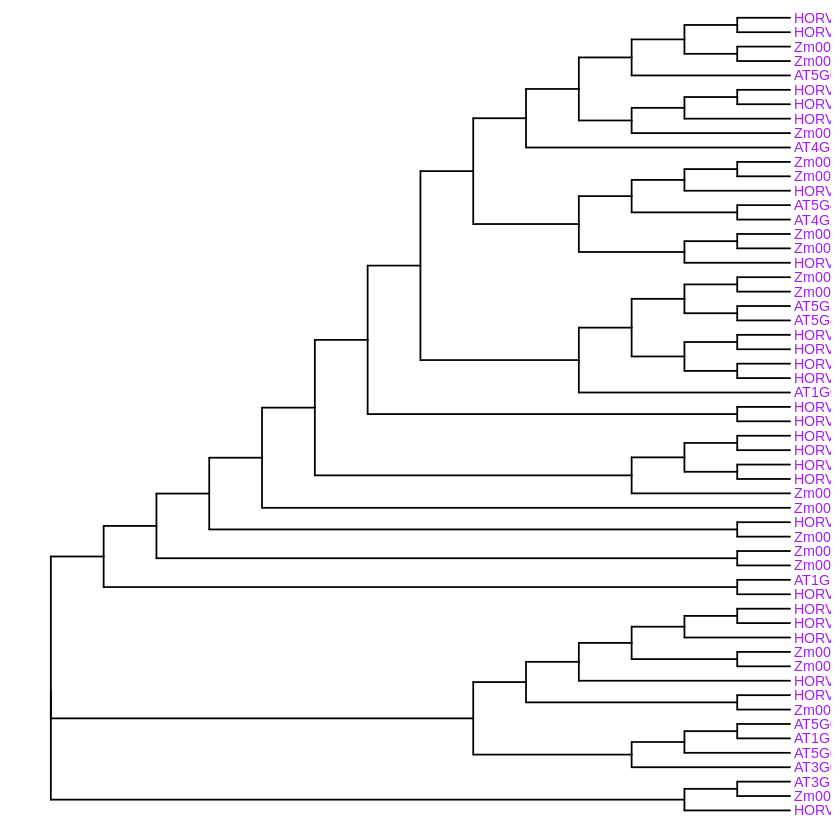

In [8]:
load("A2TEA_finished.RData")
my_tree <- HYPOTHESES.a2tea[[1]]@expanded_OGs$N0.HOG0000314@tree

     ggtree(my_tree, layout = "rectangular", branch.length = "none") +
       ggtree::geom_tiplab(size=3, color="purple") +
         geom_hilight(node=1, fill="gold")

### Better distinct color palettes for the plots (solved)

In [ ]:
# create your own color palette based on `seedcolors`
# nice thing about doing it this way 
#P8 = createPalette(8,  c("#ff0000", "#00ff00", "#0000ff"))
#P35 = createPalette(35,  c("#ff0000", "#00ff00", "#0000ff"))
P36 = createPalette(36, c("#E69F00", "#56B4E9", "#009E73"))
#P36 = createPalette(36, palette_OkabeIto_black)
#Polychrome::swatch(P8)
#Polychrome::swatch(P35)
Polychrome::swatch(P36)
unname(P36)

#cols <- P36

# 8 or less HOGs then we use the OkabeIto scale with black
# https://www.chronicle.com/blogs/profhacker/color-blind-accessible-figures
palette_OkabeIto_black <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", 
                            "#0072B2", "#D55E00", "#CC79A7", "#000000")

palette_OkabeIto_black

cols <-palette_OkabeIto_black

#pie(rep(1, 8), col = palette_OkabeIto_black)

# more than 8 HOGs and we refer to a pre-generated Polychrome-scale

cols36 <- c(palette_OkabeIto_black, unname(P36)[-c(1:8)])
pie(rep(1, 36), col = cols36)

In [ ]:
# 8 or less HOGs then we use the OkabeIto scale with black
# https://www.chronicle.com/blogs/profhacker/color-blind-accessible-figures
#palette_OkabeIto_black <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", 
#                            "#0072B2", "#D55E00", "#CC79A7", "#000000")
# more than 8 - then additional colors are used;
# generated by P36 = Polychrome::createPalette(36, c("#E69F00", "#56B4E9", "#009E73"))
# after a couple of tries these are the colors (first 8 are OkabeIto scale):
cols <- c(
          '#E69F00','#56B4E9','#009E73','#F0E442','#0072B2','#D55E00','#CC79A7','#000000',
          '#D8EE00','#A70D2E','#EEE2BB','#DF9AFD','#163BAF','#E6DEFD','#715600','#164F5D',
          '#91F58A','#F30DFE','#00FAFA','#FF9F99','#FC7516','#FD0D8D','#FE83CD','#840086',
          '#688B26','#225AFC','#8178B0','#0DFDC3','#B4EDDD','#CDBD4B','#88867C','#2A9AFE',
          '#9D0060','#86382A','#FCBAD3','#E556DA'
         )

# more than 36?
# the we extend with colorRampPalette
# colorRampPalette(cols)(number of additional HOGs + 36)
# if condition here:
cols <- colorRampPalette(cols)(37)
pie(rep(1,37), col = cols)

### Solving unclear coloring of the tips and all branches of the trees (solved)
### Addition of log2Foldchange values (solved)

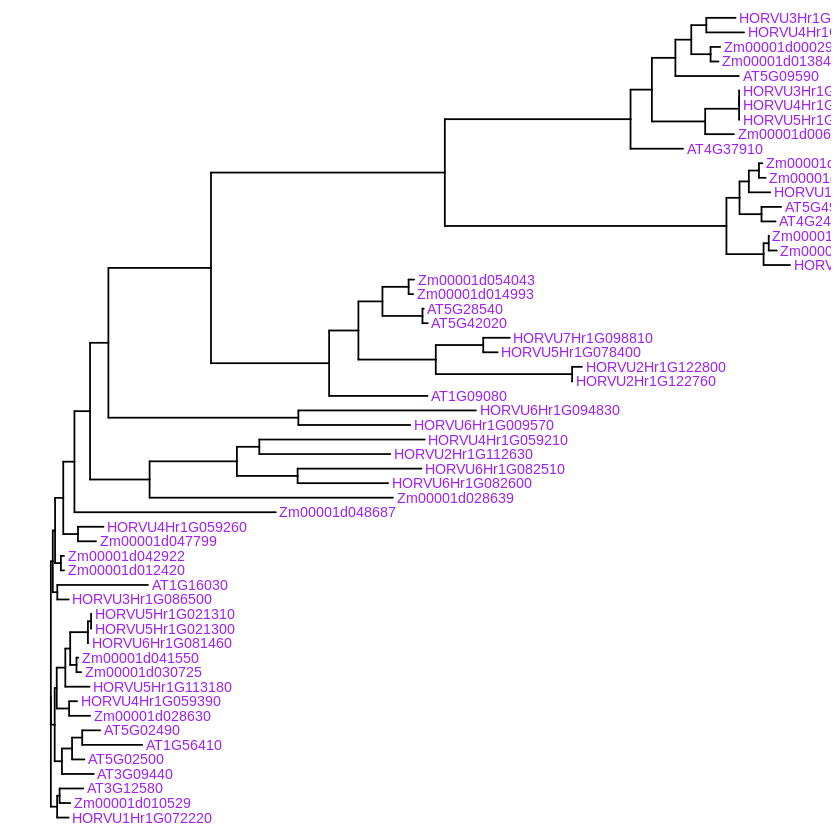

In [21]:
load("A2TEA_finished.RData")

my_tree <- HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000314@tree

ggtree(my_tree) +
  geom_tiplab(size=3, color="purple")

parent node branch.length label            isTip x  y         branch
1   58      1   0.013626133   HORVU1Hr1G072220 TRUE  14  1        13.0  
2   59      2   0.012515226   Zm00001d010529   TRUE  14  2        13.5  
3   59      3   0.027846003   AT3G12580        TRUE  14  3        13.5  
4   61      4   0.013432119   HORVU3Hr1G086500 TRUE  14 16        13.5  
5   61      5   0.106692318   AT1G16030        TRUE  14 17        13.5  
6   63      6   0.003745861   Zm00001d012420   TRUE  14 18        13.5  
7   63      7   0.003737064   Zm00001d042922   TRUE  14 19        13.5  
8   65      8   0.021243859   Zm00001d047799   TRUE  14 20        13.5  
9   65      9   0.030054229   HORVU4Hr1G059260 TRUE  14 21        13.5  
10  66     10   0.237116981   Zm00001d048687   TRUE  14 22         9.0  
11  69     11   0.131769987   HORVU6Hr1G009570 TRUE  14 28        13.5  
12  69     12   0.209095574   HORVU6Hr1G094830 TRUE  14 29        13.5  
13  73     13   0.031152855   HORVU5Hr1G032650 TRUE  14 39        13.0  
14  74     14   0.009529810   Zm00001d041119   TRUE  14 40        13.5  
15  74     15   0.000000005   Zm00001d023802   TRUE  14 41        13.5  
16  76     16   0.016571283   AT4G24280        TRUE  14 42        13.5  
17  76     17   0.023118694   AT5G49910        TRUE  14 43        13.5  
18  77     18   0.025216464   HORVU1Hr1G030790 TRUE  14 44        13.0  
19  78     19   0.007853199   Zm00001d033591   TRUE  14 45        13.5  
20  78     20   0.004038271   Zm00001d013507   TRUE  14 46        13.5  
21  79     21   0.061789008   AT4G37910        TRUE  14 47        11.5  
22  81     22   0.033844713   Zm00001d006036   TRUE  14 48        12.5  
23  82     23   0.000000005   HORVU5Hr1G073730 TRUE  14 49        13.0  
24  83     24   0.000000005   HORVU4Hr1G012460 TRUE  14 50        13.5  
25  83     25   0.000000005   HORVU3Hr1G030980 TRUE  14 51        13.5  
26  84     26   0.074735475   AT5G09590        TRUE  14 52        12.5  
27  86     27   0.009353686   Zm00001d013842   TRUE  14 53        13.5  
28  86     28   0.011274455   Zm00001d000295   TRUE  14 54        13.5  
29  87     29   0.044446503   HORVU4Hr1G089090 TRUE  14 55        13.5  
30  87     30   0.034472798   HORVU3Hr1G073230 TRUE  14 56        13.5  
⋮   ⋮      ⋮    ⋮             ⋮                ⋮     ⋮  ⋮         ⋮     
81   80     81  0.062750698   1.000            FALSE 11 48.875000 10.5  
82   81     82  0.039952057   0.997            FALSE 12 49.750000 11.5  
83   82     83  0.000000005   0.885            FALSE 13 50.500000 12.5  
84   80     84  0.027657254   0.723            FALSE 11 53.250000 10.5  
85   84     85  0.018704548   0.817            FALSE 12 54.500000 11.5  
86   85     86  0.022742087   0.951            FALSE 13 53.500000 12.5  
87   85     87  0.017712812   0.849            FALSE 13 55.500000 12.5  
88   70     88  0.139111082   1.000            FALSE 10 32.250000  8.5  
89   88     89  0.034478738   0.937            FALSE 11 34.500000 10.5  
90   89     90  0.091124493   1.000            FALSE 12 32.500000 11.5  
91   90     91  0.160551531   1.000            FALSE 13 31.500000 12.5  
92   90     92  0.055880099   0.994            FALSE 13 33.500000 12.5  
93   89     93  0.028315191   0.878            FALSE 12 36.500000 11.5  
94   93     94  0.047137787   0.998            FALSE 13 35.500000 12.5  
95   93     95  0.030803525   0.986            FALSE 13 37.500000 12.5  
96   67     96  0.070111031   0.979            FALSE 11 24.250000  8.0  
97   96     97  0.102799155   1.000            FALSE 12 25.500000 11.5  
98   97     98  0.071500525   0.989            FALSE 13 24.500000 12.5  
99   97     99  0.026398838   0.712            FALSE 13 26.500000 12.5  
100  57    100  0.004513277   0.851            FALSE  8  7.390625  4.0  
101 100    101  0.008547720   0.846            FALSE 11  4.875000  9.5  
102 101    102  0.011921093   0.716            FALSE 12  5.750000 11.5  
103 102    103  0.011960166   0.921            FALSE 13  6.500

Aesthetic mapping: 
* `colour`      -> `HOG`
* `inherit.aes` -> FALSE
* `x`           -> `x`
* `y`           -> `y`

tree_dge



gene      log2FoldChange
1 AT1G09080 -0.563406378  
2 AT1G16030  0.219947140  
3 AT1G56410  0.000000000  
4 AT3G09440  0.024606794  
5 AT3G12580  0.927454142  
6 AT4G24280  0.002998163

parent node branch.length label            isTip x  y         branch
1   58      1   0.013626133   HORVU1Hr1G072220 TRUE  14  1        13.0  
2   59      2   0.012515226   Zm00001d010529   TRUE  14  2        13.5  
3   59      3   0.027846003   AT3G12580        TRUE  14  3        13.5  
4   61      4   0.013432119   HORVU3Hr1G086500 TRUE  14 16        13.5  
5   61      5   0.106692318   AT1G16030        TRUE  14 17        13.5  
6   63      6   0.003745861   Zm00001d012420   TRUE  14 18        13.5  
7   63      7   0.003737064   Zm00001d042922   TRUE  14 19        13.5  
8   65      8   0.021243859   Zm00001d047799   TRUE  14 20        13.5  
9   65      9   0.030054229   HORVU4Hr1G059260 TRUE  14 21        13.5  
10  66     10   0.237116981   Zm00001d048687   TRUE  14 22         9.0  
11  69     11   0.131769987   HORVU6Hr1G009570 TRUE  14 28        13.5  
12  69     12   0.209095574   HORVU6Hr1G094830 TRUE  14 29        13.5  
13  73     13   0.031152855   HORVU5Hr1G032650 TRUE  14 39        13.0  
14  74     14   0.009529810   Zm00001d041119   TRUE  14 40        13.5  
15  74     15   0.000000005   Zm00001d023802   TRUE  14 41        13.5  
16  76     16   0.016571283   AT4G24280        TRUE  14 42        13.5  
17  76     17   0.023118694   AT5G49910        TRUE  14 43        13.5  
18  77     18   0.025216464   HORVU1Hr1G030790 TRUE  14 44        13.0  
19  78     19   0.007853199   Zm00001d033591   TRUE  14 45        13.5  
20  78     20   0.004038271   Zm00001d013507   TRUE  14 46        13.5  
21  79     21   0.061789008   AT4G37910        TRUE  14 47        11.5  
22  81     22   0.033844713   Zm00001d006036   TRUE  14 48        12.5  
23  82     23   0.000000005   HORVU5Hr1G073730 TRUE  14 49        13.0  
24  83     24   0.000000005   HORVU4Hr1G012460 TRUE  14 50        13.5  
25  83     25   0.000000005   HORVU3Hr1G030980 TRUE  14 51        13.5  
26  84     26   0.074735475   AT5G09590        TRUE  14 52        12.5  
27  86     27   0.009353686   Zm00001d013842   TRUE  14 53        13.5  
28  86     28   0.011274455   Zm00001d000295   TRUE  14 54        13.5  
29  87     29   0.044446503   HORVU4Hr1G089090 TRUE  14 55        13.5  
30  87     30   0.034472798   HORVU3Hr1G073230 TRUE  14 56        13.5  
⋮   ⋮      ⋮    ⋮             ⋮                ⋮     ⋮  ⋮         ⋮     
81   80     81  0.062750698   1.000            FALSE 11 48.875000 10.5  
82   81     82  0.039952057   0.997            FALSE 12 49.750000 11.5  
83   82     83  0.000000005   0.885            FALSE 13 50.500000 12.5  
84   80     84  0.027657254   0.723            FALSE 11 53.250000 10.5  
85   84     85  0.018704548   0.817            FALSE 12 54.500000 11.5  
86   85     86  0.022742087   0.951            FALSE 13 53.500000 12.5  
87   85     87  0.017712812   0.849            FALSE 13 55.500000 12.5  
88   70     88  0.139111082   1.000            FALSE 10 32.250000  8.5  
89   88     89  0.034478738   0.937            FALSE 11 34.500000 10.5  
90   89     90  0.091124493   1.000            FALSE 12 32.500000 11.5  
91   90     91  0.160551531   1.000            FALSE 13 31.500000 12.5  
92   90     92  0.055880099   0.994            FALSE 13 33.500000 12.5  
93   89     93  0.028315191   0.878            FALSE 12 36.500000 11.5  
94   93     94  0.047137787   0.998            FALSE 13 35.500000 12.5  
95   93     95  0.030803525   0.986            FALSE 13 37.500000 12.5  
96   67     96  0.070111031   0.979            FALSE 11 24.250000  8.0  
97   96     97  0.102799155   1.000            FALSE 12 25.500000 11.5  
98   97     98  0.071500525   0.989            FALSE 13 24.500000 12.5  
99   97     99  0.026398838   0.712            FALSE 13 26.500000 12.5  
100  57    100  0.004513277   0.851            FALSE  8  7.390625  4.0  
101 100    101  0.008547720   0.846            FALSE 11  4.875000  9.5  
102 101    102  0.011921093   0.716            FALSE 12  5.750000 11.5  
103 102    103  0.011960166   0.921            FALSE 13  6.500

Aesthetic mapping: 
* `colour`      -> `HOG`
* `inherit.aes` -> FALSE
* `x`           -> `x`
* `y`           -> `y`

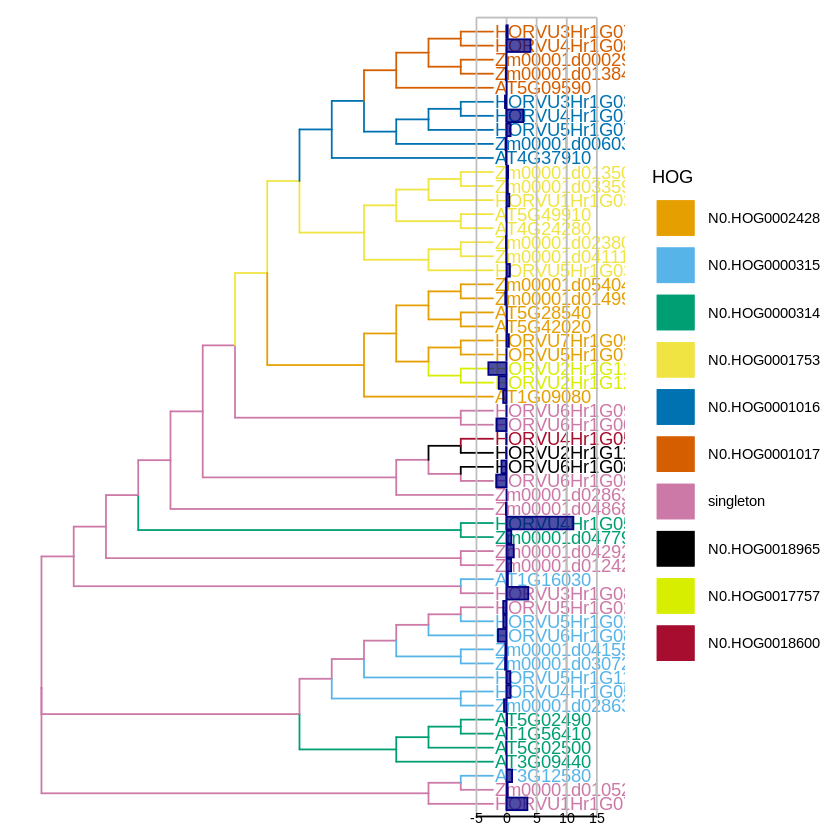

In [17]:
#test tree is:
my_tree <- HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000314@tree
#my_tree
my_tree_HOG_genes <- HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000314@genes_HOG
#my_tree_HOG_genes
my_tree_genes <- HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000314@genes


#HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000207@genes_HOG
#HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000207@genes_extend_hits
#HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000207@genes

# access to all ids for each tip label ;D - as_tibble
#groupOTU(my_tree, "Zm00001d013553", group_name = "my_tree_HOG_genes") %>% as_tibble

el <- list()

    for (i in 1:length(my_tree$tip.label)) {
        if (is_empty(HOG_DE.a2tea$HOG[HOG_DE.a2tea$gene == my_tree$tip.label[i]]) == FALSE) {
           first <- HOG_DE.a2tea$HOG[HOG_DE.a2tea$gene == my_tree$tip.label[i]]
           el <- c(el, list(filler = my_tree$tip.label[i]))
           names(el)[i] <- first
        }
        else {
            el <- c(el, list(singleton = my_tree$tip.label[i]))      
        }
    }

    # reduce the list to unique tags
    el_split <- sapply(unique(names(el)), function(x) unname(unlist(el[names(el)==x])), simplify=FALSE)
    #length(el_split)
                       
    
    x <- as_vector(HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000314@genes)
    #x     
    
    # get list of genes based on current tree in order of main HOG and then best blast hits
    HOG_vec <- HOG_DE.a2tea %>%
    # actually I don't want all genes here but rather those that remain after dropping unwanted tips
    # filter(gene %in% all_genes_HOG()) %>%
      filter(gene %in% my_tree$tip.label) %>%
      arrange(match(gene, my_tree_genes)) %>%
      distinct(HOG) %>% pull()
  
                       
    cols <- c(
          '#E69F00','#56B4E9','#009E73','#F0E442','#0072B2','#D55E00','#CC79A7','#000000',
          '#D8EE00','#A70D2E','#EEE2BB','#DF9AFD','#163BAF','#E6DEFD','#715600','#164F5D',
          '#91F58A','#F30DFE','#00FAFA','#FF9F99','#FC7516','#FD0D8D','#FE83CD','#840086',
          '#688B26','#225AFC','#8178B0','#0DFDC3','#B4EDDD','#CDBD4B','#88867C','#2A9AFE',
          '#9D0060','#86382A','#FCBAD3','#E556DA'
         )
                    
    names(cols) <- levels(factor(HOG_vec, levels = HOG_vec))
    #cols
    #do I need to limit this to the actual number of HOGs?
    # would need to change that in the scale_colour_manual() call below...
    # message("cols[1:19]")
    # cols[1:19]
                       
    
    #basic tree       
    p_OTU <- ggtree(tr = my_tree,
                    layout = "rectangular",
                    branch.length = "none", inherit.aes=TRUE
                   )

    # the HOGs can't be assigned in some cases which leads to the introduction of "0"s
    # we need to get rid of them somehow, as this leads to 1 additional HOG (called 0) being introduced
    # this shifts the colouring and leads to all kinds of problems
    # the solution here is to assign to each zero occurence the HOG of the next element (that is not a zero)
    # with this we can emphasize:
    # the expansion aspect as the 0 element is colored like the next element (further away from root node);looks nice
    gOTU <- groupOTU(p_OTU, el_split, 'HOG', overlap = "origin")
    gOTU$data
    #if (0 %in% gOTU$data$HOG) {
        #print("in")
    #}
                       
    # the whole thing can be written as a neat function;
    # input "OTU" = gOTU$data$HOG

    zero2HOG <- function(OTU) {
        # get index positions of all 0 occurences
        zero_index_pos <- OTU %>% `==`(0) %>% which()
    
        # create empty vector; length is length of just determined # of zero positions
        all_zero_index_pos_shift <- vector(length = length(zero_index_pos))

        # we iterate over the vector of zero positions
        for (i in 1:length(zero_index_pos)){
          # assign current zero index position to a "fresh" vector
          zero_index_pos_shift <- zero_index_pos[i]
          # while this position is referring to a zero keep doing the while loop;
          # stop once we don't find a 0 at checked position (so either a HOG or singleton)
          while (OTU[zero_index_pos_shift] == 0) {
            # add 1; (shift position one to the right)
            zero_index_pos_shift <- zero_index_pos_shift + 1
          }
          # add non zero position to ith element in result vector
          all_zero_index_pos_shift[i] <- zero_index_pos_shift
        }
        return(all_zero_index_pos_shift)
    }
                       
    if (0 %in% gOTU$data$HOG) {

     # calling function and checking output
     zero_alt_HOG_pos <- zero2HOG(gOTU$data$HOG)
     #zero_alt_HOG_pos

     # we can use the shifted vector to get the HOG elements at these positions 
     # (what if we have two zeros next to one another?..) - probably not going to be the case
     zero_alt_HOG = gOTU$data$HOG[zero_alt_HOG_pos]
     #zero_alt_HOG

     ## replace all occurences of 0 with sth else
     # with the HOG of the next, non-zero element
     #replace(gOTU$data$HOG, gOTU$data$HOG %in% 0, zero_alt_HOG)
     gOTU$data$HOG <- replace(gOTU$data$HOG, gOTU$data$HOG %in% 0, zero_alt_HOG)                 
   }                    
                       
    # Finishing up the tree
    p <- gOTU +
    aes(color=HOG, inherit.aes=FALSE) +
    geom_tiplab(aes(color=HOG), show.legend = TRUE) +
#    geom_hilight(mapping=aes(subset = node %in% c(1:3, 5)), 
#                 extendto = 6.5
#                ) +
    # using both values and breaks(as a factor!) allows to keep consistent colors when viewing tree subsets   
    scale_color_manual(values=cols[1:length(HOG_vec)], 
                       breaks = levels(factor(HOG_vec, levels = HOG_vec)),
                       # guides solves ugly legend design
                       # helpful link: https://aosmith.rbind.io/2020/07/09/ggplot2-override-aes/
    #guides(color = guide_legend(override.aes = list(size = 10) ) ) #+ new_scale_colour()

                       guide = guide_legend(keywidth=0.5,
                                             keyheight=0.5,
                                             order=1,
                                             override.aes = list(size = 10)) 
    )
        
    # call/plot the tree
    p$mapping
                       
 tree_dge <- HOG_DE.a2tea %>%
  filter(gene %in% my_tree$tip.label) %>%
  replace_na(list(log2FoldChange = 0))%>%  select(gene, log2FoldChange) #%>% select(-HOG) #%>% mutate(HOG2 = HOG)

 tree_dge_only_sig <- HOG_DE.a2tea %>%
  filter(gene %in% my_tree$tip.label) %>%
  filter(significant == "yes")

#length(my_tree$tip.label)
message("tree_dge")
head(tree_dge)
           
p$data
                       
#fruit_plot(
#  p,
#  data = tree_dge,
#  geom = geom_bar,
#  mapping,
#  offset = 0.03,
#  pwidth = 0.2,
#  position = "auto",
#  ...
#)

#p
  
tt <- 10
                       
p <- p %<+% tree_dge + new_scale_fill() + geom_fruit(#data = tree_dge,
#p <- p + geom_fruit(data = tree_dge, 
                        geom = geom_bar, 
                        mapping = aes(
                                    y=gene,
                                    x=log2FoldChange,
                                    color = NULL
                                    ),
                        orientation="y",
                        stat="identity",
                        fill="navy",
                        colour = "navy",
                        alpha=.7,
                        inherit.aes = FALSE,
                        axis.params = 
                                 list(
                                   axis = "x", 
                                   text.size = 3, 
                                  # nbreak - variable or function accepted here?
                                  nbreak = 3, 
                                  line.size = 0.5, 
                                  line.color = "black",
                                  inherit.aes = FALSE,
                                ),
                               grid.params =
                                 list(
                                   size = 0.5, #color = "navy"
                                 )
                        )
           
#p$labels
p$mapping
#p$mapping <- p$mapping[-1]
p
                       #                       p #+ guides(color = guide_legend(override.aes = list(size = 10) ) )                      
                       

In [ ]:
#?geom_fruit
?ggplot2::aes

parent node branch.length label isTip x        y  branch   angle
1 109    1    0.52848075    t92   TRUE  4.915885 59 4.651644 212.4
2 109    2    0.25047280    t54   TRUE  4.637877 60 4.512640 216.0
3 108    3    0.77132018    t11   TRUE  4.944675 58 4.559015 208.8
4 107    4    0.02237646    t100  TRUE  3.963497 57 3.952309 205.2
5 106    5    0.45615634    t33   TRUE  4.118935 56 3.890857 201.6
6 111    6    0.26285236    t56   TRUE  4.786891 54 4.655464 194.4

id   value      
1 t92  1.426588975
2 t54  1.166303526
3 t11  0.005696408
4 t100 0.156196757
5 t33  1.350399734
6 t56  1.208817982

id   group
1 t92  A    
2 t54  A    
3 t11  A    
4 t100 A    
5 t33  A    
6 t56  A

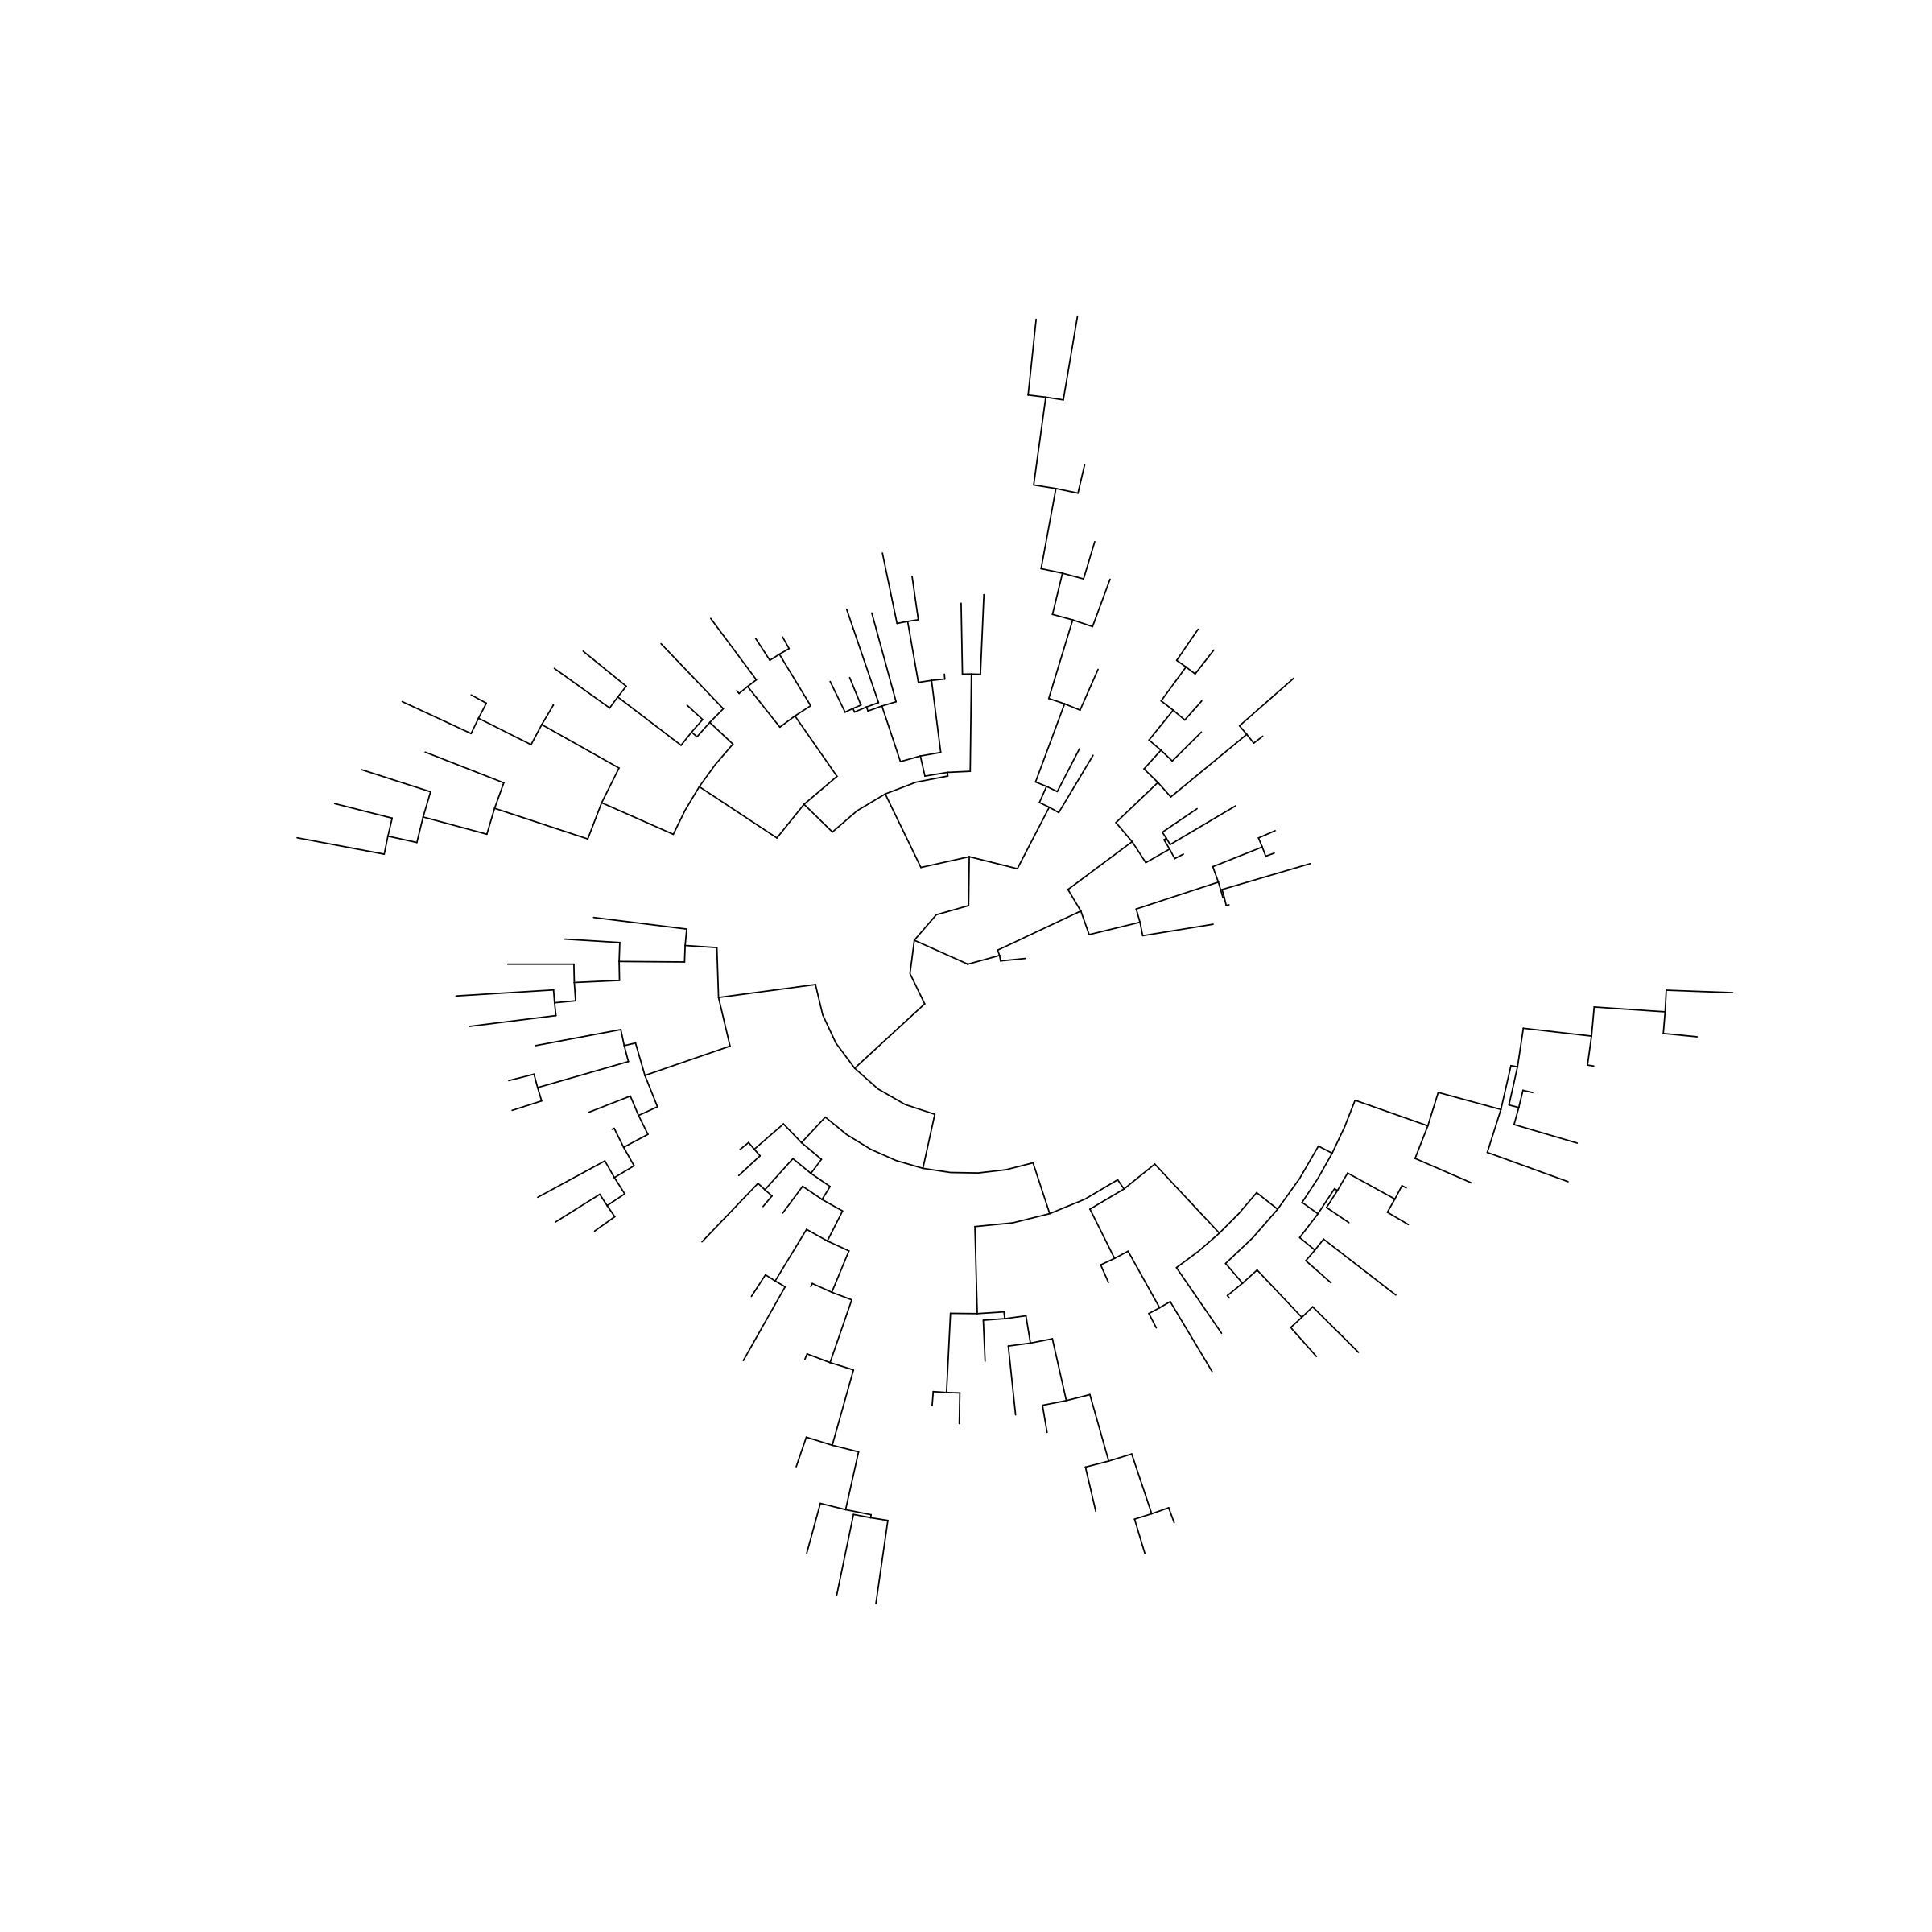

In [33]:
library(ggtree)
library(ggplot2)
library(ggstar)
set.seed(1024)
tr <- rtree(100)
dd = data.frame(id=tr$tip.label, value=abs(rnorm(100)))
dt = data.frame(id=tr$tip.label, group=c(rep("A",50),rep("B",50)))
p <- ggtree(tr, layout="circular") 
p

head(p$data)
head(dd)
head(dt)

In [45]:
tr <- HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000314@tree
x <- as_tibble(tr)
## the input nodes can be node ID or label




p_OTU <- ggtree(tr = tr,
                    layout = "rectangular",
                    branch.length = "none", 
                    # super important for the additonal layers to work!
                    inherit.aes=TRUE,
                   )
#p_OTU$data

# withthis it works
gOTU <- groupOTU(p_OTU, c('HORVU1Hr1G072220', 'Zm00001d010529'), group_name = "fake_group")
gOTU
gOTU$data


#with this it doesnt?
#el <- list()
#    for (i in 1:length(my_tree$tip.label)) {
#        if (is_empty(HOG_DE.a2tea$HOG[HOG_DE.a2tea$gene == my_tree$tip.label[i]]) == FALSE) {
#           first <- HOG_DE.a2tea$HOG[HOG_DE.a2tea$gene == my_tree$tip.label[i]]
#           el <- c(el, list(filler = my_tree$tip.label[i]))
#           names(el)[i] <- first
#        }
#        else {
#            el <- c(el, list(singleton = my_tree$tip.label[i]))      
#        }
#    }
    # reduce the list to unique tags
#el_split <- sapply(unique(names(el)), function(x) unname(unlist(el[names(el)==x])), simplify=FALSE)
#gOTU <- groupOTU(p_OTU, el_split, 'HOG', overlap = "origin")

                   
# get list of genes based on current tree in order of main HOG and then best blast hits
#    HOG_vec <- HOG_DE.a2tea %>%
    # actually I don't want all genes here but rather those that remain after dropping unwanted tips
    # filter(gene %in% all_genes_HOG()) %>%
#      filter(gene %in% my_tree$tip.label) %>%
#      arrange(match(gene, my_tree_genes)) %>%
#      distinct(HOG) %>% pull()
  
                       
#    cols <- c(
#          '#E69F00','#56B4E9','#009E73','#F0E442','#0072B2','#D55E00','#CC79A7','#000000',
#          '#D8EE00','#A70D2E','#EEE2BB','#DF9AFD','#163BAF','#E6DEFD','#715600','#164F5D',
#          '#91F58A','#F30DFE','#00FAFA','#FF9F99','#FC7516','#FD0D8D','#FE83CD','#840086',
#          '#688B26','#225AFC','#8178B0','#0DFDC3','#B4EDDD','#CDBD4B','#88867C','#2A9AFE',
#          '#9D0060','#86382A','#FCBAD3','#E556DA'
#         )
                    
#    names(cols) <- levels(factor(HOG_vec, levels = HOG_vec))
#cols                 



p <- gOTU +
    aes(color=fake_group) +
    geom_tiplab(aes(color=fake_group), show.legend = FALSE) #+
#    scale_color_manual(values=cols[1:length(HOG_vec)], 
#                       breaks = levels(factor(HOG_vec, levels = HOG_vec)),#) +
#                       guide = guide_legend(keywidth=0.5,
#                                            keyheight=0.5,
#                                            order=1,
#                                            override.aes = list(size = 10)) 
#    )

p 

p$mapping

a <- gOTU$data %>% mutate(logFC = 1)
tree_dge <- a %>% select(label, logFC)
head(tree_dge)
                   


p <- fruit_plot(
           p=p,
           data=tree_dge,
           geom=geom_bar,
           mapping=aes(x=logFC, y=gene),
           orientation="y",
           stat="identity"
      )

#p + geom_fruit(data = tree_dge,
#p <- p %<+% tree_dge + geom_fruit(#data = tree_dge,
#                               geom = geom_bar, 
#                               mapping = aes(
#                                           y=gene,
#                                           x=logFC,
#                                          ),
#                               fill="navy",
#                               colour = "navy",
#                               alpha=.7,
#                              orientation="y",
#                              stat="identity",
#                               axis.params =
#                                 list(
#                                   axis = "x", 
#                                   text.size = 3, 
#                                   # nbreak - variable or function accepted here?
#                                   nbreak = 3, 
#                                   line.size = 0.5, 
#                                   line.color = "black"
#                                 ),
#                                grid.params =
#                                 list(
#                                   size = 0.5, #color = "navy"
#                                 )
#               ) 
p

#p$mapping
#p

ERROR: Error in eval(expr, envir, enclos): object 'HYPOTHESES.a2tea' not found


#### nbreak does not take variable input REPREX
https://github.com/YuLab-SMU/ggtreeExtra/issues/9

In [ ]:
if (!requireNamespace("devtools", quietly=TRUE))
    install.packages("devtools")
devtools::install_github("xiangpin/ggtreeExtra")

In [70]:
head(dd)
#?ggtree

id   value        group
1 t92  -1.426588975 yes  
2 t54   1.166303526 yes  
3 t11  -0.005696408 yes  
4 t100 -0.156196757 yes  
5 t33   1.350399734 yes  
6 t56  -1.208817982 yes

In [91]:
?geom_fruit

geom_fruit             package:ggtreeExtra             R Documentation

_p_l_o_t _t_r_e_e _w_i_t_h _a_s_s_o_c_i_a_t_e_d _d_a_t_a _i_n _a_n_o_t_h_e_r _m_e_t_h_o_d.

_D_e_s_c_r_i_p_t_i_o_n:

     'geom_fruit()' can automatically re-arrange the input 'data'
     according to the tree structure. It can present the associated
     data on the external panels of the tree using the 'geom' function
     defined in 'ggplot2' or other ggplot2-based packages with
     aesthetic 'mapping' and other parameters, and it will align the
     external layers in the outer ring of circular layout tree or with
     rectangular layout tree side by side. Note: the tree should be
     created by 'ggtree'.

_U_s_a_g_e:

     geom_fruit(
       mapping,
       data = NULL,
       geom,
       offset = 0.03,
       pwidth = 0.2,
       position = "auto",
       inherit.aes = FALSE,
       grid.params = NULL,
       axis.params = list(axis = "none", text.angle = 0, text.size = 0.8, text = NULL, title
         = NULL, title.size = 3, title.height = 0.1, title.angle = 0, title.color = "black",
         nbreak = 4, line.size = 0.2, line.color = "grey", line.alpha = 1, ...),
       ...
     )
     
     fruit_plot(
       p,
       data = NULL,
       geom,
       mapping,
       offset = 0.03,
       pwidth = 0.2,
       position = "auto",
       ...
     )
     
_A_r_g_u_m_e_n_t_s:

 mapping: aes mapping for 'geom'

    data: data to plot by 'geom', the column contained tree tip labels
          should be as y in mapping.

    geom: geom function to plot the data.

  offset: numeric, distance between external layers or between tree and
          external layers, default is 0.03, meaning the 0.03 times of x
          range of tree (0.03 * xrange of tree).

  pwidth: numeric, the width of external geometric layer, default is
          0.2, meaning the 0.2 times of x range of tree (0.2 * xrange
          of tree).

position: Position adjustment, either as a string, or the result of a
          call to a position adjustment function, default is 'auto',
          see details in the following.

inherit.aes: logical, If 'FALSE', overrides the default aesthetics,
          rather than combining with them. This is most useful for
          helper functions that define both data and aesthetics and
          shouldn't inherit behaviour from the default plot
          specification, default is FALSE.

grid.params: list, the parameters to control the attributes of grid
          lines, default is NULL, see the grid.params in the following.

          grid.params control the attributes of grid line of external
          layer, it can be referred to the following parameters: ##'

            • ‘vline’ logical, whether add the vertical line, default
              is FALSE.

            • ‘color’ color of line, default is grey.

            • ‘size’ the width of line, default is 0.2.

            • ‘alpha’ the colour transparency of line, default is 1.

            • ‘lineend’ Line end style (round, butt, square), default
              is "butt".

            • ‘linejoin’ Line end style (round, butt, square), default
              is "round".

            • ‘linetype’ Type of line, default is 1.

axis.params: list, the parameters to control the attributes of pseudo
          axis, see the axis.params in the following.

          axis.params control the attributes of axis, it can be
          referred to the following parameters:

            • ‘axis’ character, add the axis, if it is set to "none",
              meaning don't display axis (default), "x" display the x
              axis, "y" display the y axis, "xy" display the two axis.

            • ‘text’ vector, the text of axis x, default is NULL, it is
              only valid when the text of axis is single and x is
              discrete.

            • ‘vjust’ numeric, A numeric specifying vertical
              justification, default is 0.5.

     

In [66]:
dd$group <- as.factor(dd$group)
str(dd)

'data.frame':	100 obs. of  3 variables:
 $ id   : chr  "t92" "t54" "t11" "t100" ...
 $ value: num  -1.4266 1.1663 -0.0057 -0.1562 1.3504 ...
 $ group: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...


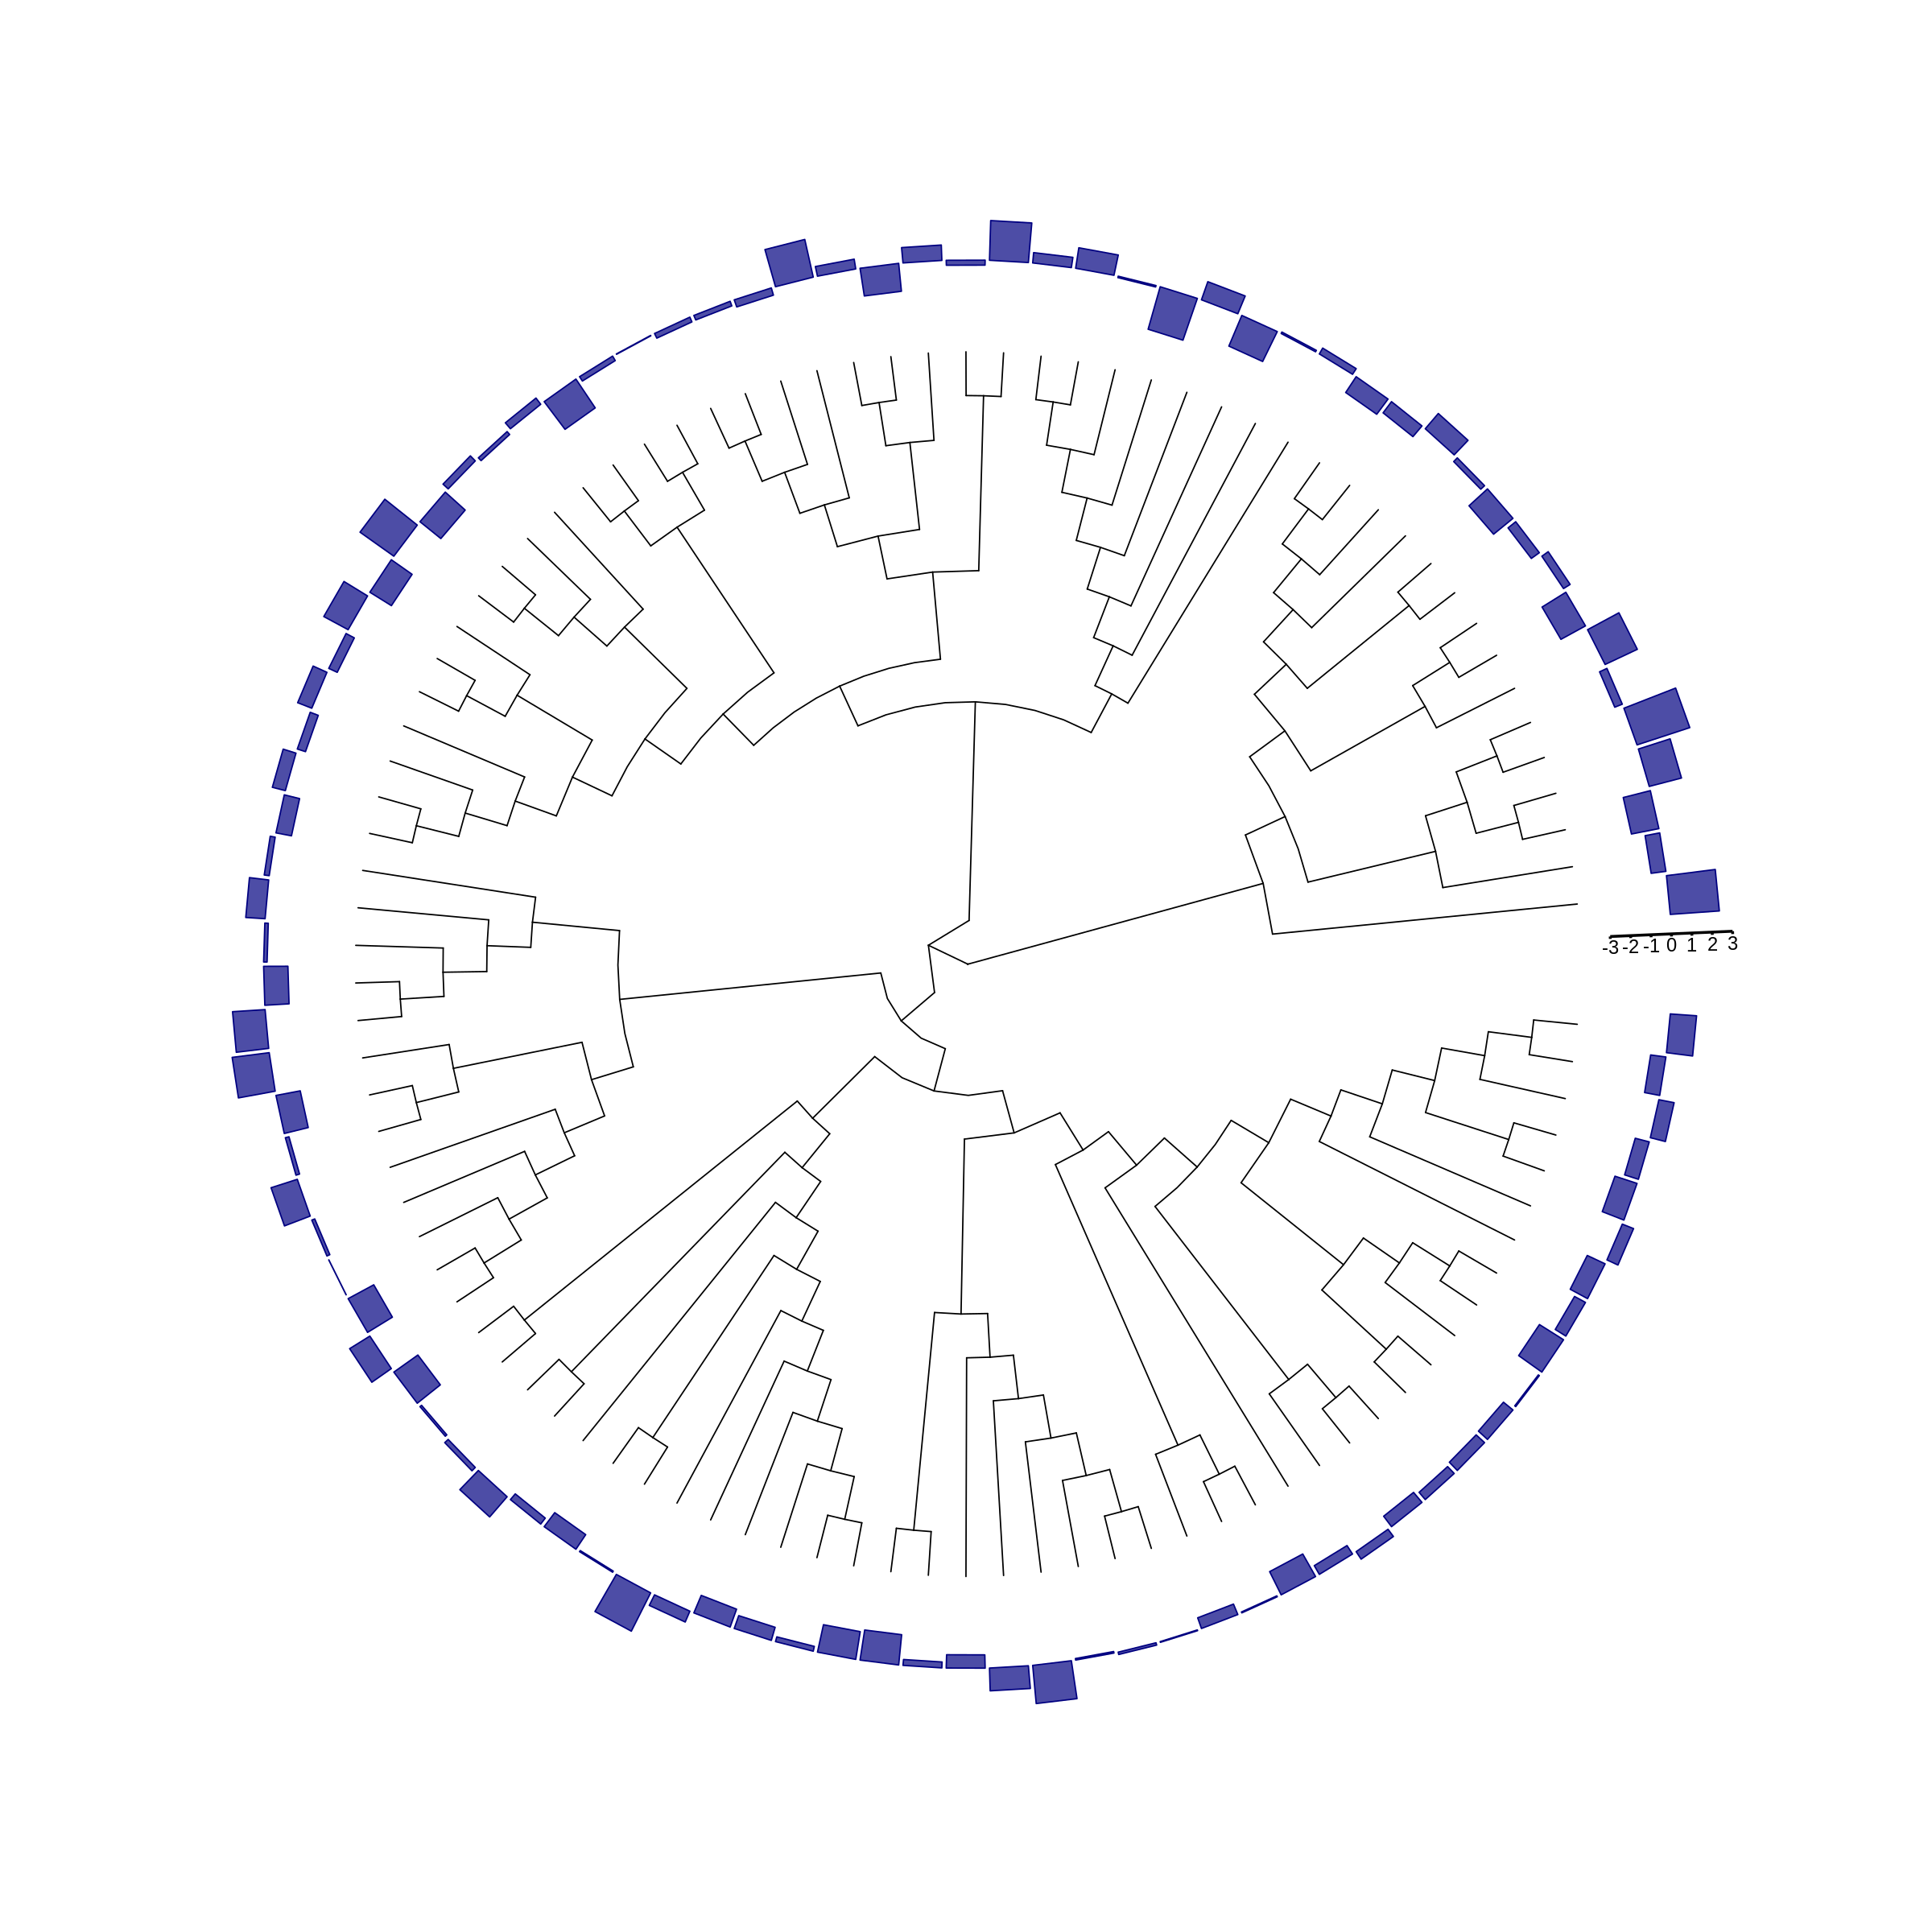

In [70]:
library(ggtree)
library(ggtreeExtra)
library(ggstar)
library(ggplot2)
set.seed(1024)
tr <- rtree(100)
dd = data.frame(id=tr$tip.label, value=rnorm(100), group="yes")
dd1 <- dd[1:50,]
dd2 <- dd[51:100,] %>%
  mutate(group = "no")
dd <- bind_rows(dd1, dd2)
#dd$group <- as.factor(dd$group)
#dd = data.frame(id=tr$tip.label, value=abs(rnorm(100)))
p <- ggtree(tr, layout="circular", branch.length = "none") 

text.size_setting = 5
nbreak_setting = 5

p2 <- p + 
      geom_fruit(
          data=dd, 
          geom=geom_bar, 
          mapping=aes(x=value, y=id),
          orientation="y",
          stat="identity",
          fill="navy",
          colour = "navy",
          alpha=.7,
          inherit.aes=FALSE,
          offset = 0.15,
          pwidth = 0.1,
          axis.params =
            list(
              axis = "x", 
              text.size = text.size_setting, 
              # nbreak - variable or function output is not accepted here?
              nbreak = nbreak_setting, 
              line.size = 1, 
              line.color = "black",
              vjust = 1
#              inherit.aes = FALSE
              ),
           grid.params =
             list(
               size = 1, #color = "navy"
               linetype = 0
             )
          ) 

p2


#pwidth
#text.size
#vjust
#grid - linetype

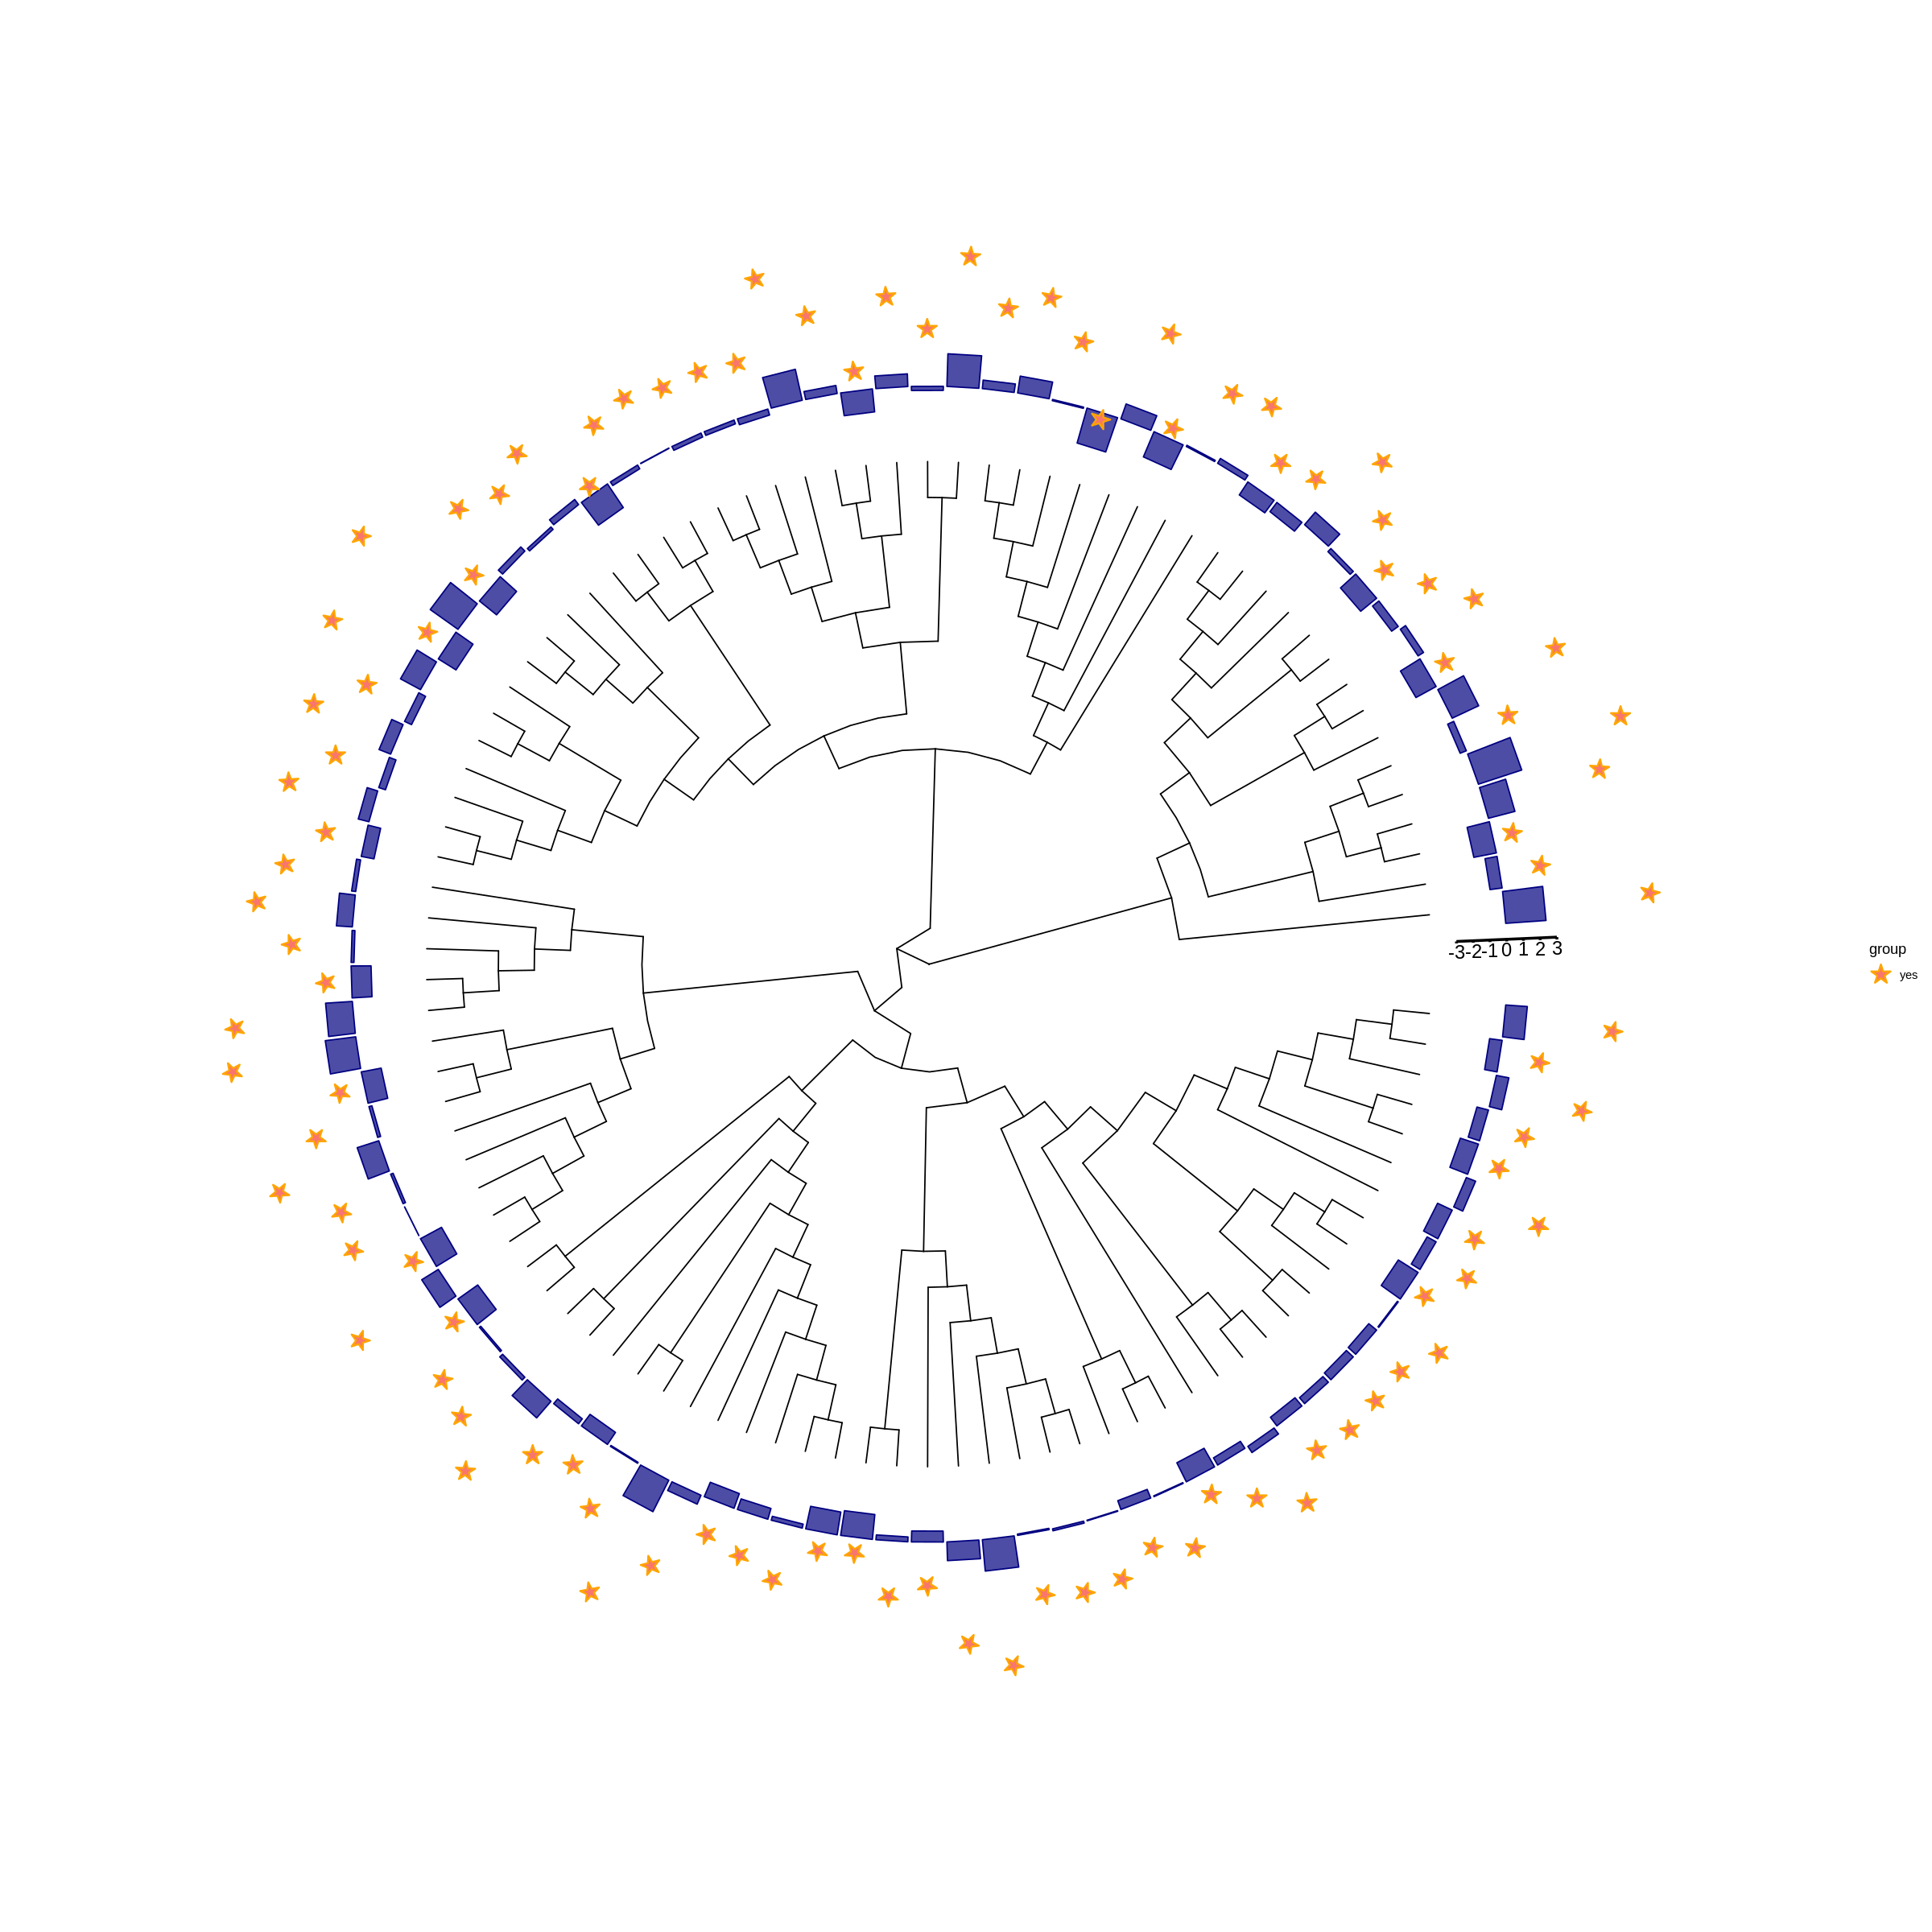

In [23]:
p3 <- p2 + # To initialize fill scale.
          geom_fruit(
              data = dd,
              geom = geom_star,
              mapping = aes(y=id, x=value, fill=group),
              size = 4,
              color = "orange",
              starstroke = 1
          ) #+
#  new_scale_fill() # To initialize fill scale.

p3

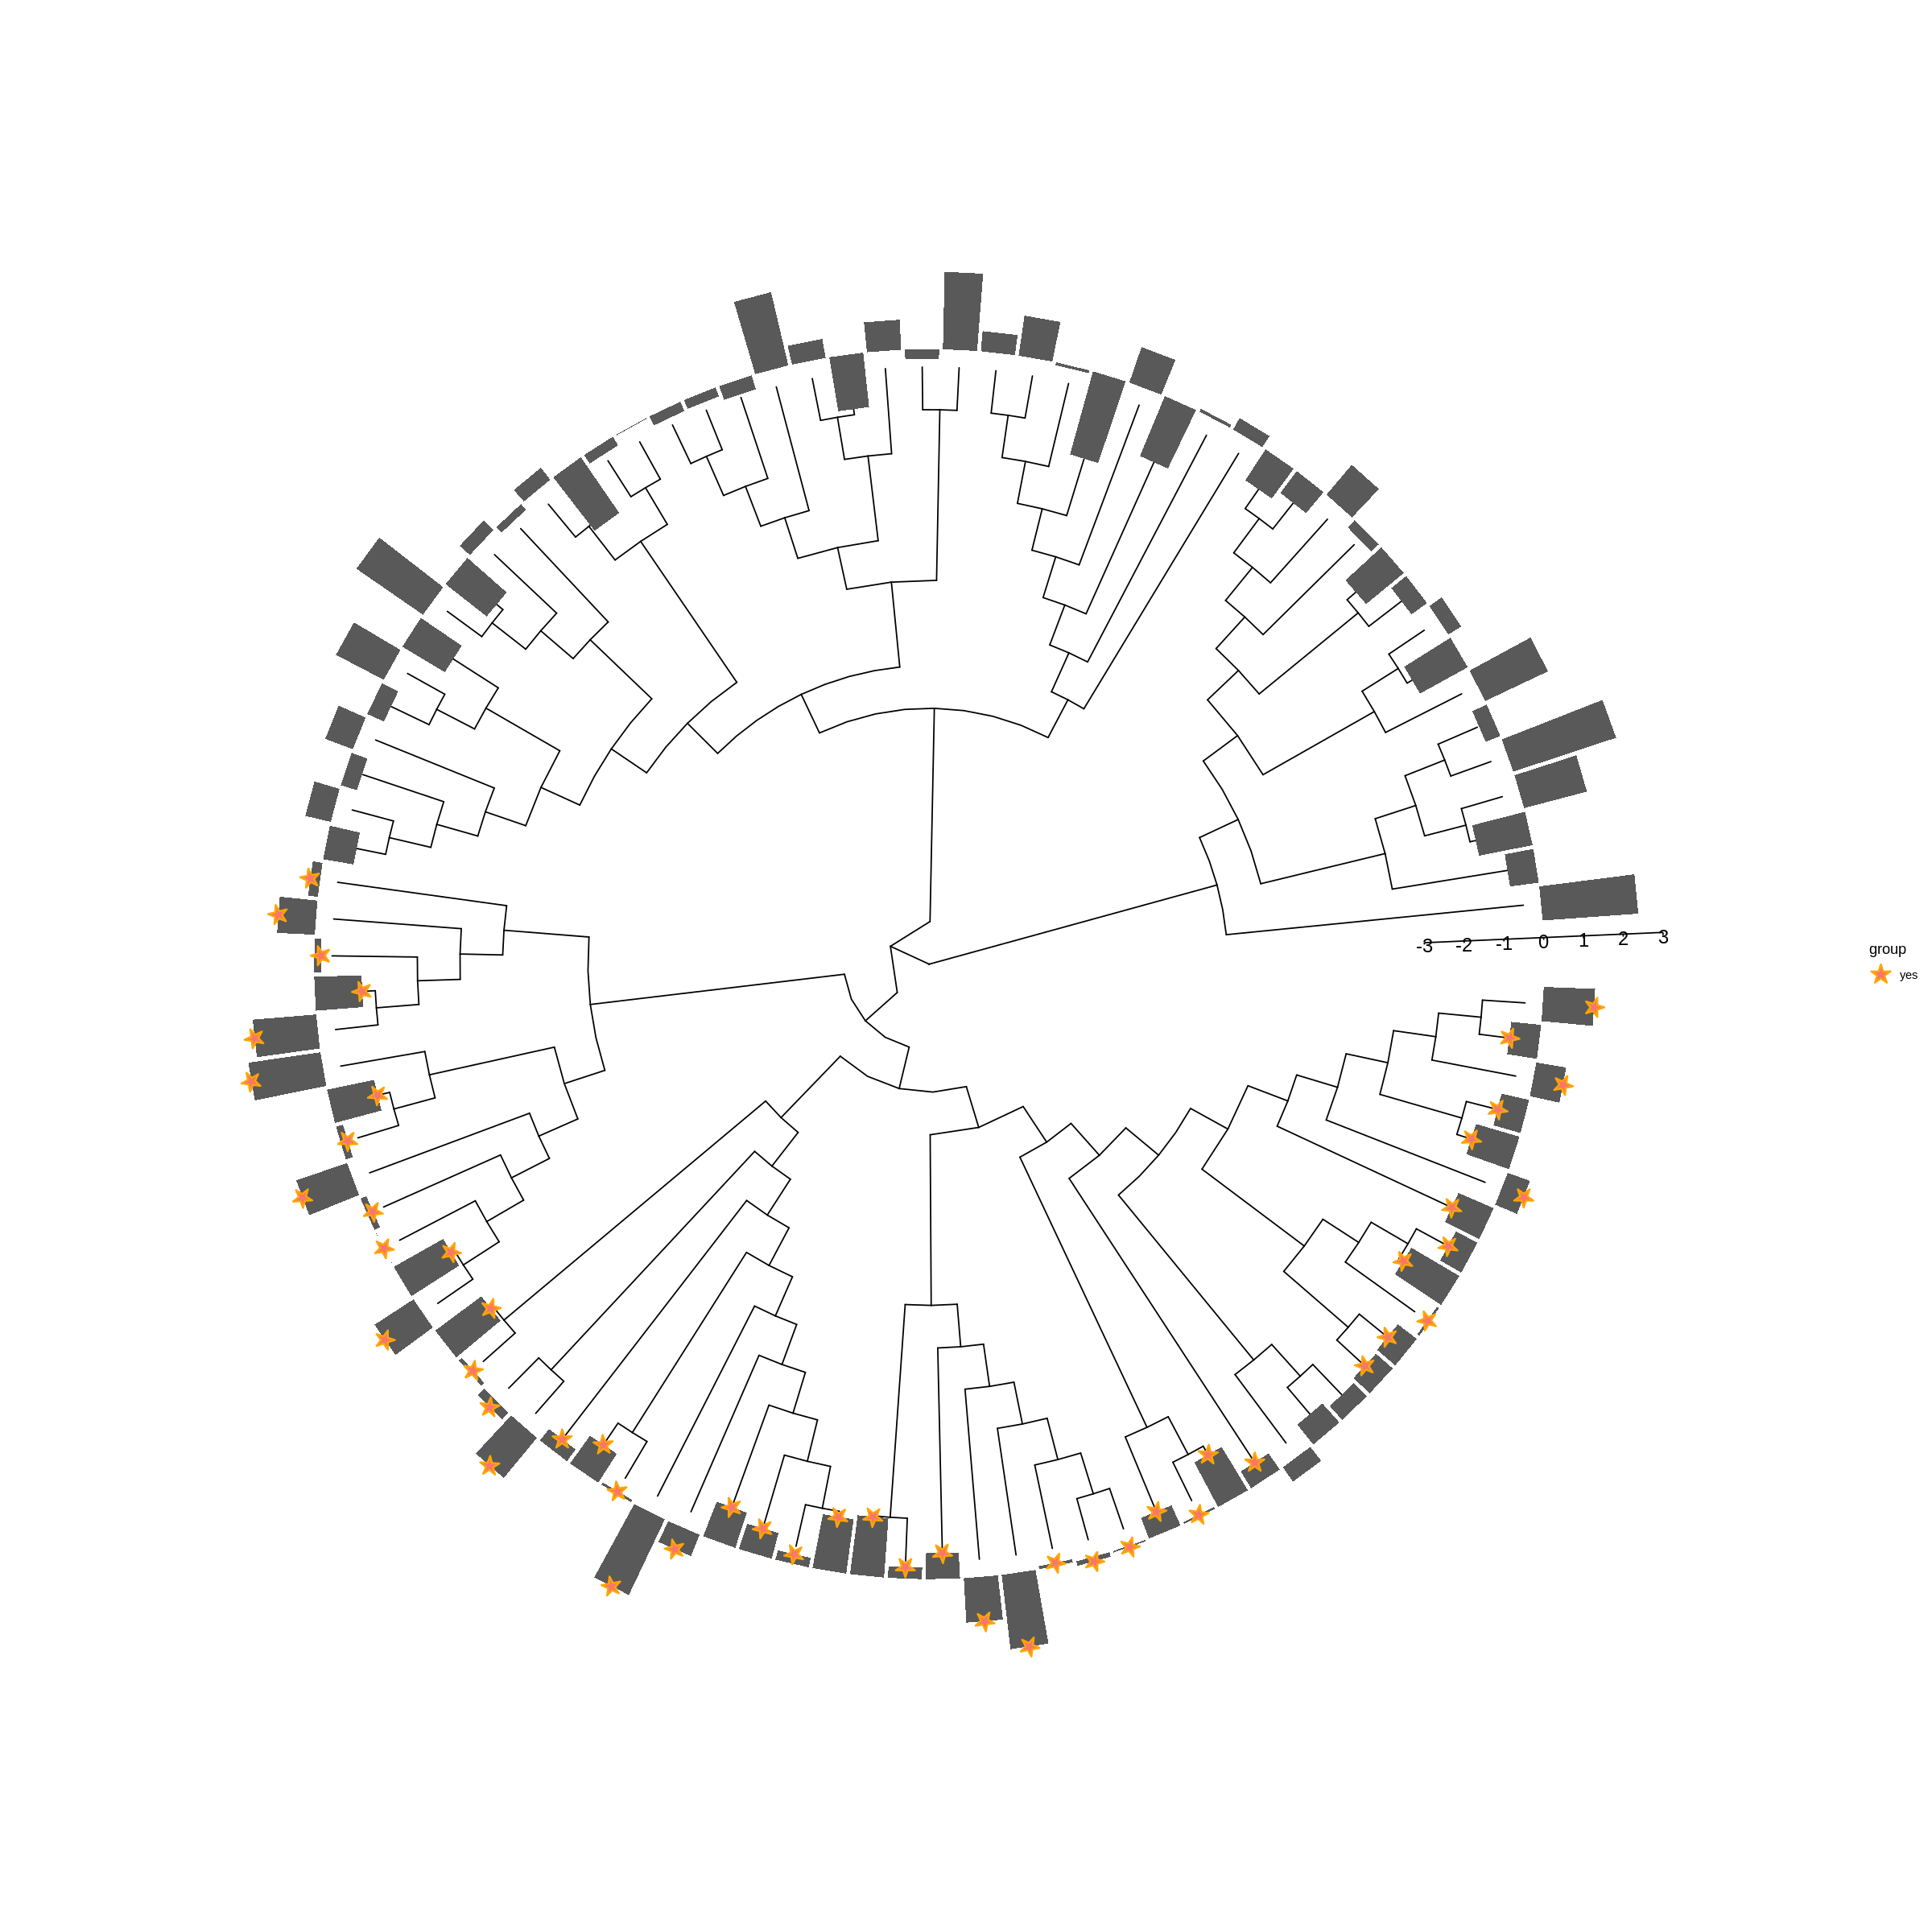

In [76]:
#including stars
p2 <- p + 
                  new_scale_fill() +

  geom_fruit_list(
      geom_fruit(
          data=dd, 
          geom=geom_bar, 
          mapping=aes(x=value, y=id),
          orientation="y",
          stat="identity",
          axis.params =
            list(
              axis = "x", 
              text.size = text.size_setting, 
              # nbreak - variable or function output is not accepted here?
              nbreak = nbreak_setting, 
              line.size = 0.5, 
              line.color = "black"
              )
          ),
          new_scale_fill(), # To initialize fill scale.
          geom_fruit(
              data = dd[dd$group=="yes",],
              geom = geom_star,
              mapping = aes(y=id, x=value, fill=group),
              size = 4,
              color = "orange",
              starstroke = 1
          )
  ) + 
  new_scale_fill() # To initialize fill scale.

      
p2

In [44]:
#x <- readAAStringSet(protein_sequences)
d <- as.dist(stringDist(x, method = "hamming")/width(x)[1])
library(ape)
tree <- bionj(d)
library(ggtree)
p <- ggtree(tree ) + geom_tiplab()

data = tidy_msa(x, 164, 213)
p + geom_fruit(geom = geom_msa, data = data,  panel = 'msa',
               font = NULL, color = "Chemistry_AA") #+
#    xlim_tree(1) +
#   geom_facet(geom = geom_text, data = data, panel = 'msa', mapping = aes(x = position, label = character))


Attaching package: ‘ape’


The following object is masked from ‘package:seqmagick’:

    consensus


The following object is masked from ‘package:Biostrings’:

    complement


The following object is masked from ‘package:treeio’:

    drop.tip


The following object is masked from ‘package:ggtree’:

    rotate




ERROR: Error: (converted from warning) Unknown or uninitialised column: `name`.


In [134]:
head(p)
head(data)

$data
# A tibble: 110 × 9
   parent  node branch.length label            isTip     x     y branch angle
    <int> <int>         <dbl> <chr>            <lgl> <dbl> <dbl>  <dbl> <dbl>
 1     94     1       0.0225  HORVU2Hr1G122760 TRUE  0.327    33  0.316  212.
 2     94     2       0.0326  HORVU2Hr1G122800 TRUE  0.337    32  0.321  206.
 3     92     3       0.0412  HORVU5Hr1G078400 TRUE  0.310    31  0.289  199.
 4     92     4       0.0460  HORVU7Hr1G098810 TRUE  0.315    30  0.292  193.
 5     85     5       0.110   AT1G09080        TRUE  0.310    34  0.255  219.
 6     93     6       0.00396 Zm00001d014993   TRUE  0.282    38  0.280  244.
 7     93     7       0.00408 Zm00001d054043   TRUE  0.282    37  0.280  238.
 8     91     8       0.0232  AT5G42020        TRUE  0.291    36  0.279  231.
 9     91     9       0.0170  AT5G28540        TRUE  0.284    35  0.276  225 
10     88    10       0.173   HORVU6Hr1G009570 TRUE  0.409    29  0.322  186.
# … with 100 more rows

$layers
$layer

name             position character
9129 HORVU2Hr1G122760 164      C        
9130 HORVU2Hr1G122800 164      C        
9131 HORVU5Hr1G078400 164      C        
9132 HORVU7Hr1G098810 164      C        
9133 AT1G09080        164      C        
9134 Zm00001d014993   164      C

name             position character
1 HORVU2Hr1G122760 1        -        
2 HORVU2Hr1G122800 1        -        
3 HORVU5Hr1G078400 1        -        
4 HORVU7Hr1G098810 1        -        
5 AT1G09080        1        -        
6 Zm00001d014993   1        -

Warning message:
“Unknown or uninitialised column: `name`.”


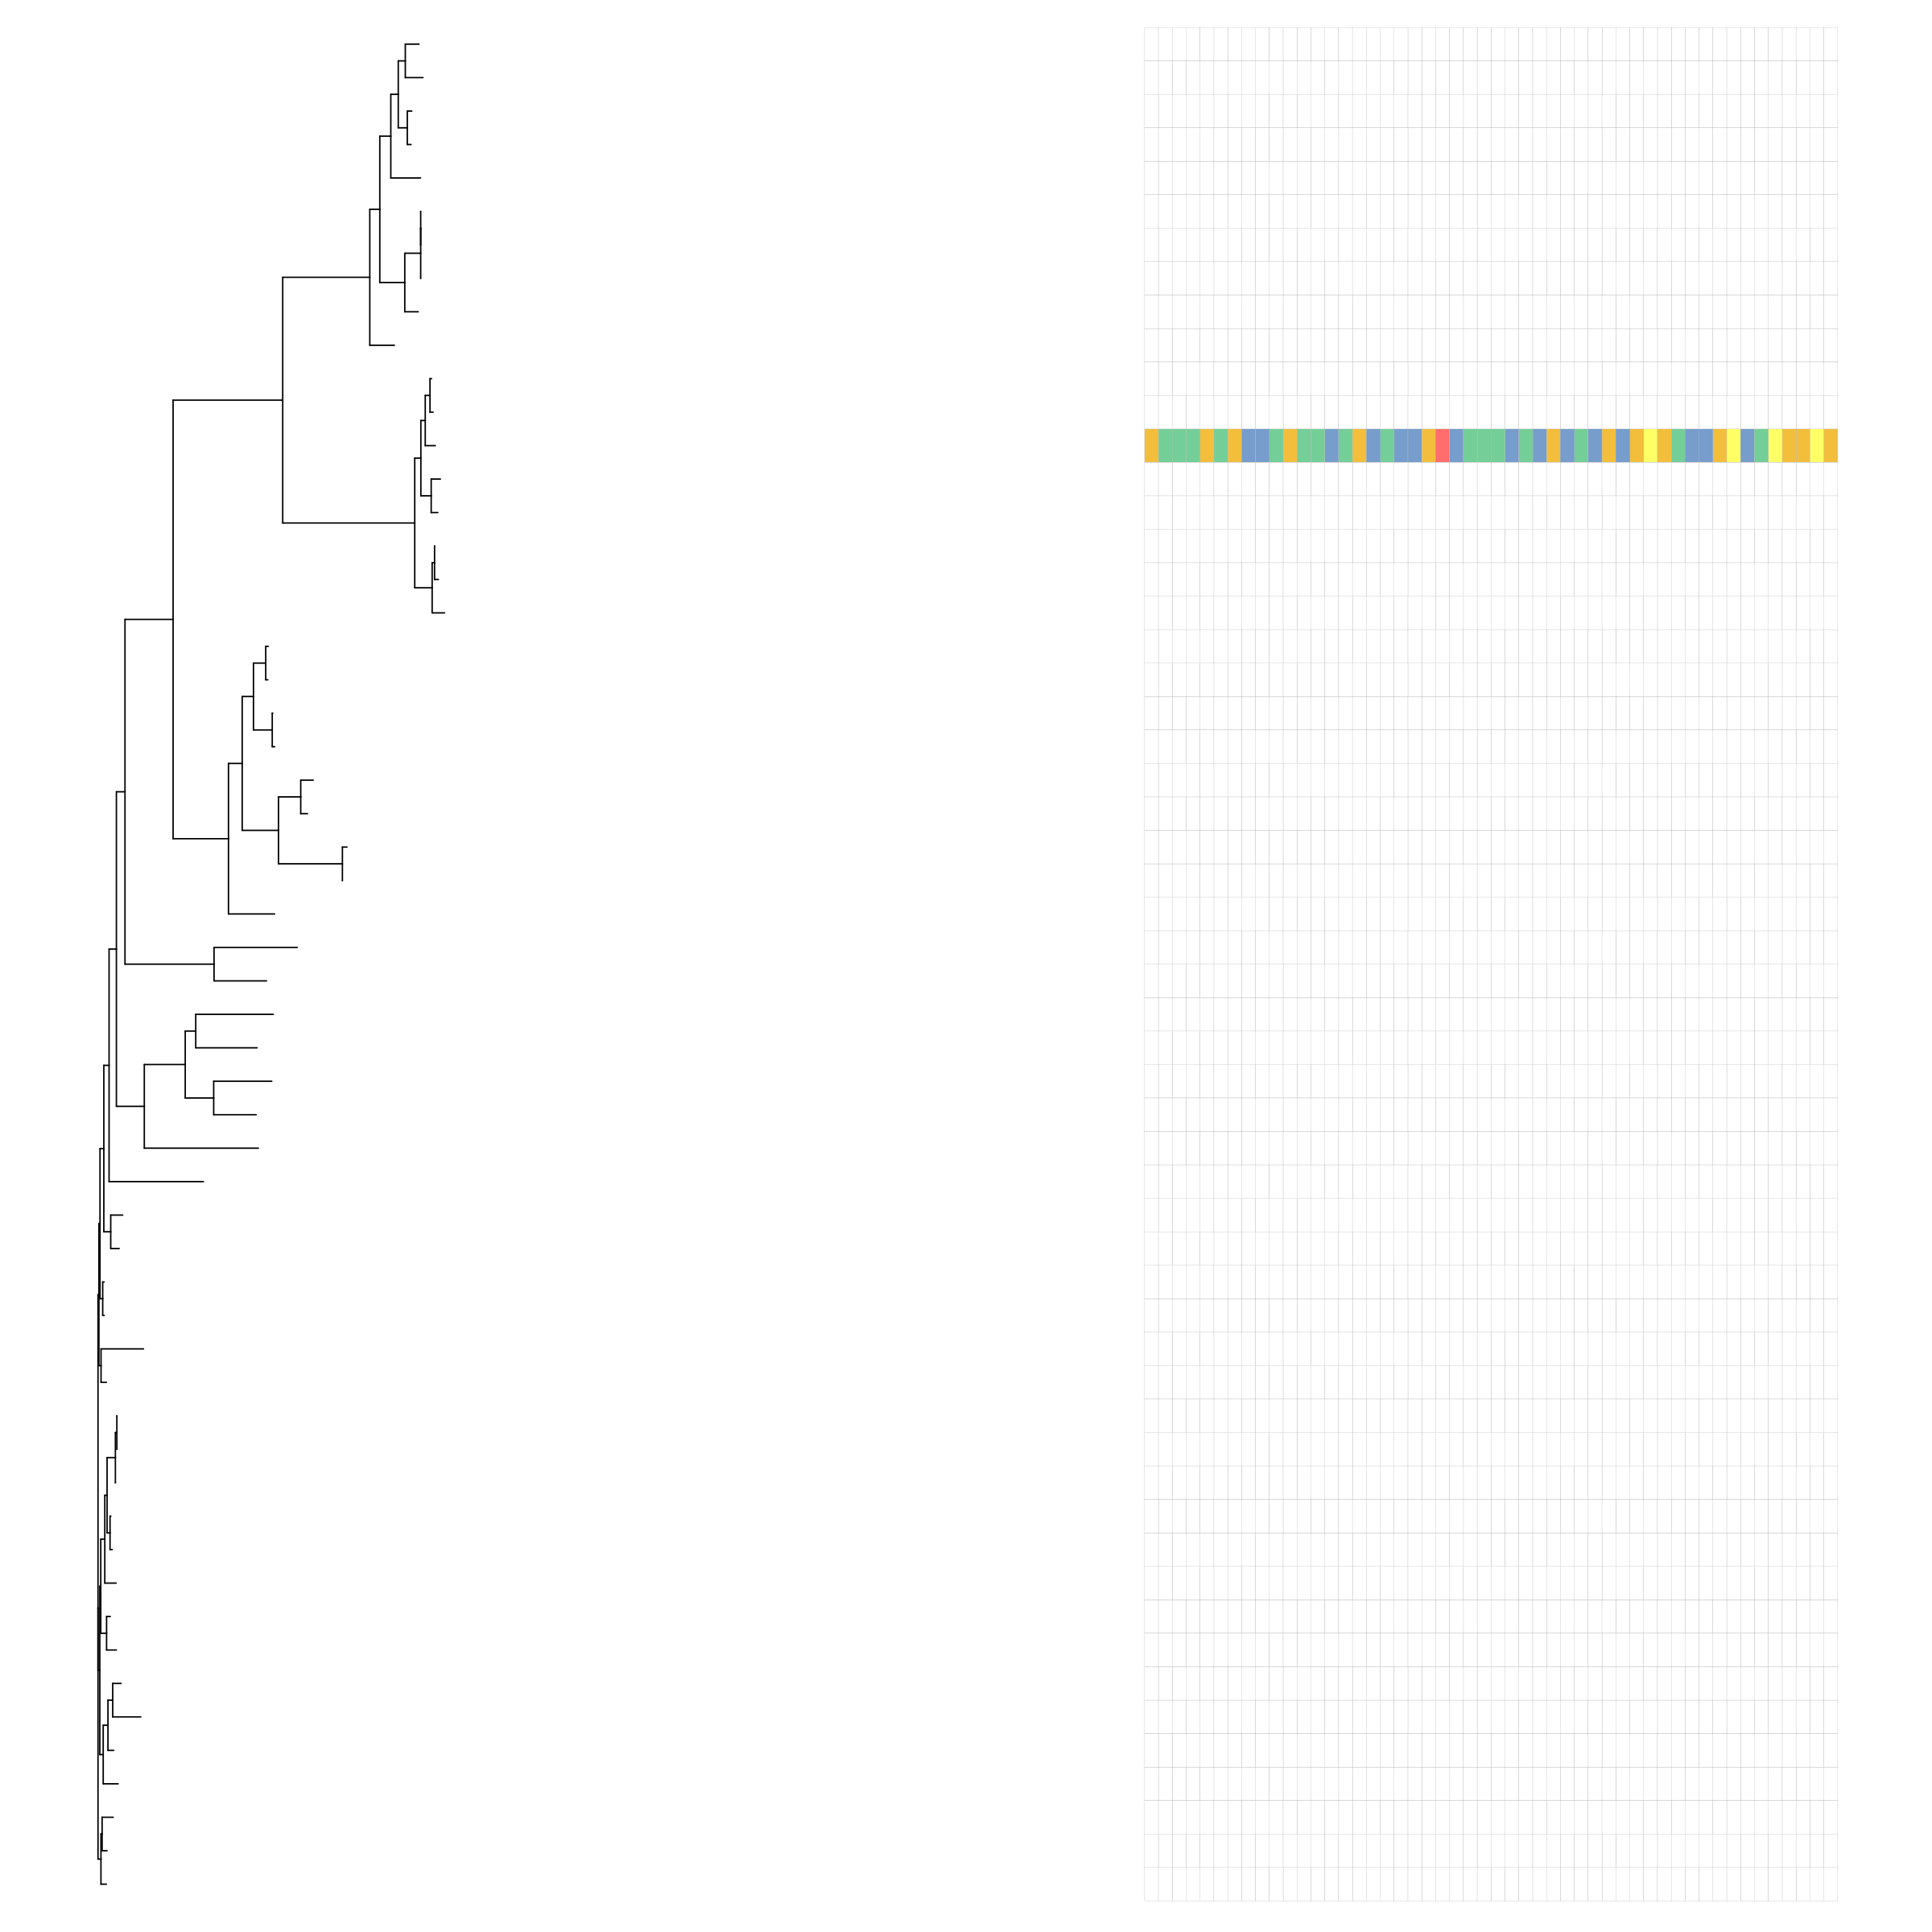

In [48]:
options(repr.plot.width=20, repr.plot.height=20)


x <- HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000314@msa

tree <- ggtree(HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000314@tree, layout = "rectangular")

#plot(tree)

data = tidy_msa(x, 1, 50)
head(data)

tree + geom_fruit(geom = geom_msa, data = tidy_msa(x, 1, 50),
                  font = NULL, color = "Chemistry_AA", offset = 2, pwidth = 2)

#tree + geom_facet(geom = geom_msa, data = data,  panel = 'msa',
#               font = NULL, color = "Chemistry_AA") #+
#    xlim_tree(1) +
#   geom_facet(geom = geom_text, data = data, panel = 'msa', mapping = aes(x = position, label = character))




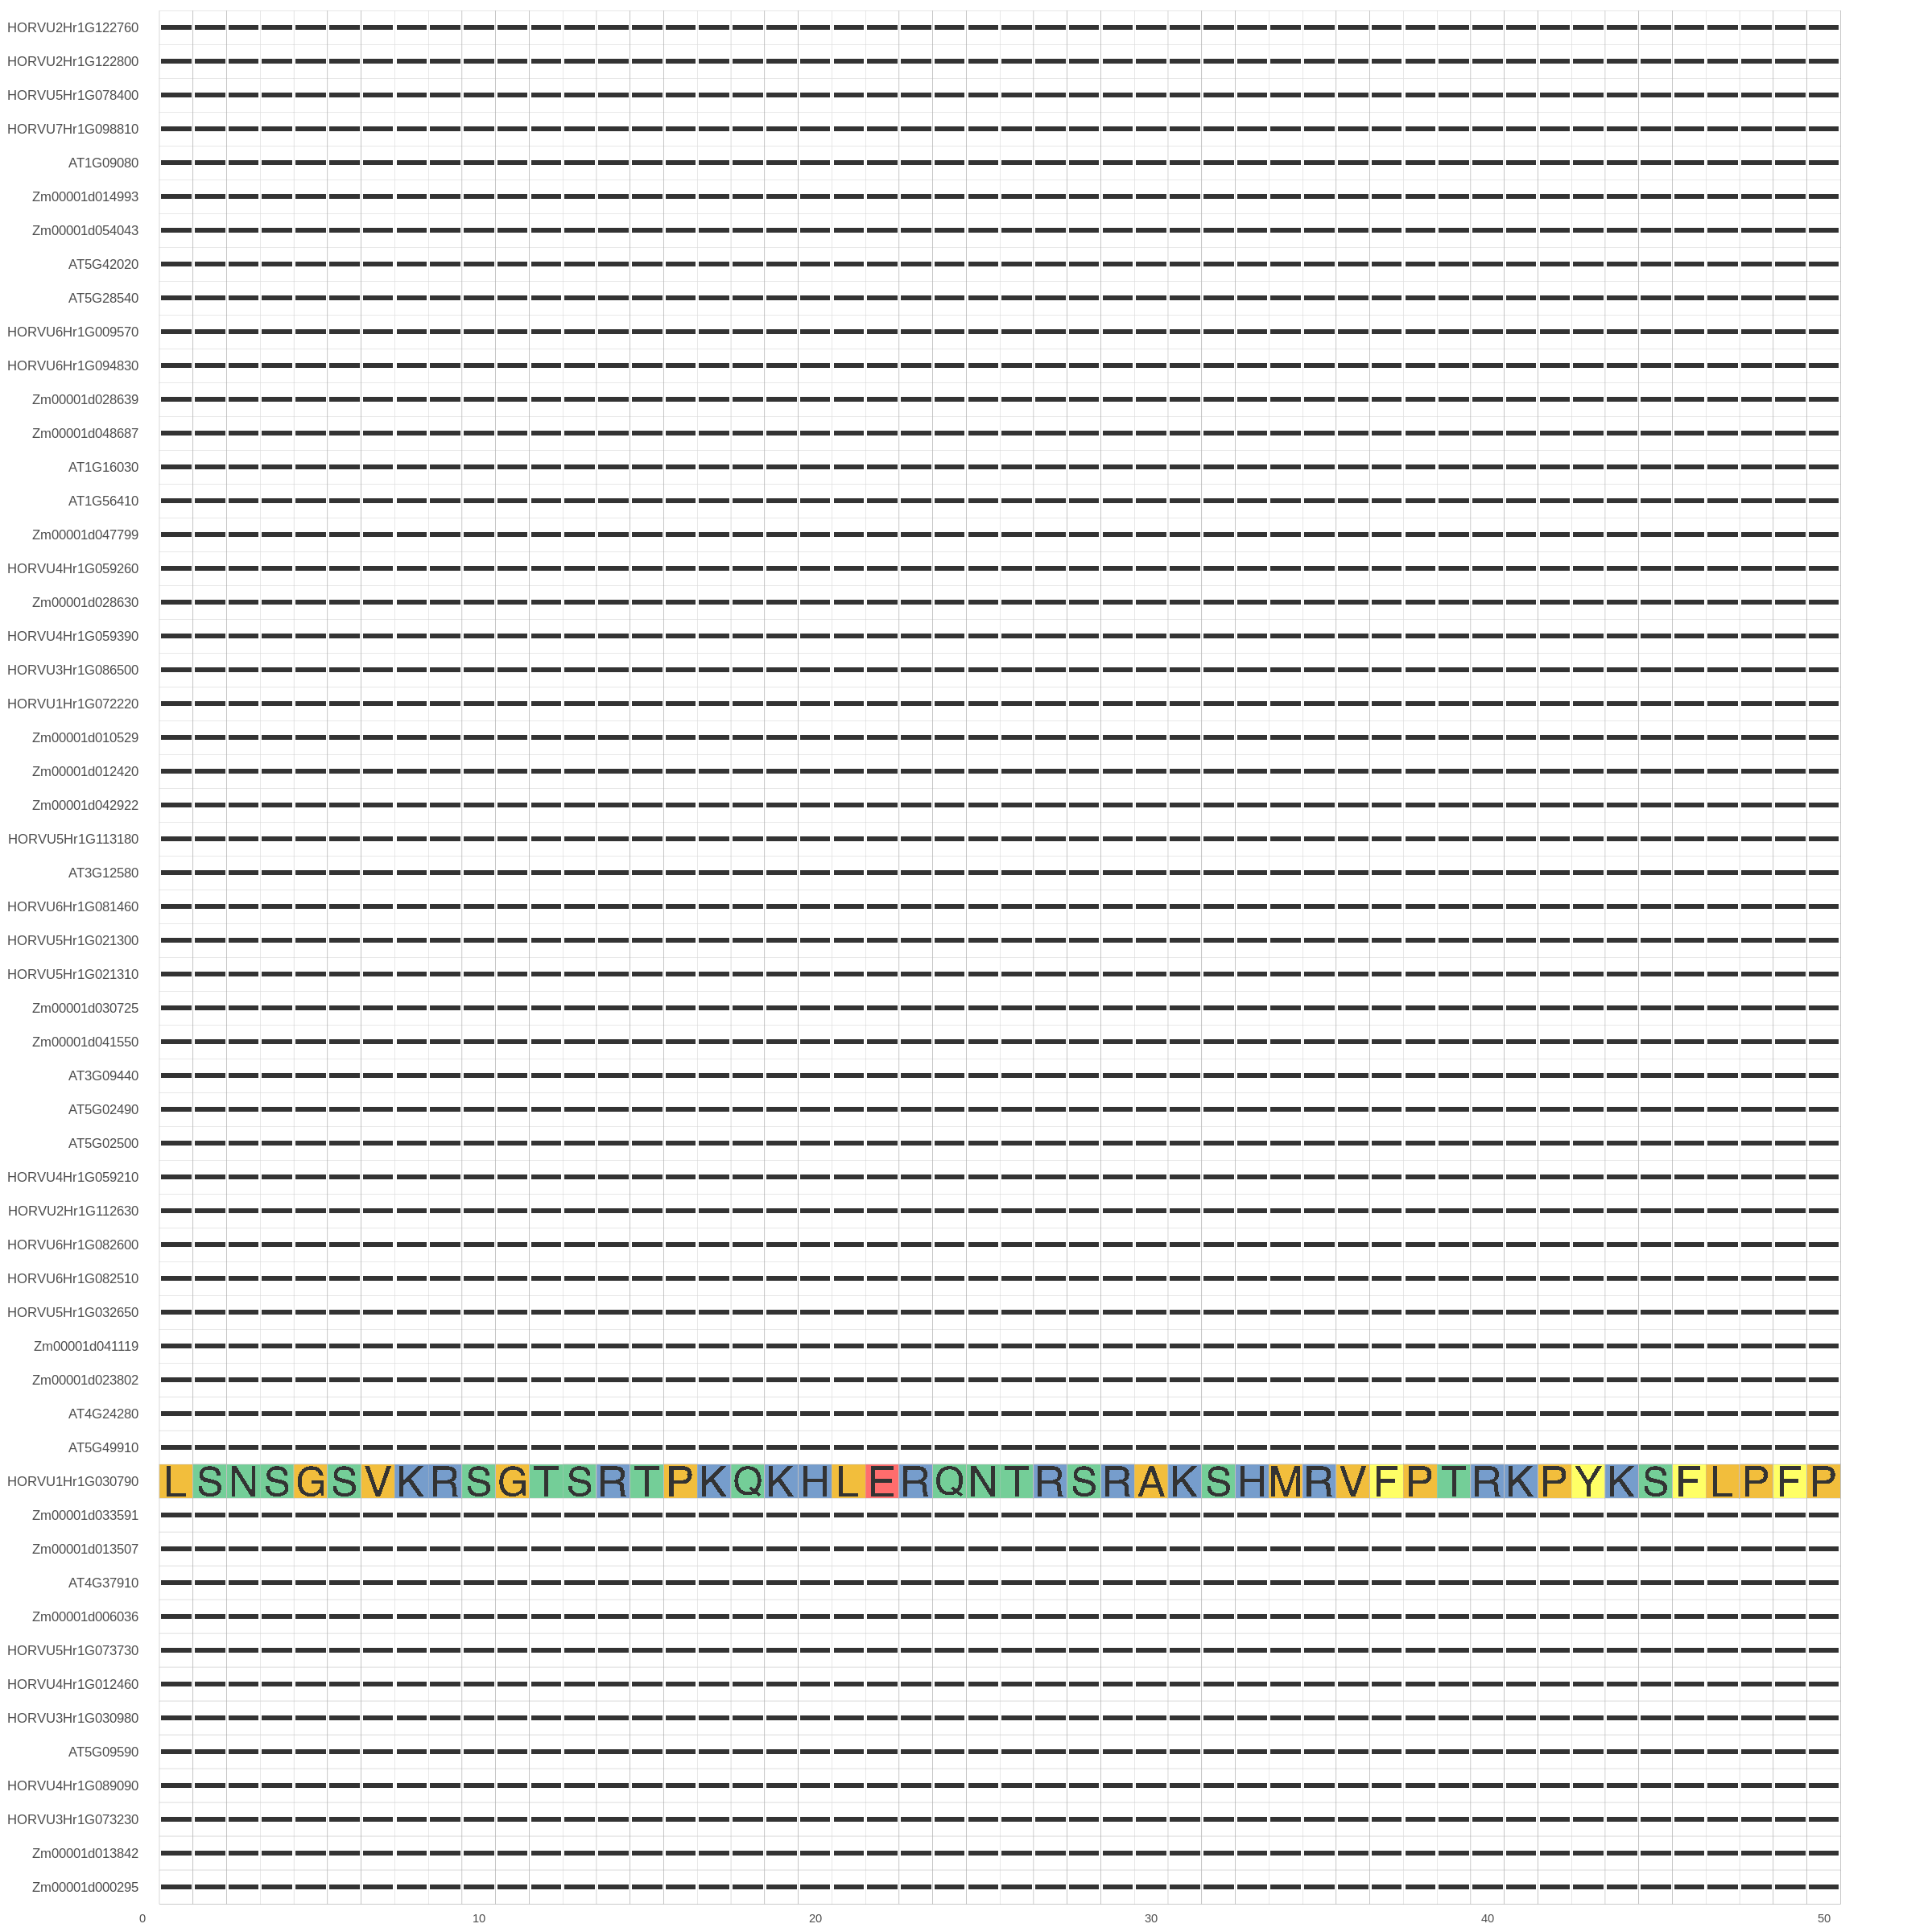

In [228]:
#ggmsa(x, 1, 200, color = "Clustal", seq_name = TRUE)
ggplot() + 
  geom_msa(data = tidy_msa(x, 1, 50), color = "Chemistry_AA", seq_name = TRUE) +
  theme(panel.border = element_blank(), 
        panel.background = element_blank(), 
        panel.grid.minor = element_blank(),
        axis.title=element_blank(),
        axis.text.y = element_text(margin = margin(l = 0, r = -50, t = 0, b = 0), size = 10),
        axis.ticks=element_blank()
       )

ERROR: Error in split.default(y, y$position): group length is 0 but data length > 0


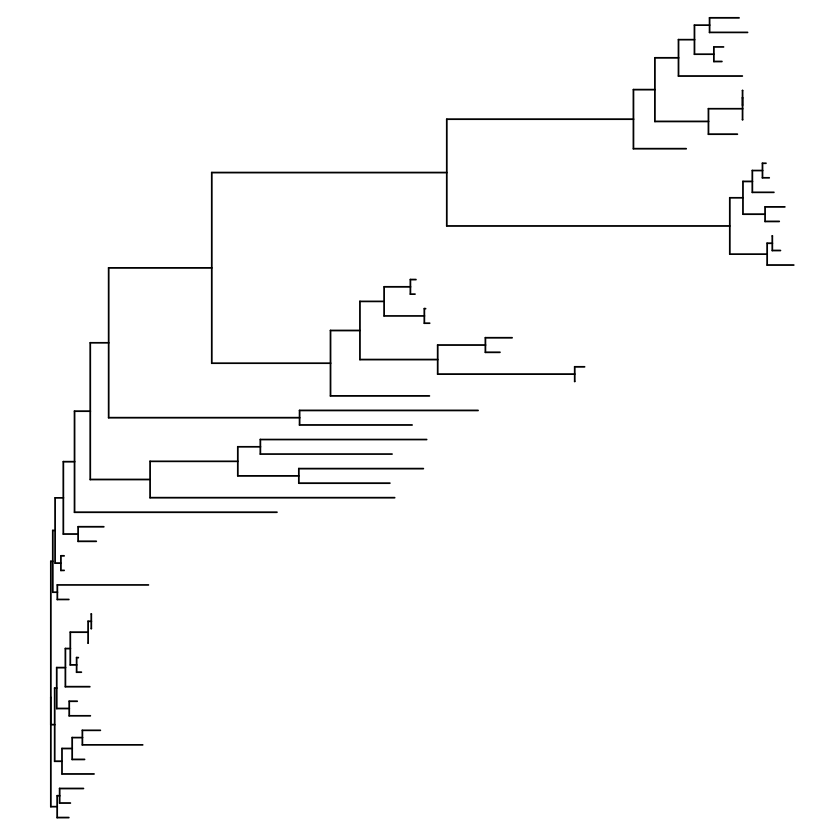

In [116]:
#msa plot ring
#load("A2TEA_finished.RData")

my_tree <- HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000314@tree

p <- ggtree(my_tree) #+
#  geom_tiplab(size=3, color="purple")
p




p +
geom_fruit(geom = geom_msa,
    data=sss,
    by_conservation=TRUE,
    sss, 
    start=100, 
    end=150,
    color = "Clustal", 
    font = "DroidSansMono", 
    char_width = 0.5, 
    seq_name = TRUE
  )


In [108]:
#install.packages("msaR")
library(msaR)

ape::read.FASTA(aaa)

Warning message in if (GZ) {:
“the condition has length > 1 and only the first element will be used”


ERROR: Error in file.info(..., extra_cols = FALSE): invalid filename argument


In [109]:
sss <- HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000314@fasta_files

writeXStringSet(sss, )

ERROR: Error in writeXStringSet(sss): 'x' must be an XStringSet object


In [107]:

aaa <- HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000314@msa

biostrings2fasta <- function(biostrings_in) {

  newnames <- paste0(">", names(biostrings_in))
  recs <- c(rbind(newnames, as.character(biostrings_in)))
  fasta <- paste(recs, collapse="\n")
  return(fasta)
}

sss <- biostrings2fasta(aaa)
sss

ape::read.FASTA(sss)

#newnames <- paste0(">", names(aaa))
#recs <- c(rbind(newnames, as.character(aaa)))
#paste(recs, collapse="\n")

#aln
#paste0(">", aln$nam, "\n", aln$seq, collapse="\n"))

[1] ">HORVU2Hr1G122760\n-------------------------------------------------------------------------------------------ATTMARGTTMLLGVVLAVLLLVAAPAPSAVAAEKE------K-GSG-----------NGGPVIGIDLGTTYSCVAVYR--NGRVEIIANDQGNRITPSWVAFTDSGERLIGEAAKNQAAANPLRT-VYDAKRLIGRNFVDAEVQRDMKLLPFKVV-DKNGKPHVEVEVKAGDVRTFSPEEVSAMVLTRMKETAEAYLGEKVRDAVITIPAYFNDAQRQATKDAGAIAGLNVVRLINEPTAAAIAYGLDKVADGK------ERNVLVFDLGG-----GTFDVSVLAL------DGGVFEVLATNGDTHLGGEDFDQRVMDHFIRLVKRKH-G--VDISGDARALGKLRRECERAKRALSTQLQVRVEIESLADGVD----LSEPLTRARFEELNADLFRKVMAPVKKAMADAGLAKGDIDEVVLVGGSTRIPKVQQLLRDYFGGKEPHKGVNPDEAVAYGAAVQGGIVRG-----DAKEVV--VLDVTPLTLGIETAGG-VMASVIPRNTPIPTKRTK----------MFTTYEDRQTTVTIMVFEGERSMTKDNRLLGKFDLTGIAPAPRGTPQI-EVTLEVDVNGILHVGAADKGTGRSEKIEISSAGRSISQEEIERMVQEAEEFAEEDRKLRDTVDARNKLEAYVYSARTTADG--ELGGKMDGGDREKVREAAREASEWLEAN-PDADKDDYTE----KLKELEDVCSPAFAAAY------------GNASGGHDDAGE-------------EDNDHDEL----------------\n>HORVU2Hr1G122800\n----------------------------------------------------------------------------------------------MARGTTMLLGVVLAVLLLAAAPAPSAVAAAKE------K-GSG-----------NGGPVIGIDLGTTYSCVAVYR--NGRVEIIANDQGNRITPSWVAFTDSGERLIGEAAKNQAAANPLRT-VYDAKRLIGRNFVDAEVQRDMKLLPFKVV-DKNGKPHVEVEVKAGDVRTFSPEEVSAMVLTRMKETAEAYLGEKVRDAVITIPAYFNDAQRQATKDAGAIAGLNVVRLINEPTAAAIAYGLDKVADGK------ERNVLVFDLGG-----GTFDVSVLAL------DGGVFEVLATNGDTHLGGEDFDQRVMDHFIRLVKRKH-G--VDISGDARALGKLRRECERAKRALSTQLQVRVEIESLADGVD----LSEPLTRARFEELNADLFRKVMAPVKKAMADAGLAKGDIDEVVLVGGSTRIPKVQQLLRDYFGGKEPHKGVNPDEAVAYGAAVQGGIVRG-----DAKEVV--VLDVTPLTLGIETAGG-VMASVIPRNTPIPTKRTK----------MFTTYEDRQTTVTIMVFEGERSMTKDNRLLGKFDLTGIAPAPRGTPQI-EVTLEVDVNGILHVGAADKGTGRSEKIEISSAGRSISQEEIERMVQEAEEFAEEDRKLRDTVDARNKLEAYVYSARTTADG--ELGGKMDGGDREKVREAAREASEWLEAN-PDADKDDYTGGGGWRMSAAPPSPLPMGTPA------V-VM---TTPARRTTTTTS-------------------------------------\n>HORVU5Hr1G078400\n--------------------------------------------------------------------------------------SKTNQSIEMARAPTWVFAMLVAVAALLLAMPAASAAPTGG------D-DTG-----------T---VIGIDLGTTYSCVGVYR--NGRVEIIANDQGNRITPSWVAFADGGERLIGEAAKNQAAANPERT-IYDAKRLIGRDFDDAVVQRDIKLLPYSVV-DRKGKPHIQVRVKDGDVRVFSPEEVSAMVLTRMKETAEAYLGEKVTHAVVTVPAYFNDAQRQATKDAGVIAGLNVLRIVNEPTAAAIAYGIDEKGP--------EKNVLVFDLGG-----GTFDVSVLSI------DNGVFEVLATNGDTHLGGDDFDQRLMDYFIKLIKRKH-G--RDITGDLRALGKLRRECERAKRALSNQHQVRVEIESLFDGVD----FSEPLTRARFEELNNDLFRKTMVPVKKAMADAGLSKADIDEIVLVGGSTRIPKVQQLLKDYFNGKEPNKGVNPDEAVAYGAAVQASIVSGHVDE-NTKKMI--LLDVAPLTLGLETVGG-VMTKLIPRNTVVPTKKTQ----------VFTTYQDKQTTVSIMVYEGERSMTKDNRLLGKFELSGIPPAPRGTPQI-EVTFEVDVNGILHVKAADKGTGKSEKITITNEDGRHSQEEIDRMVREAEEFVEEDRKVKERVDARNKLETYVYDIKNTVDG--KMADAMERDDKEKVQDAVREVNEWLDDN-REAEKEDYDG----KLQELEDVCNPVITAMYQ-----------RSGGAPDDNNTE--------------EDDHDEL----------------\n>HORVU7Hr1G098810\n---------------------------------------------------------------------------------------KFRSTMARVASTWMLATLLAALLLLLATPAGSAAAPAEG------G-STG-----------T---VIGIDLGTTYSCVGVYR--NGRVEIIANDQGNRITPSWVAFTDGGERLIGEAAKNQAAANPERT-IYDAKRLIGRDFADAVVQRDIKLLPYSVV-DRNGKPHIQVQVKDGDVRVFSPEEVSAMVLTRMKETAEAYLGEKVTHAVVTVPAYFNDAQRQATKDAGVIAGLNVIRIVNEPTAAAIAYGIDEKGP--------EKNVLVFDLGG-----GTFDVSVLSI------DNGVFEVLATNGDTHLGGEDFDQRLMDYFIKLIKRKH-A--RDITGDLRALGKLRRECERAKRALSNQHQVRVEIESLFDGVD----LSEPLTRARFEELNNDLFRKTMVPVKKAMADAGLNKADIDEIVLVGGSTRIPKVQQLLKDYFNGKEPNKGVNPDEAVAYGAAVQASIVSGHVDE-NTKTMI--LIDVAPLTLGMETVGG-VMTKLIPRNTVVPTKKTQ----------VFTTYQDKQTTVSIKVYEGERSMTKDNRLLGKFDLSGIPPAPRGTPQI-EVTFEVDVNGILHVKAADKGTGKSEKITITNEGRRHSQEDIDRMVREAEEFAEADLKVKERVDARNKLESYVYGIKDTVDG--KMADAMDKDEKNKVEDAMREVNEWLDDNAEAADKEDYDE----KLRELEDVCNPIITAVYQ-----------RSGGAPDDHTAE-------------EDYDHDEL----------------\n>AT1G09080\n--------------------------------------------------------------------------------MIFIKENTAKMTRNKAIACLVFLTVLDFLMNIGAALMSSLAIEGEE------Q-KLG-----------T---VIGIDLGTTYSCVGVYH--NKHVEIIANDQGNRITPSWVAFTD-TERLIGEAAKNQAAKNPERT-IFDPKRLIGRKFDDPDVQRDIKFLPYKVV-NKDGKPYIQVKVK-GEEKLFSPEEISAMILTKMKETAEAFLGKKIKDAVITVPAYFNDAQRQATKDAGAIAGLNVVRIINEPTGAAIAYGLDKKGG--------ESNILVYDLGG-----GTFDVSILTI------DNGVFEVLSTSGDTHLGGEDFDHRVMDYFIKL

Warning message in file(con, "rb"):
“cannot open file '>HORVU2Hr1G122760
-------------------------------------------------------------------------------------------ATTMARGTTMLLGVVLAVLLLVAAPAPSAVAAEKE------K-GSG-----------NGGPVIGIDLGTTYSCVAVYR--NGRVEIIANDQGNRITPSWVAFTDSGERLIGEAAKNQAAANPLRT-VYDAKRLIGRNFVDAEVQRDMKLLPFKVV-DKNGKPHVEVEVKAGDVRTFSPEEVSAMVLTRMKETAEAYLGEKVRDAVITIPAYFNDAQRQATKDAGAIAGLNVVRLINEPTAAAIAYGLDKVADGK------ERNVLVFDLGG-----GTFDVSVLAL------DGGVFEVLATNGDTHLGGEDFDQRVMDHFIRLVKRKH-G--VDISGDARALGKLRRECERAKRALSTQLQVRVEIESLADGVD----LSEPLTRARFEELNADLFRKVMAPVKKAMADAGLAKGDIDEVVLVGGSTRIPKVQQLLRDYFGGKEPHKGVNPDEAVAYGAAVQGGIVRG-----DAKEVV--VLDVTPLTLGIETAGG-VMASVIPRNTPIPTKRTK----------MFTTYEDRQTTVTIMVFEGERSMTKDNRLLGKFDLTGIAPAPRGTPQI-EVTLEVDVNGILHVGAADKGTGRSEKIEISSAGRSISQEEIERMVQEAEEFAEEDRKLRDTVDARNKLEAYVYSARTTADG--ELGGKMDGGDREKVREAAREASEWLEAN-PDADKDDYTE----KLKELEDVCSPAFAAAY------------GNASGGHDDAGE-------------EDNDHDEL----------------
>HORVU2Hr1G122800
-------------------------------------

ERROR: Error in file(con, "rb"): cannot open the connection


In [40]:
install.packages("TDbook")
library(TDbook)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



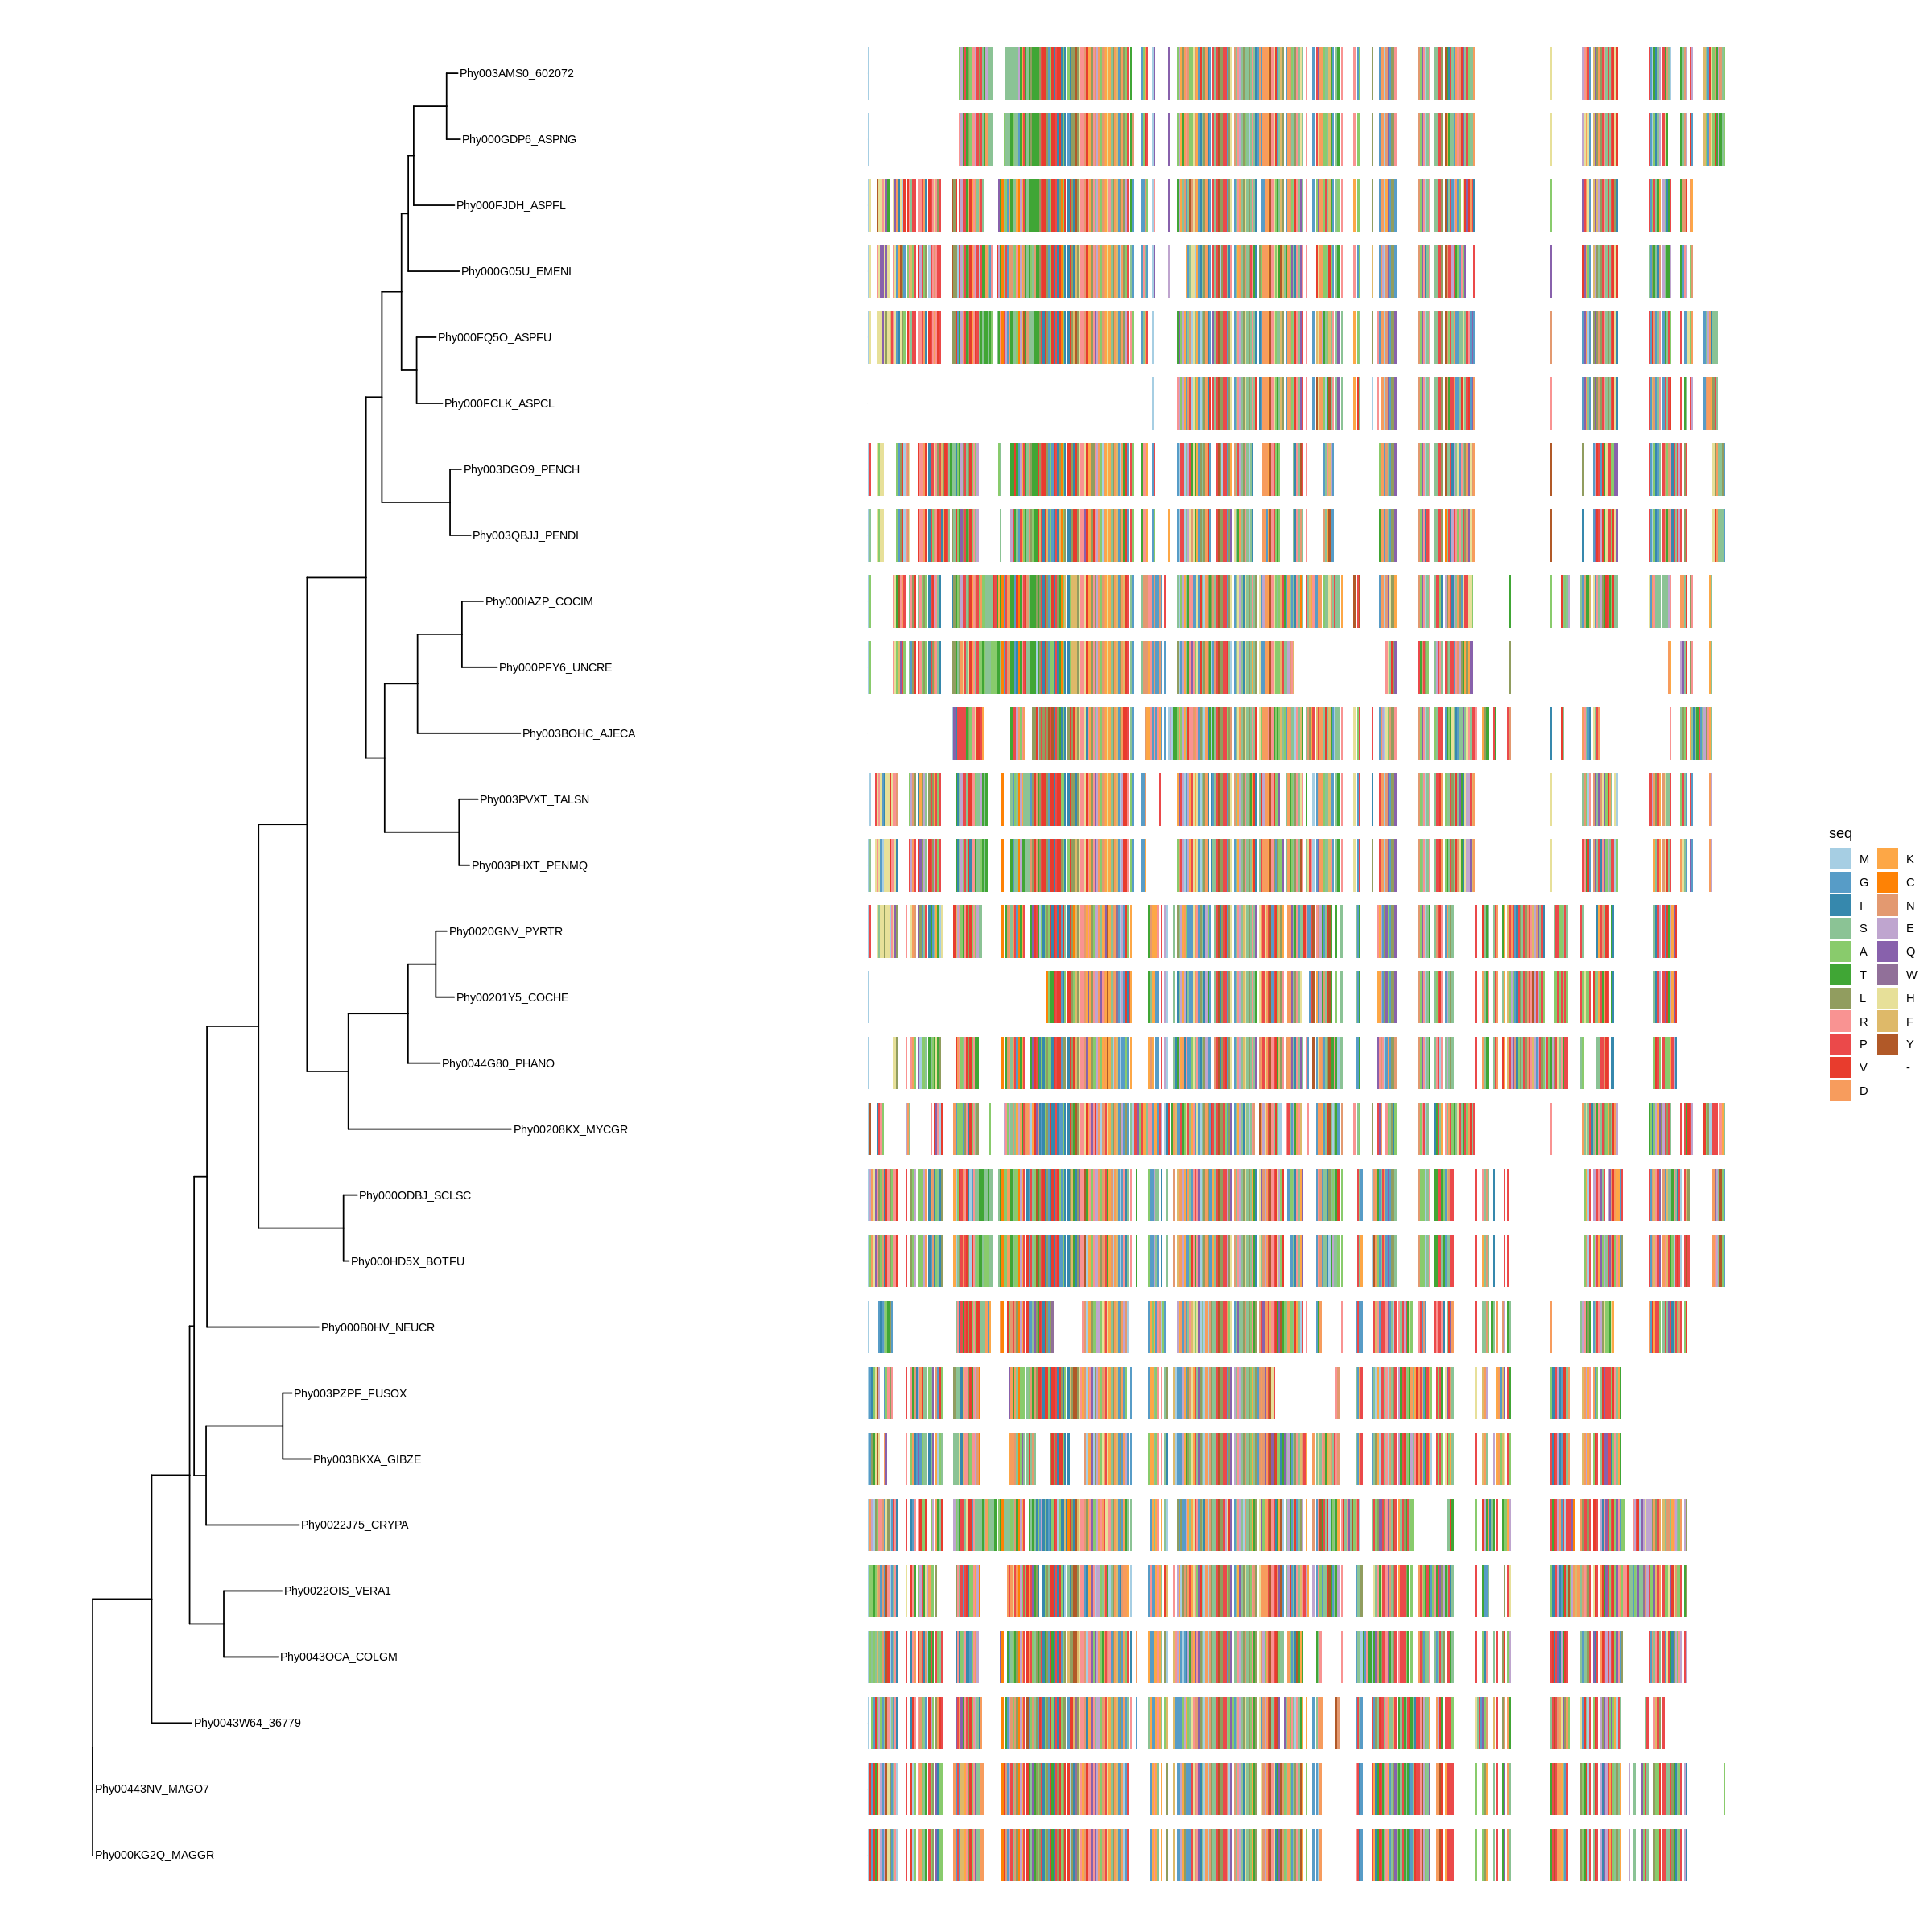

In [41]:
# load `tree_seq_nwk` and `AA_sequence` from 'TDbook'
p <- ggtree(tree_seq_nwk) + geom_tiplab(size=3)
msaplot(p, AA_sequence, offset=3, width=2)


#p <- ggtree(tree_seq_nwk, layout='circular') + 
#    geom_tiplab(offset=4, align=TRUE) + xlim(NA, 12)
#msaplot(p, AA_sequence, window=c(120, 200))

In [103]:
str(AA_sequence)

List of 28
 $ Phy000B0HV_NEUCR : raw [1:480] 4d 2d 2d 2d ...
 $ Phy000FCLK_ASPCL : raw [1:480] 2d 2d 2d 2d ...
 $ Phy000FJDH_ASPFL : raw [1:480] 4d 48 2d 2d ...
 $ Phy000FQ5O_ASPFU : raw [1:480] 4d 48 2d 2d ...
 $ Phy000G05U_EMENI : raw [1:480] 4d 48 2d 2d ...
 $ Phy000GDP6_ASPNG : raw [1:480] 4d 2d 2d 2d ...
 $ Phy000HD5X_BOTFU : raw [1:480] 4d 41 44 48 ...
 $ Phy000IAZP_COCIM : raw [1:480] 4d 41 2d 2d ...
 $ Phy000KG2Q_MAGGR : raw [1:480] 4d 56 47 56 ...
 $ Phy000ODBJ_SCLSC : raw [1:480] 4d 45 44 48 ...
 $ Phy000PFY6_UNCRE : raw [1:480] 4d 41 2d 2d ...
 $ Phy00201Y5_COCHE : raw [1:480] 4d 2d 2d 2d ...
 $ Phy00208KX_MYCGR : raw [1:480] 4d 59 2d 2d ...
 $ Phy0020GNV_PYRTR : raw [1:480] 4d 50 2d 2d ...
 $ Phy0022J75_CRYPA : raw [1:480] 4d 44 45 4d ...
 $ Phy0022OIS_VERA1 : raw [1:480] 4d 41 41 54 ...
 $ Phy003AMS0_602072: raw [1:480] 4d 2d 2d 2d ...
 $ Phy003BKXA_GIBZE : raw [1:480] 4d 47 4c 54 ...
 $ Phy003BOHC_AJECA : raw [1:480] 2d 2d 2d 2d ...
 $ Phy003DGO9_PENCH : raw [1:480] 4d 50

In [21]:
pretty.default(10, nbreak_setting)

[1]  0 10

In [ ]:
?pretty

### Highlighting with groupOTU?
- to mark elements in the plot?
- get from tiplabels to node numbers?
- perhaps it is easier to just overlay the text/labels with color blocks?

In [22]:
#head(HOG_DE.a2tea)
my_tree$tip.label
# access to all ids for each tip label ;D - as_tibble
#groupOTU(my_tree, "Zm00001d013553", group_name = "my_tree_HOG_genes") %>% as_tibble

[1] "HORVU1Hr1G072220" "Zm00001d010529"   "AT3G12580"        "HORVU3Hr1G086500"
 [5] "AT1G16030"        "Zm00001d012420"   "Zm00001d042922"   "Zm00001d047799"  
 [9] "HORVU4Hr1G059260" "Zm00001d048687"   "HORVU6Hr1G009570" "HORVU6Hr1G094830"
[13] "HORVU5Hr1G032650" "Zm00001d041119"   "Zm00001d023802"   "AT4G24280"       
[17] "AT5G49910"        "HORVU1Hr1G030790" "Zm00001d033591"   "Zm00001d013507"  
[21] "AT4G37910"        "Zm00001d006036"   "HORVU5Hr1G073730" "HORVU4Hr1G012460"
[25] "HORVU3Hr1G030980" "AT5G09590"        "Zm00001d013842"   "Zm00001d000295"  
[29] "HORVU4Hr1G089090" "HORVU3Hr1G073230" "AT1G09080"        "HORVU2Hr1G122760"
[33] "HORVU2Hr1G122800" "HORVU5Hr1G078400" "HORVU7Hr1G098810" "AT5G42020"       
[37] "AT5G28540"        "Zm00001d014993"   "Zm00001d054043"   "Zm00001d028639"  
[41] "HORVU6Hr1G082600" "HORVU6Hr1G082510" "HORVU2Hr1G112630" "HORVU4Hr1G059210"
[45] "AT3G09440"        "AT5G02500"        "AT1G56410"        "AT5G02490"       
[49] "HORVU5Hr1G113180" "HORVU6Hr1G081460" "HORVU5Hr1G021300" "HORVU5Hr1G021310"
[53] "Zm00001d030725"   "Zm00001d041550"   "Zm00001d028630"   "HORVU4Hr1G059390"

### MSA fun

In [42]:
options(repr.plot.width=20, repr.plot.height=20)
options(warn = 2)

load(file = "A2TEA_finished.RData")
#validObject(HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000207@tree)

a <- HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000207@blast_table$qseqid_name
# second: get number of genes in HOG
b <- HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000207@num_genes_HOG
# third: get first n unique elements of vector = all genes in HOG 
#unique(a)[1:b]

#available_msa()
#HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000234@fasta_files[[1]][1]
# protein_sequences <- system.file("extdata", "sample.fasta", package = "ggmsa")
#ggmsa(protein_sequences, 300, 350, color = "Clustal", font = "DroidSansMono", char_width = 0.5, seq_name = T )



my_msa <- HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000207@msa
head(my_msa)

#my_msa[1:10]

my_msa_2 <- tidy_msa(my_msa, 1, 50)
head(my_msa_2)

#my_tidy_msa <- tidy_msa(my_msa, start = NULL, end = NULL)

#filt_vec <- as_vector(HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0005781@genes_HOG)
#filt_vec

#my_msa[filt_vec]


ggmsa(my_msa_2, 1, 50)


#ggmsa(msa = my_msa_2#, 
#    start=1, 
#    end=50#,
#    by_conservation=TRUE#, 
#    color = "Clustal", 
#    font = "DroidSansMono", 
#    char_width = 0.5, 
#    seq_name = TRUE
#     ) #+ 
#    theme(plot.margin=margin(1, 1, 1, 1))
#theme(plot.margin = unit(c(100,1,1,1), "cm")) + 
#geom_msaBar() 

AAStringSet object of length 6:
    width seq                                               names               
[1]   772 -----------------------...DGIHFVDHEAVL----------- HORVU2Hr1G007260
[2]   772 -----------------------...DGIHVVP---------------- HORVU2Hr1G007230
[3]   772 -----------------------...YVNVVPV---------------- Zm00001d004305
[4]   772 -----------------------...HIHLVPI---------------- Zm00001d004306
[5]   772 -----------------------...HINLVPI---------------- Zm00001d004308
[6]   772 -----------------------...VADVSKDDKMPVSSTEWQSSMHA Zm00001d011498

name             position character
1 HORVU2Hr1G007260 1        -        
2 HORVU2Hr1G007230 1        -        
3 Zm00001d004305   1        -        
4 Zm00001d004306   1        -        
5 Zm00001d004308   1        -        
6 Zm00001d011498   1        -

ERROR: Error in prepare_msa(msa): multiple sequence alignment object no supported...


In [37]:
#can subset AA object by name vector
#my_msa

sub <- c("HORVU2Hr1G007260", "Zm00001d004305")

length(my_msa)

my_msa[1:(length(my_msa)-10)]


#my_msa[:-10]

#my_msa[(my_msa@ranges@NAMES - sub)]

[1] 55

AAStringSet object of length 45:
     width seq                                              names               
 [1]   772 -----------------------...GIHFVDHEAVL----------- HORVU2Hr1G007260
 [2]   772 -----------------------...GIHVVP---------------- HORVU2Hr1G007230
 [3]   772 -----------------------...VNVVPV---------------- Zm00001d004305
 [4]   772 -----------------------...IHLVPI---------------- Zm00001d004306
 [5]   772 -----------------------...INLVPI---------------- Zm00001d004308
 ...   ... ...
[41]   772 -----------------------...---------------------- AT1G08930
[42]   772 -----------------------...---------------------- AT3G05150
[43]   772 -----------------------...---------------------- AT1G54730
[44]   772 -----------------------...NNMEGLLEQGSQS--------- AT2G43330
[45]   772 -----------------------...GTAAAP---------------- Zm00001d025749

### Plotting trees with logFold change info and further annotation, e.g. sig. star symbol

In [25]:
#test tree is:
my_tree <- HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000207@tree
#my_tree
my_tree_genes <- as_vector(HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000207@genes)


           
#head(HOG_DE.a2tea)
# my_tree_genes OR my_tree$tip.label 
tree_dge <- HOG_DE.a2tea %>%
  filter(gene %in% my_tree$tip.label) %>%
  replace_na(list(log2FoldChange = 0))
  
tree_dge_only_sig <- HOG_DE.a2tea %>%
  filter(gene %in% my_tree$tip.label) %>%
  filter(significant == "yes")

#tree_dge

#get max pos/neg log fold change - for automatic breaks in y-axis scale
max_lfc <- tree_dge %>% 
  mutate(arr = abs(log2FoldChange)) %>% #get absolute log2FoldChange
  arrange(desc(arr)) %>% #arrange according to decreasing absolute log2FoldChanges
  slice_head(n = 1) %>%
  pull(arr) %>% floor() 

str(max_lfc)

#if (max_lfc < 5) {
#    max_lfc <- max_lfc + 1
#}
#if (max_lfc > 10) {
#    max_lfc <- max_lfc - 1
#}
str(max_lfc)

ttt <- 4

#tree_dge
#tree_dge_only_sig

p <- ggtree(tr = my_tree, layout = "circular", branch.length = "none", #open.angle=angle  
) + geom_tiplab() +



geom_fruit(data = tree_dge,
                               geom = geom_bar, 
                               mapping = aes(
                                           y=gene,
                                           x=log2FoldChange,
                                          ),
                               fill="navy",
                               colour = "navy",
                               alpha=.7,
                               orientation="y",
                               stat="identity",
                               offset = 0.8,
                               pwidth = 0.3,
                               #axis parameters
                               axis.params =
                                 list(
                                   axis = "x", 
                                   text.size = 3, 
                                   # nbreak - variable or function accepted here?
                                   nbreak = 3, 
                                   line.size = 0.5, 
                                   line.color = "black"
                                 ),
                               grid.params =
                                 list(
                                   size = 0.5, #color = "navy"
                                 )
                              )
#p
p <- geom_fruit(data=tree_dge_only_sig,
                                geom=geom_star,
                                mapping=aes(y=gene, fill=significant),
                                size=5,
                                starstroke=0,
                                starshape = 9,
                                offset = 0.01,
                                #pwidth = 0
                                 ) + 
           # controlling the main color of the sig. star layer here with scale_fill_manual()
           scale_fill_manual(values="orange")


#library(plotly)
#plotly::ggplotly(p)

 num 3
 num 3


NULL

In [26]:
ttt <- 5

eval(expr(ttt))

pretty.default(1:15, n = eval(ttt))   # 0  5 10 15

[1] 5

[1]  0  2  4  6  8 10 12 14 16

In [ ]:
?pretty
#?geom_fruit
#?geom_star
#?geom_bar

In [27]:
tr <- rtree(100)
dd = data.frame(id=tr$tip.label, value=abs(rnorm(100)))
dt = data.frame(id=tr$tip.label, group=c(rep("A",50),rep("B",50)))
p <- ggtree(tr, layout="circular") 

ttt <- 6
tt <- "4"

ttt - tt

class(tt)
class(4)

print(tt)
dput(4)

p <- p + 
      geom_fruit(
          data=dt,
          geom=geom_star,
          mapping=aes(y=id, fill=group),
          size=2.5,
          starstroke=0
      )

p + geom_fruit(
           data=dd,
           geom=geom_bar,
           mapping=aes(x=value, y=id),
           orientation="y",
           stat="identity",
           axis.params =
                                 list(
                                   axis = "x", 
                                   text.size = 3, 
                                   nbreak = tt, 
                                   line.size = 0.5, 
                                   line.color = "black"
                                 ),
      grid.params =
                                 list(
                                   size = 0.5, #color = "navy"
                                 )
      )



ERROR: Error in ttt - tt: non-numeric argument to binary operator


## UpSetR playaround

#### switching to purrr::map_at instead of looping since I got a deprecation warning

In [28]:
options(warn = 2)
load(file = "A2TEA_finished.RData")


workset <- HOG_level_list[[1]] %>% 
                 select(HOG, ends_with("_total"))
species_num <- ncol(workset) - 1
# change 0 to NAs since we can more easily filter on that
#is.na(workset) <- workset==0
# remove '_total' from column names
#str_remove(colnames(workset), "_total")
workset <- workset %>% setNames(names(workset) %>% stringr::str_replace("_total",""))

# a vector with all species names
species_vec <- names(workset %>% select(-HOG))

# using map_at from purrr
# we perform the operation for all columns in species_vec
# filter/only keep HOG "rows" per species if species possesses at least 1 gene inside the HOG
# with purrr::list_modify("HOG" = NULL) the untouched pure HOG column (now a list) is removed
genotypeList <- workset %>% purrr::map_at(species_vec, 
                      ~filter(workset, .!= 0) %>% 
                        select(HOG) %>% 
                        as_vector() %>%
                        unname()
                     ) %>% purrr::list_modify("HOG" = NULL)
str(genotypeList)     

#genotypeList <- list()
#    for (j in 1:species_num) {
#      assign(paste0("Genotype", j), as.vector(simplify_all(workset[!is.na(workset[j+1]),"HOG"])[[1]]))
#      subList <- list(get(paste0("Genotype", j)))
#      names(subList) <- colnames(workset)[j+1]
#      genotypeList <- c(genotypeList, subList)
#    }
    # return genotypeList
#    str(genotypeList)

List of 3
 $ Arabidopsis_thaliana: chr [1:12767] "N0.HOG0000236" "N0.HOG0000863" "N0.HOG0000885" "N0.HOG0000887" ...
 $ Zea_mays            : chr [1:17218] "N0.HOG0000236" "N0.HOG0000863" "N0.HOG0000885" "N0.HOG0000887" ...
 $ Hordeum_vulgare     : chr [1:16258] "N0.HOG0000236" "N0.HOG0000863" "N0.HOG0000885" "N0.HOG0000887" ...


In [29]:
workset <- HOG_level_list[[1]] %>% 
                 select(HOG, ends_with("_total")) 
    # add this point we can easily compute the number of species/ecotypes etc. 
    # #species = (columns of current workset - 1) 
    species_num <- ncol(workset) - 1
    # change 0 to NAs since we can more easily filter on that
    is.na(workset) <- workset==0
    # remove '_total' from column names
    #str_remove(colnames(workset), "_total")
    workset <- workset %>% setNames(names(workset) %>% stringr::str_replace("_total",""))
    
    genotypeList <- list()
    for (j in 1:species_num) {
      assign(paste0("Genotype", j), as.vector(simplify_all(workset[!is.na(workset[j+1]),"HOG"])[[1]]))
      subList <- list(get(paste0("Genotype", j)))
      names(subList) <- colnames(workset)[j+1]
      genotypeList <- c(genotypeList, subList)
    }
    # return genotypeList
    genotypeList




$Arabidopsis_thaliana
    [1] "N0.HOG0000236" "N0.HOG0000863" "N0.HOG0000885" "N0.HOG0000887"
    [5] "N0.HOG0000913" "N0.HOG0000952" "N0.HOG0000318" "N0.HOG0000380"
    [9] "N0.HOG0000550" "N0.HOG0001140" "N0.HOG0001166" "N0.HOG0001196"
   [13] "N0.HOG0001237" "N0.HOG0000909" "N0.HOG0000940" "N0.HOG0000234"
   [17] "N0.HOG0000697" "N0.HOG0000312" "N0.HOG0000573" "N0.HOG0000589"
   [21] "N0.HOG0001144" "N0.HOG0000207" "N0.HOG0000379" "N0.HOG0000595"
   [25] "N0.HOG0000866" "N0.HOG0000954" "N0.HOG0001188" "N0.HOG0001194"
   [29] "N0.HOG0001289" "N0.HOG0001484" "N0.HOG0001489" "N0.HOG0001556"
   [33] "N0.HOG0001672" "N0.HOG0001768" "N0.HOG0004285" "N0.HOG0004287"
   [37] "N0.HOG0004307" "N0.HOG0004310" "N0.HOG0004313" "N0.HOG0004314"
   [41] "N0.HOG0004316" "N0.HOG0004321" "N0.HOG0004324" "N0.HOG0004326"
   [45] "N0.HOG0004343" "N0.HOG0004358" "N0.HOG0004367" "N0.HOG0004369"
   [49] "N0.HOG0004371" "N0.HOG0004375" "N0.HOG0004384" "N0.HOG0004391"
   [53] "N0.HOG0004392" "N0.HOG0004399" "N0.HOG0004401" "N0.HOG0004406"
   [57] "N0.HOG0004409" "N0.HOG0004427" "N0.HOG0004446" "N0.HOG0004450"
   [61] "N0.HOG0004461" "N0.HOG0004462" "N0.HOG0004465" "N0.HOG0004498"
   [65] "N0.HOG0004501" "N0.HOG0004507" "N0.HOG0004537" "N0.HOG0004543"
   [69] "N0.HOG0004549" "N0.HOG0004551" "N0.HOG0004554" "N0.HOG0004564"
   [73] "N0.HOG0004573" "N0.HOG0004575" "N0.HOG0004578" "N0.HOG0004592"
   [77] "N0.HOG0004597" "N0.HOG0004607" "N0.HOG0004614" "N0.HOG0004632"
   [81] "N0.HOG0004645" "N0.HOG0004646" "N0.HOG0004650" "N0.HOG0004666"
   [85] "N0.HOG0004672" "N0.HOG0004676" "N0.HOG0004686" "N0.HOG0004688"
   [89] "N0.HOG0004689" "N0.HOG0004696" "N0.HOG0004705" "N0.HOG0004706"
   [93] "N0.HOG0004707" "N0.HOG0004716" "N0.HOG0004731" "N0.HOG0004732"
   [97] "N0.HOG0004738" "N0.HOG0004753" "N0.HOG0004755" "N0.HOG0004758"
  [101] "N0.HOG0004759" "N0.HOG0004762" "N0.HOG0004770" "N0.HOG0004785"
  [105] "N0.HOG0004809" "N0.HOG0004819" "N0.HOG0004823" "N0.HOG0004836"
  [109] "N0.HOG0004849" "N0.HOG0004850" "N0.HOG0004884" "N0.HOG0004913"
  [113] "N0.HOG0004918" "N0.HOG0004935" "N0.HOG0004940" "N0.HOG0004947"
  [117] "N0.HOG0004948" "N0.HOG0004955" "N0.HOG0004961" "N0.HOG0004980"
  [121] "N0.HOG0004989" "N0.HOG0004994" "N0.HOG0005001" "N0.HOG0005006"
  [125] "N0.HOG0005007" "N0.HOG0005032" "N0.HOG0005034" "N0.HOG0005045"
  [129] "N0.HOG0005054" "N0.HOG0005064" "N0.HOG0005072" "N0.HOG0005079"
  [133] "N0.HOG0005089" "N0.HOG0005118" "N0.HOG0005121" "N0.HOG0005140"
  [137] "N0.HOG0005158" "N0.HOG0005161" "N0.HOG0005166" "N0.HOG0005180"
  [141] "N0.HOG0005189" "N0.HOG0005193" "N0.HOG0005238" "N0.HOG0005259"
  [145] "N0.HOG0005260" "N0.HOG0005266" "N0.HOG0005268" "N0.HOG0005269"
  [149] "N0.HOG0005272" "N0.HOG0005279" "N0.HOG0005281" "N0.HOG0005282"
  [153] "N0.HOG0005284" "N0.HOG0005289" "N0.HOG0005290" "N0.HOG0005292"
  [157] "N0.HOG0005301" "N0.HOG0005311" "N0.HOG0005333" "N0.HOG0005336"
  [161] "N0.HOG0005338" "N0.HOG0005341" "N0.HOG0005368" "N0.HOG0005374"
  [165] "N0.HOG0005377" "N0.HOG0005395" "N0.HOG0005420" "N0.HOG0005442"
  [169] "N0.HOG0005458" "N0.HOG0005464" "N0.HOG0005468" "N0.HOG0005471"
  [173] "N0.HOG0005474" "N0.HOG0005501" "N0.HOG0005541" "N0.HOG0005568"
  [177] "N0.HOG0005597" "N0.HOG0005602" "N0.HOG0005619" "N0.HOG0005639"
  [181] "N0.HOG0005663" "N0.HOG0005684" "N0.HOG0005689" "N0.HOG0005700"
  [185] "N0.HOG0005781" "N0.HOG0000314" "N0.HOG0000712" "N0.HOG0000871"
  [189] "N0.HOG0002908" "N0.HOG0002911" "N0.HOG0002931" "N0.HOG0002941"
  [193] "N0.HOG0002946" "N0.HOG0002968" "N0.HOG0002992" "N0.HOG0003004"
  [197] "N0.HOG0003029" "N0.HOG0003030" "N0.HOG0003035" "N0.HOG0003040"
  [201] "N0.HOG0003052" "N0.HOG0003054" "N0.HOG0003071" "N0.HOG0003082"
  [205] "N0.HOG0003088" "N0.HOG0003099" "N0.HOG0003102" "N0.HOG0003120"
  [209] "N0.HOG0003126" "N0.HOG0003162" "N0.HOG0003181" "N0.HOG0003218"
  [213] "N0.HOG0003227" "N0.HOG0003255" "N0.HOG0003325" "N0.HOG0003327"
  [217] "N0.HOG0003337" "N0.HOG0003348" "N0.HOG0003363" "N0.HOG0003368"
  [221] "N0.HOG000

In [30]:
# drop columns that are unnecessary and get names of all species columns with total gene count per HOG
workset <- HOG_level_list[[1]] %>% select(ends_with("_total")) %>% names() 
# create copy of HOG_level_list[[1]] to be worked on
work_HOG_level_list <- HOG_level_list[[1]]

for (i in workset) {
    #print(i)
    species_name <- i %>% stringr::str_replace("_total","")
    #print(species_name)
    # create new columns for each species - 0,1 whether they have a gene in each HOG - this is needed or UpSetR
    work_HOG_level_list <- mutate(work_HOG_level_list, !!species_name := ifelse(
                                                      get(i) > 0, as.integer(1), as.integer(0)
                                                         )
         )
}
str(work_HOG_level_list)


#subset_work_HOG_level_list <- work_HOG_level_list %>% select(HOG, Arabidopsis_thaliana, Zea_mays, Hordeum_vulgare)
#str(subset_work_HOG_level_list)

# can't use tibble apparently...
# convert to dataframe first
df_work_HOG_level_list <- as.data.frame(work_HOG_level_list)
str(df_work_HOG_level_list)

df_work_HOG_level_list$Zea_mays_sigDE <- as.numeric(df_work_HOG_level_list$Zea_mays_sigDE)
df_work_HOG_level_list$Zea_mays_sigDE[is.na(df_work_HOG_level_list$Zea_mays_sigDE)] <- 0
#str(df_work_HOG_level_list)


#custom func to colour if sig DE genes from species A. thaliana
Myfunc <- function(row, num) {
    data <- (row["Hordeum_vulgare_sigDE"] > num)
}

#df_work_HOG_level_list %>% filter(!is.na(Zea_mays_sigDE)) %>% head()

upset(df_work_HOG_level_list,
      sets = c("Arabidopsis_thaliana", "Zea_mays", "Hordeum_vulgare"),
      order.by = "freq",
      empty.intersections = "on",
      point.size = 3.5, 
      line.size = 2, 
      mainbar.y.label = "HOG Intersections", 
      text.scale = c(2, 1.3, 1, 1, 2, 2),
      sets.bar.color = "navy",
      queries = list(list(query = Myfunc, params=list(3), color = "green", active = T))
     )

tibble [20,913 × 14] (S3: tbl_df/tbl/data.frame)
 $ HOG                       : chr [1:20913] "N0.HOG0000236" "N0.HOG0000863" "N0.HOG0000885" "N0.HOG0000887" ...
 $ tea_value                 : num [1:20913] 0.0706 0.075 0.075 0.075 0.075 ...
 $ cafe_pvalue               : num [1:20913] 0.001 0.199 0.199 0.199 0.199 0.199 0.014 0.076 0.076 0.076 ...
 $ Arabidopsis_thaliana_total: num [1:20913] 12 6 6 6 6 6 10 6 6 6 ...
 $ Zea_mays_total            : num [1:20913] 1 2 2 2 2 2 3 2 2 1 ...
 $ Hordeum_vulgare_total     : num [1:20913] 4 2 2 2 2 2 2 1 1 2 ...
 $ expansion                 : chr [1:20913] "yes" "yes" "yes" "yes" ...
 $ Arabidopsis_thaliana_sigDE: num [1:20913] NA NA NA NA NA NA NA NA NA NA ...
 $ Hordeum_vulgare_sigDE     : num [1:20913] 1 2 NA NA 1 NA 1 NA 1 1 ...
 $ Zea_mays_sigDE            : num [1:20913] NA NA NA NA NA 2 1 NA NA NA ...
 $ total_sigDE               : num [1:20913] 1 2 NA NA 1 2 2 NA 1 1 ...
 $ Arabidopsis_thaliana      : int [1:20913] 1 1 1 1 1 1 1 1 1 1 .

ERROR: Error in `$<-.data.frame`(`*tmp*`, "color", value = "green"): replacement has 1 row, data has 0


HOG           tea_value  cafe_pvalue Arabidopsis_thaliana_total
1 N0.HOG0000236 0.07058824 0.001       12                        
2 N0.HOG0000863 0.07500000 0.199        6                        
3 N0.HOG0000885 0.07500000 0.199        6                        
4 N0.HOG0000887 0.07500000 0.199        6                        
5 N0.HOG0000913 0.07500000 0.199        6                        
6 N0.HOG0000952 0.07500000 0.199        6                        
  Zea_mays_total Hordeum_vulgare_total expansion Arabidopsis_thaliana_sigDE
1 1              4                     yes       NA                        
2 2              2                     yes       NA                        
3 2              2                     yes       NA                        
4 2              2                     yes       NA                        
5 2              2                     yes       NA                        
6 2              2                     yes       NA                        
  Hordeum_vulgare_sigDE Zea_mays_sigDE total_sigDE
1  1                    NA              1         
2  2                    NA              2         
3 NA                    NA             NA         
4 NA                    NA             NA         
5  1                    NA              1         
6 NA                     2              2

HOG           Arabidopsis_thaliana Zea_mays Hordeum_vulgare
1 N0.HOG0000236 12                   1        4              
2 N0.HOG0000863  6                   2        2              
3 N0.HOG0000885  6                   2        2              
4 N0.HOG0000887  6                   2        2              
5 N0.HOG0000913  6                   2        2              
6 N0.HOG0000952  6                   2        2

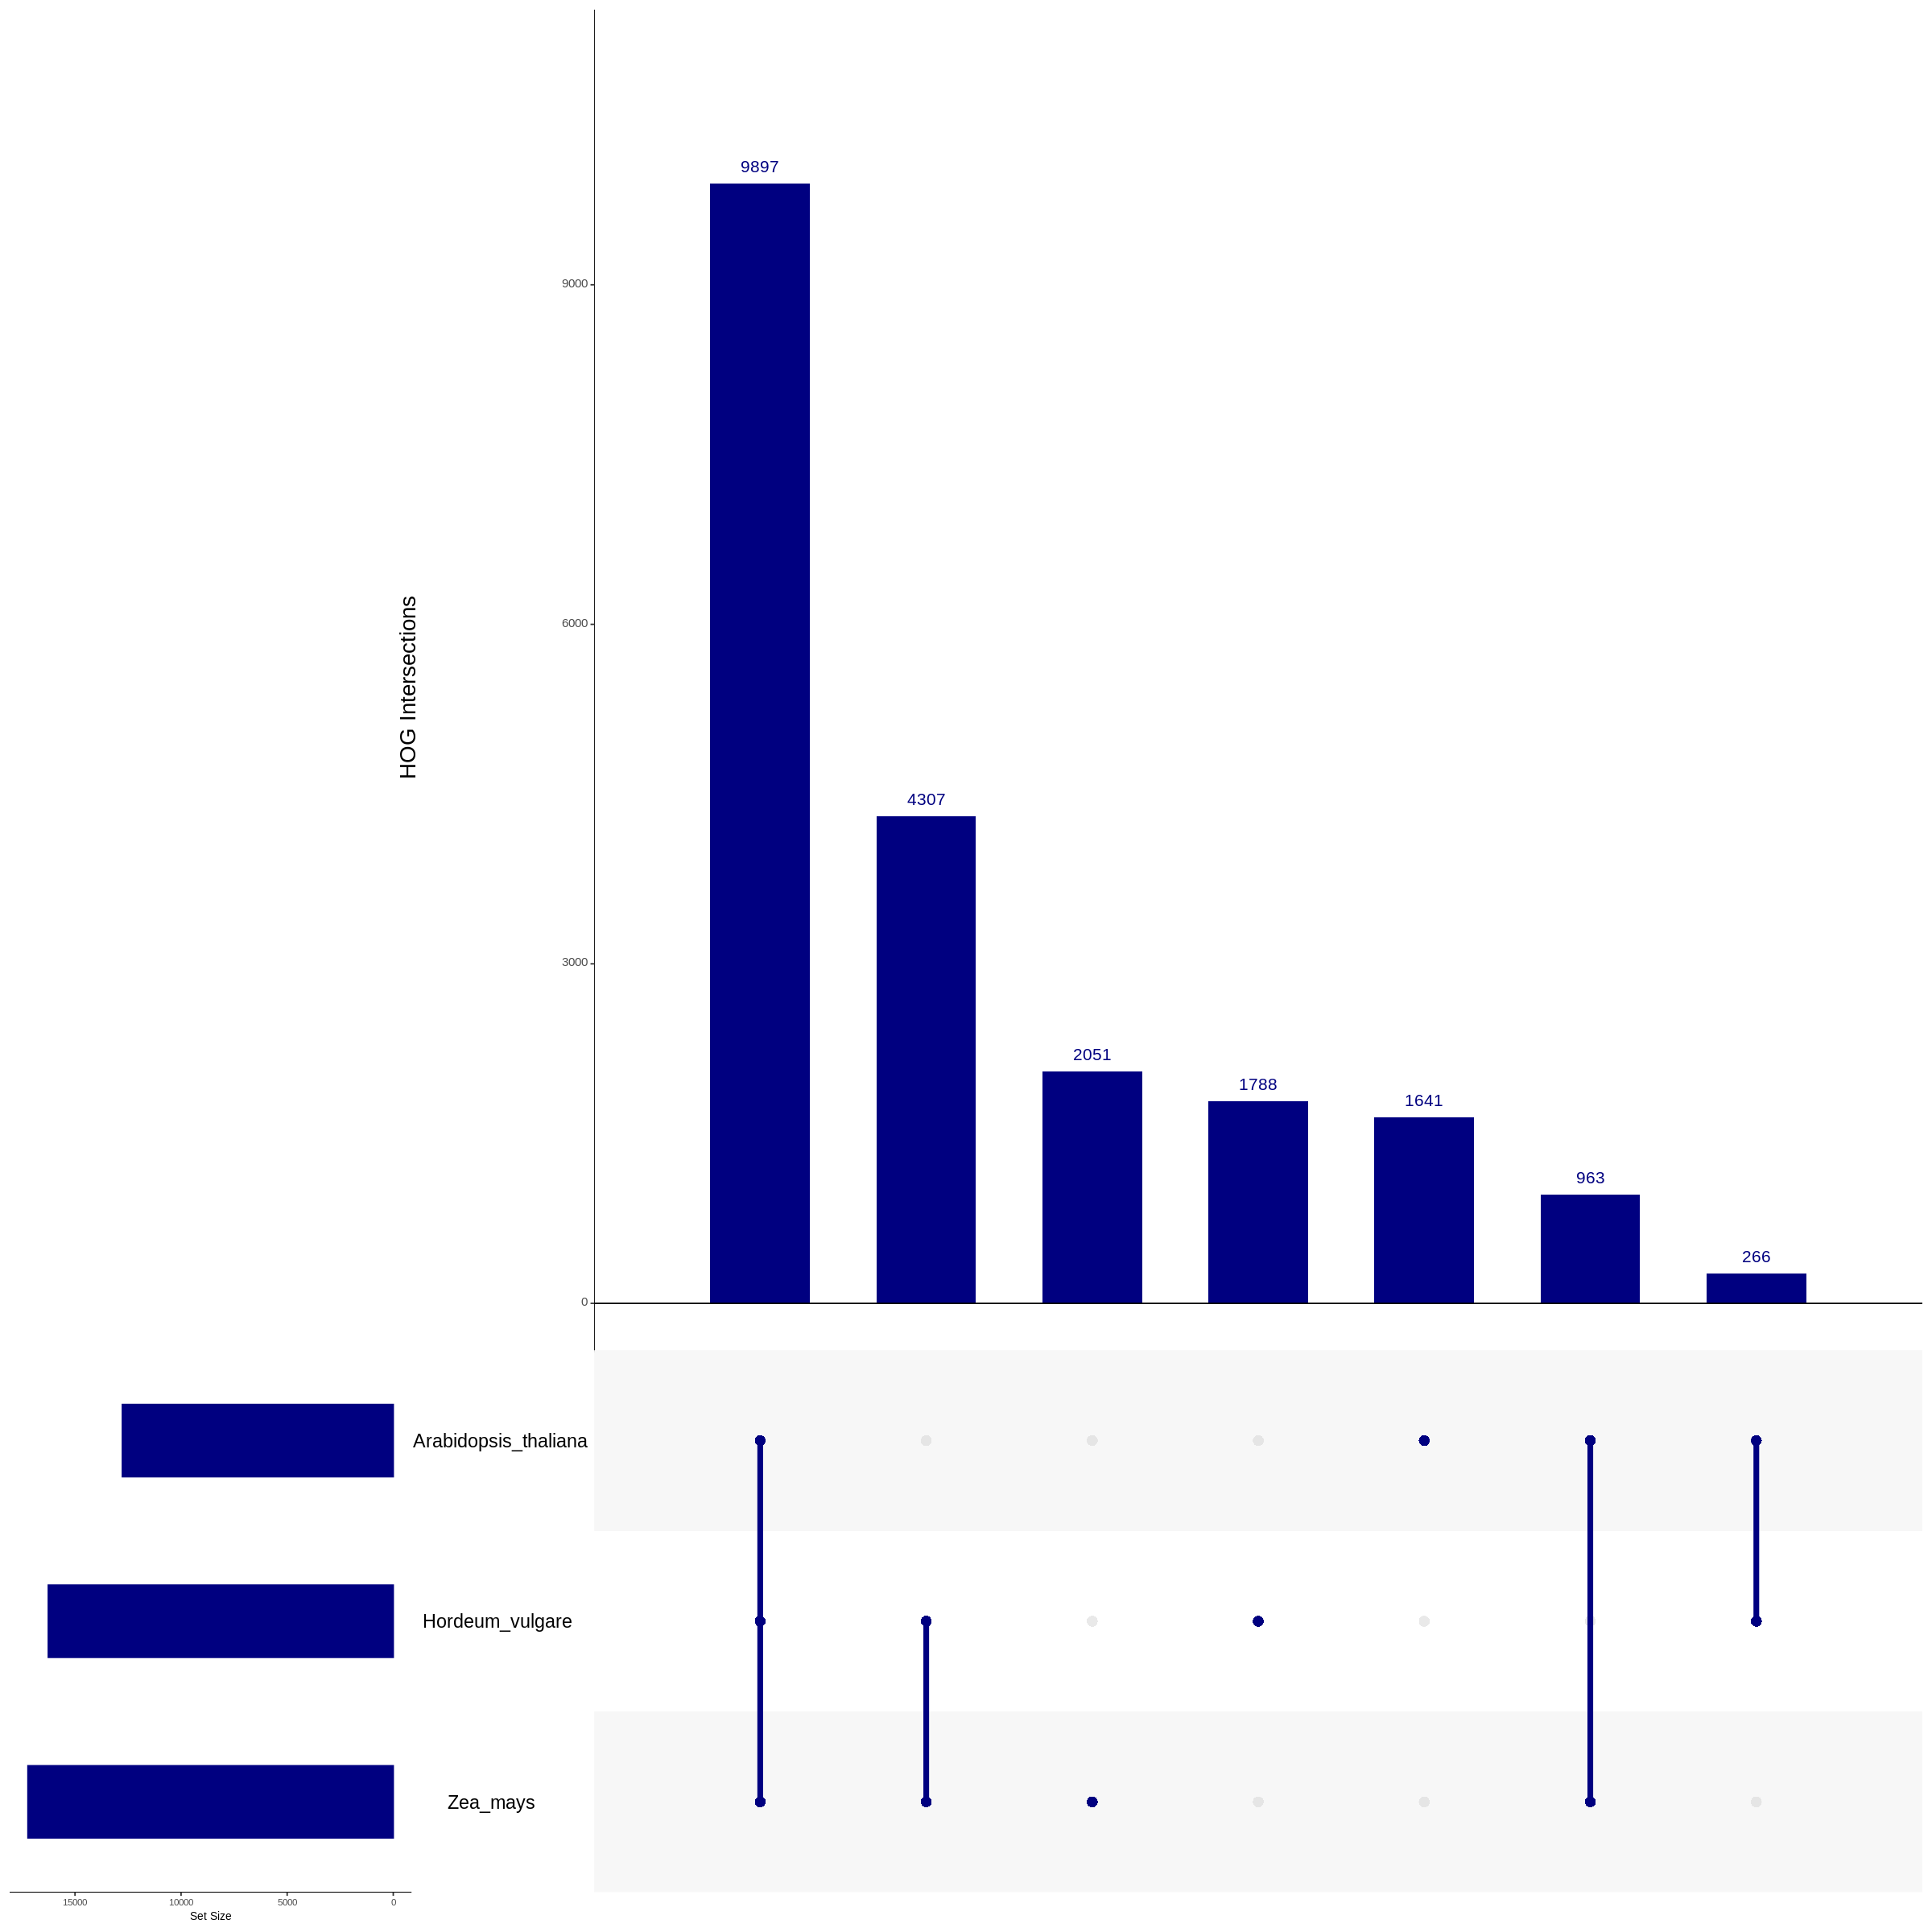

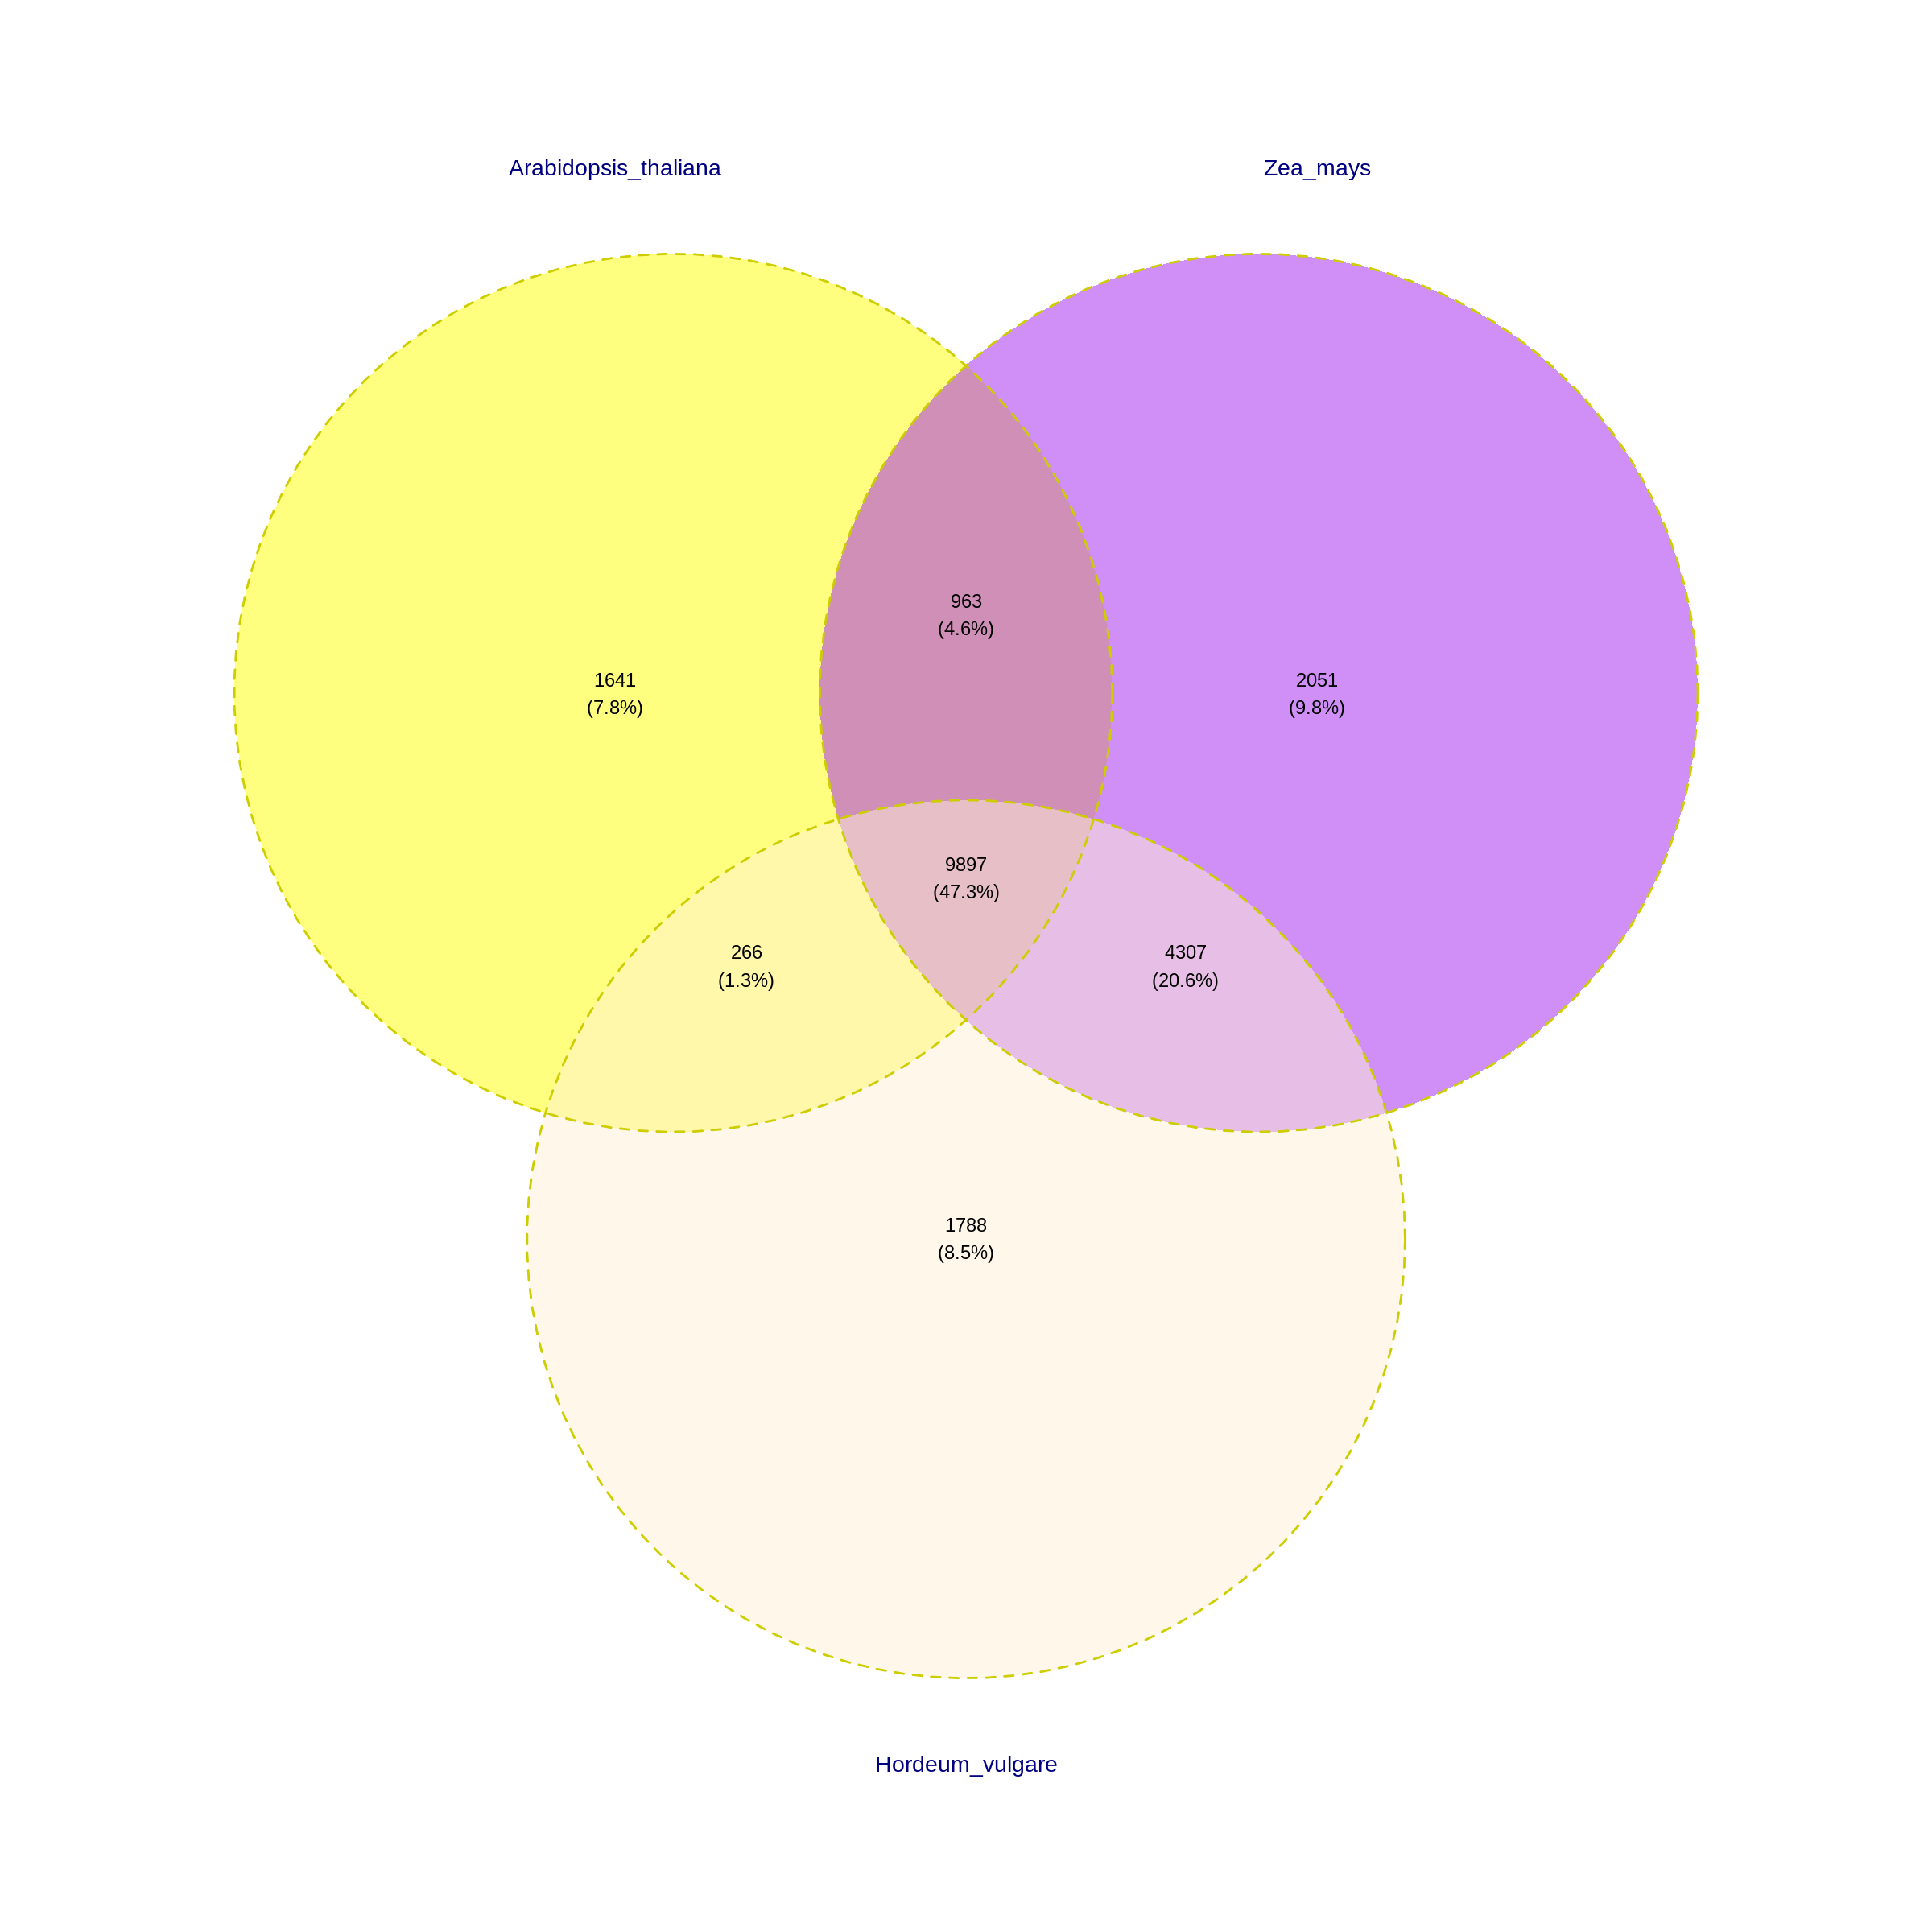

In [31]:
# creating upsetR Plot
head(HOG_level_list[[1]])

workset <-  HOG_level_list[[1]]
# drop columns that are unnecessary
workset <- workset %>% select(HOG, ends_with("_total")) 
# add this point we can easily compute the number of species/ecotypes etc. 
# #species = (columns of current workset - 1) 
species_num <- ncol(workset) - 1
# change 0 to NAs since we can more easily filter on that
is.na(workset) <- workset==0
# remove '_total' from column names
#str_remove(colnames(workset), "_total")
workset <- workset %>% setNames(names(workset) %>% stringr::str_replace("_total",""))

head(workset)

genotypeList <- list()
for (j in 1:species_num) {
    assign(paste0("Genotype", j), as.vector(simplify_all(workset[!is.na(workset[j+1]),"HOG"])[[1]]))
    subList <- list(get(paste0("Genotype", j)))
    names(subList) <- colnames(workset)[j+1]
    genotypeList <- c(genotypeList, subList)
}

#head(genotypeList)

#using UpSetR
upsetOrtho <- upset(fromList(genotypeList), 
                    order.by = "freq",
                    empty.intersections = "on",
                    point.size = 3.5, 
                    line.size = 2, 
                    mainbar.y.label = "HOG Intersections", 
                    text.scale = c(2, 1.3, 1, 1, 2, 2),
                    main.bar.color = "navy",
                    matrix.color = "navy",
                    sets.bar.color = "navy"
                   )

upsetOrtho

ggvenn(genotypeList, stroke_linetype = 2, text_size = 5, set_name_color = "navy",
       stroke_color = "yellow3",
       stroke_size = 0.8, 
       set_name_size = 6, 
       show_percentage = TRUE, 
       fill_color = c("yellow", "purple", "papayawhip", "red4")
      )